# Small Business Loans - BA 305 Team 5

# Imports

In [ ]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina' # Make visualizations look good

import pydotplus
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz, plot_tree
from IPython.display import Image
from six import StringIO

import seaborn as sns
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from tqdm import tqdm

from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import *

import warnings
warnings.filterwarnings('ignore')

# Data Cleaning

## Loading the Dataset

In [ ]:
# upload SBAnational.csv to MyDrive before running this
from google.colab import drive
drive.mount('/content/drive/')
df = pd.read_csv('/content/drive/MyDrive/SBAnational.csv')
df.head()

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


LoanNr_ChkDgt                           Name          City State    Zip  \
0     1000014003                 ABC HOBBYCRAFT    EVANSVILLE    IN  47711   
1     1000024006    LANDMARK BAR & GRILLE (THE)     NEW PARIS    IN  46526   
2     1000034009          WHITLOCK DDS, TODD M.   BLOOMINGTON    IN  47401   
3     1000044001  BIG BUCKS PAWN & JEWELRY, LLC  BROKEN ARROW    OK  74012   
4     1000054004    ANASTASIA CONFECTIONS, INC.       ORLANDO    FL  32801   

                            Bank BankState   NAICS ApprovalDate ApprovalFY  \
0               FIFTH THIRD BANK        OH  451120    28-Feb-97       1997   
1                1ST SOURCE BANK        IN  722410    28-Feb-97       1997   
2        GRANT COUNTY STATE BANK        IN  621210    28-Feb-97       1997   
3  1ST NATL BK & TR CO OF BROKEN        OK       0    28-Feb-97       1997   
4        FLORIDA BUS. DEVEL CORP        FL       0    28-Feb-97       1997   

   Term  NoEmp  NewExist  CreateJob  RetainedJob  FranchiseCode  UrbanRural  \
0    84      4       2.0          0            0              1           0   
1    60      2       2.0          0            0              1           0   
2   180      7       1.0          0            0              1           0   
3    60      2       1.0          0            0              1           0   
4   240     14       1.0          7            7              1           0   

  RevLineCr LowDoc ChgOffDate DisbursementDate DisbursementGross BalanceGross  \
0         N      Y        NaN        28-Feb-99       $60,000.00        $0.00    
1         N      Y        NaN        31-May-97       $40,000.00        $0.00    
2         N      N        NaN        31-Dec-97      $287,000.00        $0.00    
3         N      Y        NaN        30-Jun-97       $35,000.00        $0.00    
4         N      N        NaN        14-May-97      $229,000.00        $0.00    

  MIS_Status ChgOffPrinGr        GrAppv      SBA_Appv  
0      P I F       $0.00    $60,000.00    $48,000.00   
1      P I F       $0.00    $40,000.00    $32,000.00   
2      P I F       $0.00   $287,000.00   $215,250.00   
3      P I F       $0.00    $35,000.00    $28,000.00   
4      P I F       $0.00   $229,000.00   $229,000.00

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899164 entries, 0 to 899163
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   LoanNr_ChkDgt      899164 non-null  int64  
 1   Name               899150 non-null  object 
 2   City               899134 non-null  object 
 3   State              899150 non-null  object 
 4   Zip                899164 non-null  int64  
 5   Bank               897605 non-null  object 
 6   BankState          897598 non-null  object 
 7   NAICS              899164 non-null  int64  
 8   ApprovalDate       899164 non-null  object 
 9   ApprovalFY         899164 non-null  object 
 10  Term               899164 non-null  int64  
 11  NoEmp              899164 non-null  int64  
 12  NewExist           899028 non-null  float64
 13  CreateJob          899164 non-null  int64  
 14  RetainedJob        899164 non-null  int64  
 15  FranchiseCode      899164 non-null  int64  
 16  Ur

## Dropping columns and missing values

In [ ]:
df = df.drop(columns=['LoanNr_ChkDgt', 'Name', 'City', 'State', \
                                'Zip', 'Bank', 'BankState', 'ChgOffPrinGr', \
                                'ApprovalFY', 'ChgOffDate', 'DisbursementDate'])
df.info()

# Categorical variables: NAICS, NewExist, Franchise, UrbanRural, RevLineCr, LowDoc, MIS_Status

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899164 entries, 0 to 899163
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   NAICS              899164 non-null  int64  
 1   ApprovalDate       899164 non-null  object 
 2   Term               899164 non-null  int64  
 3   NoEmp              899164 non-null  int64  
 4   NewExist           899028 non-null  float64
 5   CreateJob          899164 non-null  int64  
 6   RetainedJob        899164 non-null  int64  
 7   FranchiseCode      899164 non-null  int64  
 8   UrbanRural         899164 non-null  int64  
 9   RevLineCr          894636 non-null  object 
 10  LowDoc             896582 non-null  object 
 11  DisbursementGross  899164 non-null  object 
 12  BalanceGross       899164 non-null  object 
 13  MIS_Status         897167 non-null  object 
 14  GrAppv             899164 non-null  object 
 15  SBA_Appv           899164 non-null  object 
dtypes:

In [ ]:
# DROP rows with missing values in the remaining columns
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889938 entries, 0 to 899163
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   NAICS              889938 non-null  int64  
 1   ApprovalDate       889938 non-null  object 
 2   Term               889938 non-null  int64  
 3   NoEmp              889938 non-null  int64  
 4   NewExist           889938 non-null  float64
 5   CreateJob          889938 non-null  int64  
 6   RetainedJob        889938 non-null  int64  
 7   FranchiseCode      889938 non-null  int64  
 8   UrbanRural         889938 non-null  int64  
 9   RevLineCr          889938 non-null  object 
 10  LowDoc             889938 non-null  object 
 11  DisbursementGross  889938 non-null  object 
 12  BalanceGross       889938 non-null  object 
 13  MIS_Status         889938 non-null  object 
 14  GrAppv             889938 non-null  object 
 15  SBA_Appv           889938 non-null  object 
dtypes: floa

In [ ]:
def enumerate_dollar_figures(df, dollar_columns):
    df_copy = df.copy()
    for column in dollar_columns:
        df_copy[column] = df_copy[column].replace('[\$,]', '', regex=True).astype(float)
        df_copy[column] = df_copy[column].astype(int)
    return df_copy

df = enumerate_dollar_figures(df, ['DisbursementGross', 'BalanceGross', 'GrAppv', 'SBA_Appv'])

In [ ]:
df.head()

NAICS ApprovalDate  Term  NoEmp  NewExist  CreateJob  RetainedJob  \
0  451120    28-Feb-97    84      4       2.0          0            0   
1  722410    28-Feb-97    60      2       2.0          0            0   
2  621210    28-Feb-97   180      7       1.0          0            0   
3       0    28-Feb-97    60      2       1.0          0            0   
4       0    28-Feb-97   240     14       1.0          7            7   

   FranchiseCode  UrbanRural RevLineCr LowDoc  DisbursementGross  \
0              1           0         N      Y              60000   
1              1           0         N      Y              40000   
2              1           0         N      N             287000   
3              1           0         N      Y              35000   
4              1           0         N      N             229000   

   BalanceGross MIS_Status  GrAppv  SBA_Appv  
0             0      P I F   60000     48000  
1             0      P I F   40000     32000  
2             0      P I F  287000    215250  
3             0      P I F   35000     28000  
4             0      P I F  229000    229000

## Encoding Categorical Variables

In [ ]:
# Encoding dummy variables
df['RevLineCr'] = np.where(df['RevLineCr']=='Y', 1, 0)
df['LowDoc'] = np.where(df['LowDoc']=='Y', 1, 0)
df['MIS_Status'] = np.where(df['MIS_Status']=='CHGOFF', 1, 0)

In [ ]:
# Categorizing if it's a franchise or not

print(df['FranchiseCode'].value_counts(), '\n')

# 0s and 1s are not a franchise --> 0
# everything else is a franchise --> 1
df['FranchiseCode'] = np.where(np.logical_or(df['FranchiseCode']==0,df['FranchiseCode']==1),0, 1)

df = df.rename(columns={'FranchiseCode': 'Franchise'})
df['Franchise'].value_counts()

FranchiseCode
1        633563
0        205030
78760      3350
68020      1917
50564      1026
          ...  
84523         1
68985         1
80980         1
22679         1
15930         1
Name: count, Length: 2757, dtype: int64 



Franchise
0    838593
1     51345
Name: count, dtype: int64

In [ ]:
# Fixing NewExist

print(df['NewExist'].value_counts(), '\n')
df['NewExist'] = df['NewExist'].astype(int)

# DROP rows with undefined new exist
df = df[df['NewExist'] != 0]

# change from 1 and 2 --> 0 and 1
# 0 is existing, 1 is new
df['NewExist'] = df['NewExist']-1

print(df['NewExist'].value_counts(), '\n')
#df.info()

NewExist
1.0    638875
2.0    250038
0.0      1025
Name: count, dtype: int64 

NewExist
0    638875
1    250038
Name: count, dtype: int64 



In [ ]:
# Fixing UrbanRural

print(df['UrbanRural'].value_counts(), '\n')

# DROP rows with undefined urban rural
df = df[df['UrbanRural'] != 0]

# change 1 and 2 --> 0 and 1
# 0 is urban, 1 is rural
df['UrbanRural'] = df['UrbanRural']-1

print(df['UrbanRural'].value_counts(), '\n')
#df.info()

UrbanRural
1    466403
0    318367
2    104143
Name: count, dtype: int64 

UrbanRural
0    466403
1    104143
Name: count, dtype: int64 



In [ ]:
# Creating Recession Column (Dec 2007 - June 2009)

# Make a new column that one-hot codes it 0 not recession and 1 for recession. Recession date is suppose to be between Dec 2007 and June 2009  . 2007-12-01 to 2009-06-01
df['ApprovalDate'] = pd.to_datetime(df['ApprovalDate'])
df['Recession'] = np.where(np.logical_and(df['ApprovalDate'] >= '2007-12-01', df['ApprovalDate'] <= '2009-07-01'), 1, 0)
df['Recession'].value_counts()

df

NAICS ApprovalDate  Term  NoEmp  NewExist  CreateJob  RetainedJob  \
12      445299   2006-02-07   162      2         1          0            0   
24      722211   2006-02-07   126      7         0          0            0   
28      611110   2006-02-07    83     18         1          5           23   
30      238140   2006-02-07    84      4         0          0            4   
32      532490   2006-02-07    60      3         0          0            0   
...        ...          ...   ...    ...       ...        ...          ...   
896389       0   1997-01-30    60      2         1          0            0   
898240       0   1997-02-20    19      6         0          0            0   
898660  451211   1997-02-24    84      2         0          0            0   
898731       0   1997-02-25   155      2         1          0            0   
898998       0   1997-02-27   120      3         0          0            0   

        Franchise  UrbanRural  RevLineCr  LowDoc  DisbursementGross  \
12              1           0          0       0             253400   
24              0           0          0       0             137300   
28              0           0          1       0             438541   
30              0           0          1       0              51440   
32              0           0          0       0              50000   
...           ...         ...        ...     ...                ...   
896389          0           0          0       0              12218   
898240          0           0          0       0             100000   
898660          0           0          0       0              57000   
898731          0           0          0       0              45000   
898998          0           0          0       0              86000   

        BalanceGross  MIS_Status  GrAppv  SBA_Appv  Recession  
12                 0           0  253400    190050          0  
24                 0           0  137300    116705          0  
28                 0           0  100000     50000          0  
30                 0           0   35000     17500          0  
32                 0           0   50000     42500          0  
...              ...         ...     ...       ...        ...  
896389             0           0   20000     16000          0  
898240             0           1  100000     80000          0  
898660             0           0   57000     45600          0  
898731             0           0   45000     36000          0  
898998             0           0   86000     68800          0  

[570546 rows x 17 columns]

In [ ]:
# Drop ApprovalDate
df = df.drop(columns=['ApprovalDate'])

## Categorizing NAICS Codes

In [ ]:
categories = []
for i in df['NAICS']:
  if str(i).startswith('11', 0, 2):
    categories.append('Agriculture, forestry, fishing, and hunting')
  elif str(i).startswith('21', 0, 2):
    categories.append('Mining, quarrying, and oil and gas extraction')
  elif str(i).startswith('22', 0, 2):
    categories.append('Utilities')
  elif str(i).startswith('23', 0, 2):
    categories.append('Construction')
  elif str(i).startswith('31', 0, 2) or str(i).startswith('32', 0, 2) or str(i).startswith('33', 0, 2):
    categories.append('Manufacturing')
  elif str(i).startswith('42', 0, 2):
    categories.append('Wholesale trade')
  elif str(i).startswith('44', 0, 2) or str(i).startswith('45', 0, 2):
    categories.append('Retail trade')
  elif str(i).startswith('48', 0, 2) or str(i).startswith('49', 0, 2):
    categories.append('Transportation and warehousing')
  elif str(i).startswith('51', 0, 2):
    categories.append('Information')
  elif str(i).startswith('52', 0, 2):
    categories.append('Finance and insurance')
  elif str(i).startswith('53', 0, 2):
    categories.append('Real estate and rental and leasing')
  elif str(i).startswith('54', 0, 2):
    categories.append('Professional, scientific, and technical services')
  elif str(i).startswith('55', 0, 2):
    categories.append('Management of companies and enterprises')
  elif str(i).startswith('56', 0, 2):
    categories.append('Administrative and support and waste management and remediation services')
  elif str(i).startswith('61', 0, 2):
    categories.append('Educational services')
  elif str(i).startswith('62', 0, 2):
    categories.append('Health care and social assistance')
  elif str(i).startswith('71', 0, 2):
    categories.append('Arts, entertainment, and recreation')
  elif str(i).startswith('72', 0, 2):
    categories.append('Accommodation and food services')
  elif str(i).startswith('92', 0, 2):
    categories.append('Public administration')
  elif str(i).startswith('81', 0, 2):
    categories.append('Other services')
  else:
    categories.append('Missing Values')

In [ ]:
# Adding NAICS Categories column
df['NAICS_Categories'] = categories

# DROP rows with missing NAICS category
df = df[df['NAICS_Categories'] != 'Missing Values']

print(df['NAICS_Categories'].value_counts(), '\n')

NAICS_Categories
Retail trade                                                                97315
Accommodation and food services                                             62812
Professional, scientific, and technical services                            54759
Other services                                                              53900
Construction                                                                52520
Manufacturing                                                               49003
Health care and social assistance                                           39049
Wholesale trade                                                             35082
Administrative and support and waste management and remediation services    28834
Transportation and warehousing                                              20634
Real estate and rental and leasing                                          11773
Arts, entertainment, and recreation                                         11120

In [ ]:
# Encode Categories
one_hot = pd.get_dummies(df['NAICS_Categories'])
# Join the encoded columns to df
df = df.join(one_hot)
# Drop original columns
df = df.drop(columns=['NAICS', 'NAICS_Categories'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 547698 entries, 12 to 898660
Data columns (total 35 columns):
 #   Column                                                                    Non-Null Count   Dtype
---  ------                                                                    --------------   -----
 0   Term                                                                      547698 non-null  int64
 1   NoEmp                                                                     547698 non-null  int64
 2   NewExist                                                                  547698 non-null  int64
 3   CreateJob                                                                 547698 non-null  int64
 4   RetainedJob                                                               547698 non-null  int64
 5   Franchise                                                                 547698 non-null  int64
 6   UrbanRural                                                              

In [ ]:
pd.set_option('display.max_columns', None)
df = df.reset_index(drop=True)
df.head()

Term  NoEmp  NewExist  CreateJob  RetainedJob  Franchise  UrbanRural  \
0   162      2         1          0            0          1           0   
1   126      7         0          0            0          0           0   
2    83     18         1          5           23          0           0   
3    84      4         0          0            4          0           0   
4    60      3         0          0            0          0           0   

   RevLineCr  LowDoc  DisbursementGross  BalanceGross  MIS_Status  GrAppv  \
0          0       0             253400             0           0  253400   
1          0       0             137300             0           0  137300   
2          1       0             438541             0           0  100000   
3          1       0              51440             0           0   35000   
4          0       0              50000             0           0   50000   

   SBA_Appv  Recession  Accommodation and food services  \
0    190050          0                            False   
1    116705          0                             True   
2     50000          0                            False   
3     17500          0                            False   
4     42500          0                            False   

   Administrative and support and waste management and remediation services  \
0                                              False                          
1                                              False                          
2                                              False                          
3                                              False                          
4                                              False                          

   Agriculture, forestry, fishing, and hunting  \
0                                        False   
1                                        False   
2                                        False   
3                                        False   
4                                        False   

   Arts, entertainment, and recreation  Construction  Educational services  \
0                                False         False                 False   
1                                False         False                 False   
2                                False         False                  True   
3                                False          True                 False   
4                                False         False                 False   

   Finance and insurance  Health care and social assistance  Information  \
0                  False                              False        False   
1                  False                              False        False   
2                  False                              False        False   
3                  False                              False        False   
4                  False                              False        False   

   Management of companies and enterprises  Manufacturing  \
0                                    False          False   
1                                    False          False   
2                                    False          False   
3                                    False          False   
4                                    False          False   

   Mining, quarrying, and oil and gas extraction  Other services  \
0                                          False           False   
1                                          False           False   
2                                          False           False   
3                                          False           False   
4                                          False           False   

   Professional, scientific, and technical services  Public administration  \
0                                             False                  False   
1                                             False                  False   
2                     

In [ ]:
# Remaining distribution of categorical variables

print(df['UrbanRural'].value_counts(), '\n')
print(df['NewExist'].value_counts(), '\n')
print(df['Franchise'].value_counts(), '\n')
print(df['RevLineCr'].value_counts(), '\n')
print(df['LowDoc'].value_counts(), '\n')
print(df['MIS_Status'].value_counts())

UrbanRural
0    447205
1    100493
Name: count, dtype: int64 

NewExist
0    392785
1    154913
Name: count, dtype: int64 

Franchise
0    518142
1     29556
Name: count, dtype: int64 

RevLineCr
0    358340
1    189358
Name: count, dtype: int64 

LowDoc
0    510400
1     37298
Name: count, dtype: int64 

MIS_Status
0    416894
1    130804
Name: count, dtype: int64


## Reordering columns - numeric first then categorical

In [ ]:
df = df.iloc[:,[0,1,3,4,9,10,12,13,14,2,5,6,7,8,11,15,16,17,18,19,20,21,22, 23,24,25,26,27,28,29,30,31,32,33,34]]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547698 entries, 0 to 547697
Data columns (total 35 columns):
 #   Column                                                                    Non-Null Count   Dtype
---  ------                                                                    --------------   -----
 0   Term                                                                      547698 non-null  int64
 1   NoEmp                                                                     547698 non-null  int64
 2   CreateJob                                                                 547698 non-null  int64
 3   RetainedJob                                                               547698 non-null  int64
 4   DisbursementGross                                                         547698 non-null  int64
 5   BalanceGross                                                              547698 non-null  int64
 6   GrAppv                                                              

In [ ]:
df.head()

Term  NoEmp  CreateJob  RetainedJob  DisbursementGross  BalanceGross  \
0   162      2          0            0             253400             0   
1   126      7          0            0             137300             0   
2    83     18          5           23             438541             0   
3    84      4          0            4              51440             0   
4    60      3          0            0              50000             0   

   GrAppv  SBA_Appv  Recession  NewExist  Franchise  UrbanRural  RevLineCr  \
0  253400    190050          0         1          1           0          0   
1  137300    116705          0         0          0           0          0   
2  100000     50000          0         1          0           0          1   
3   35000     17500          0         0          0           0          1   
4   50000     42500          0         0          0           0          0   

   LowDoc  MIS_Status  Accommodation and food services  \
0       0           0                            False   
1       0           0                             True   
2       0           0                            False   
3       0           0                            False   
4       0           0                            False   

   Administrative and support and waste management and remediation services  \
0                                              False                          
1                                              False                          
2                                              False                          
3                                              False                          
4                                              False                          

   Agriculture, forestry, fishing, and hunting  \
0                                        False   
1                                        False   
2                                        False   
3                                        False   
4                                        False   

   Arts, entertainment, and recreation  Construction  Educational services  \
0                                False         False                 False   
1                                False         False                 False   
2                                False         False                  True   
3                                False          True                 False   
4                                False         False                 False   

   Finance and insurance  Health care and social assistance  Information  \
0                  False                              False        False   
1                  False                              False        False   
2                  False                              False        False   
3                  False                              False        False   
4                  False                              False        False   

   Management of companies and enterprises  Manufacturing  \
0                                    False          False   
1                                    False          False   
2                                    False          False   
3                                    False          False   
4                                    False          False   

   Mining, quarrying, and oil and gas extraction  Other services  \
0                                          False           False   
1                                          False           False   
2                                          False           False   
3                                          False           False   
4                                          False           False   

   Professional, scientific, and technical services  Public administration  \
0                                             False                  False   
1                                             False                  False   
2                     

# PCA (don't run this, models work better without)

## Examining Correlations between Numerical Metric Variables

In [ ]:
nums = df.iloc[:, 0:8]
nums

Term  NoEmp  CreateJob  RetainedJob  DisbursementGross  BalanceGross  \
0        162      2          0            0             253400             0   
1        126      7          0            0             137300             0   
2         83     18          5           23             438541             0   
3         84      4          0            4              51440             0   
4         60      3          0            0              50000             0   
...      ...    ...        ...          ...                ...           ...   
547693   240     20         15            0             509000             0   
547694    84      3          0            3              15635             0   
547695   240     10          0            1            1038000             0   
547696   107      2          0            0             170000             0   
547697    84      2          0            0              57000             0   

         GrAppv  SBA_Appv  
0        253400    190050  
1        137300    116705  
2        100000     50000  
3         35000     17500  
4         50000     42500  
...         ...       ...  
547693   509000    509000  
547694    10000      5000  
547695  1038000   1038000  
547696   170000    127500  
547697    57000     45600  

[547698 rows x 8 columns]

In [ ]:
# correlation table for the quantitative variables
# the corr() method creates a new dataframe containing the correlation matrix
corr_mat = nums.corr()
corr_mat

Term     NoEmp  CreateJob  RetainedJob  \
Term               1.000000  0.052944   0.082778     0.028442   
NoEmp              0.052944  1.000000   0.087803     0.231922   
CreateJob          0.082778  0.087803   1.000000     0.110208   
RetainedJob        0.028442  0.231922   0.110208     1.000000   
DisbursementGross  0.501235  0.123945   0.122665     0.128510   
BalanceGross       0.003052 -0.000100  -0.000092    -0.000517   
GrAppv             0.546798  0.124226   0.126031     0.121168   
SBA_Appv           0.563989  0.124009   0.139683     0.109359   

                   DisbursementGross  BalanceGross    GrAppv  SBA_Appv  
Term                        0.501235      0.003052  0.546798  0.563989  
NoEmp                       0.123945     -0.000100  0.124226  0.124009  
CreateJob                   0.122665     -0.000092  0.126031  0.139683  
RetainedJob                 0.128510     -0.000517  0.121168  0.109359  
DisbursementGross           1.000000      0.006759  0.963756  0.937340  
BalanceGross                0.006759      1.000000  0.007052  0.006374  
GrAppv                      0.963756      0.007052  1.000000  0.980763  
SBA_Appv                    0.937340      0.006374  0.980763  1.000000

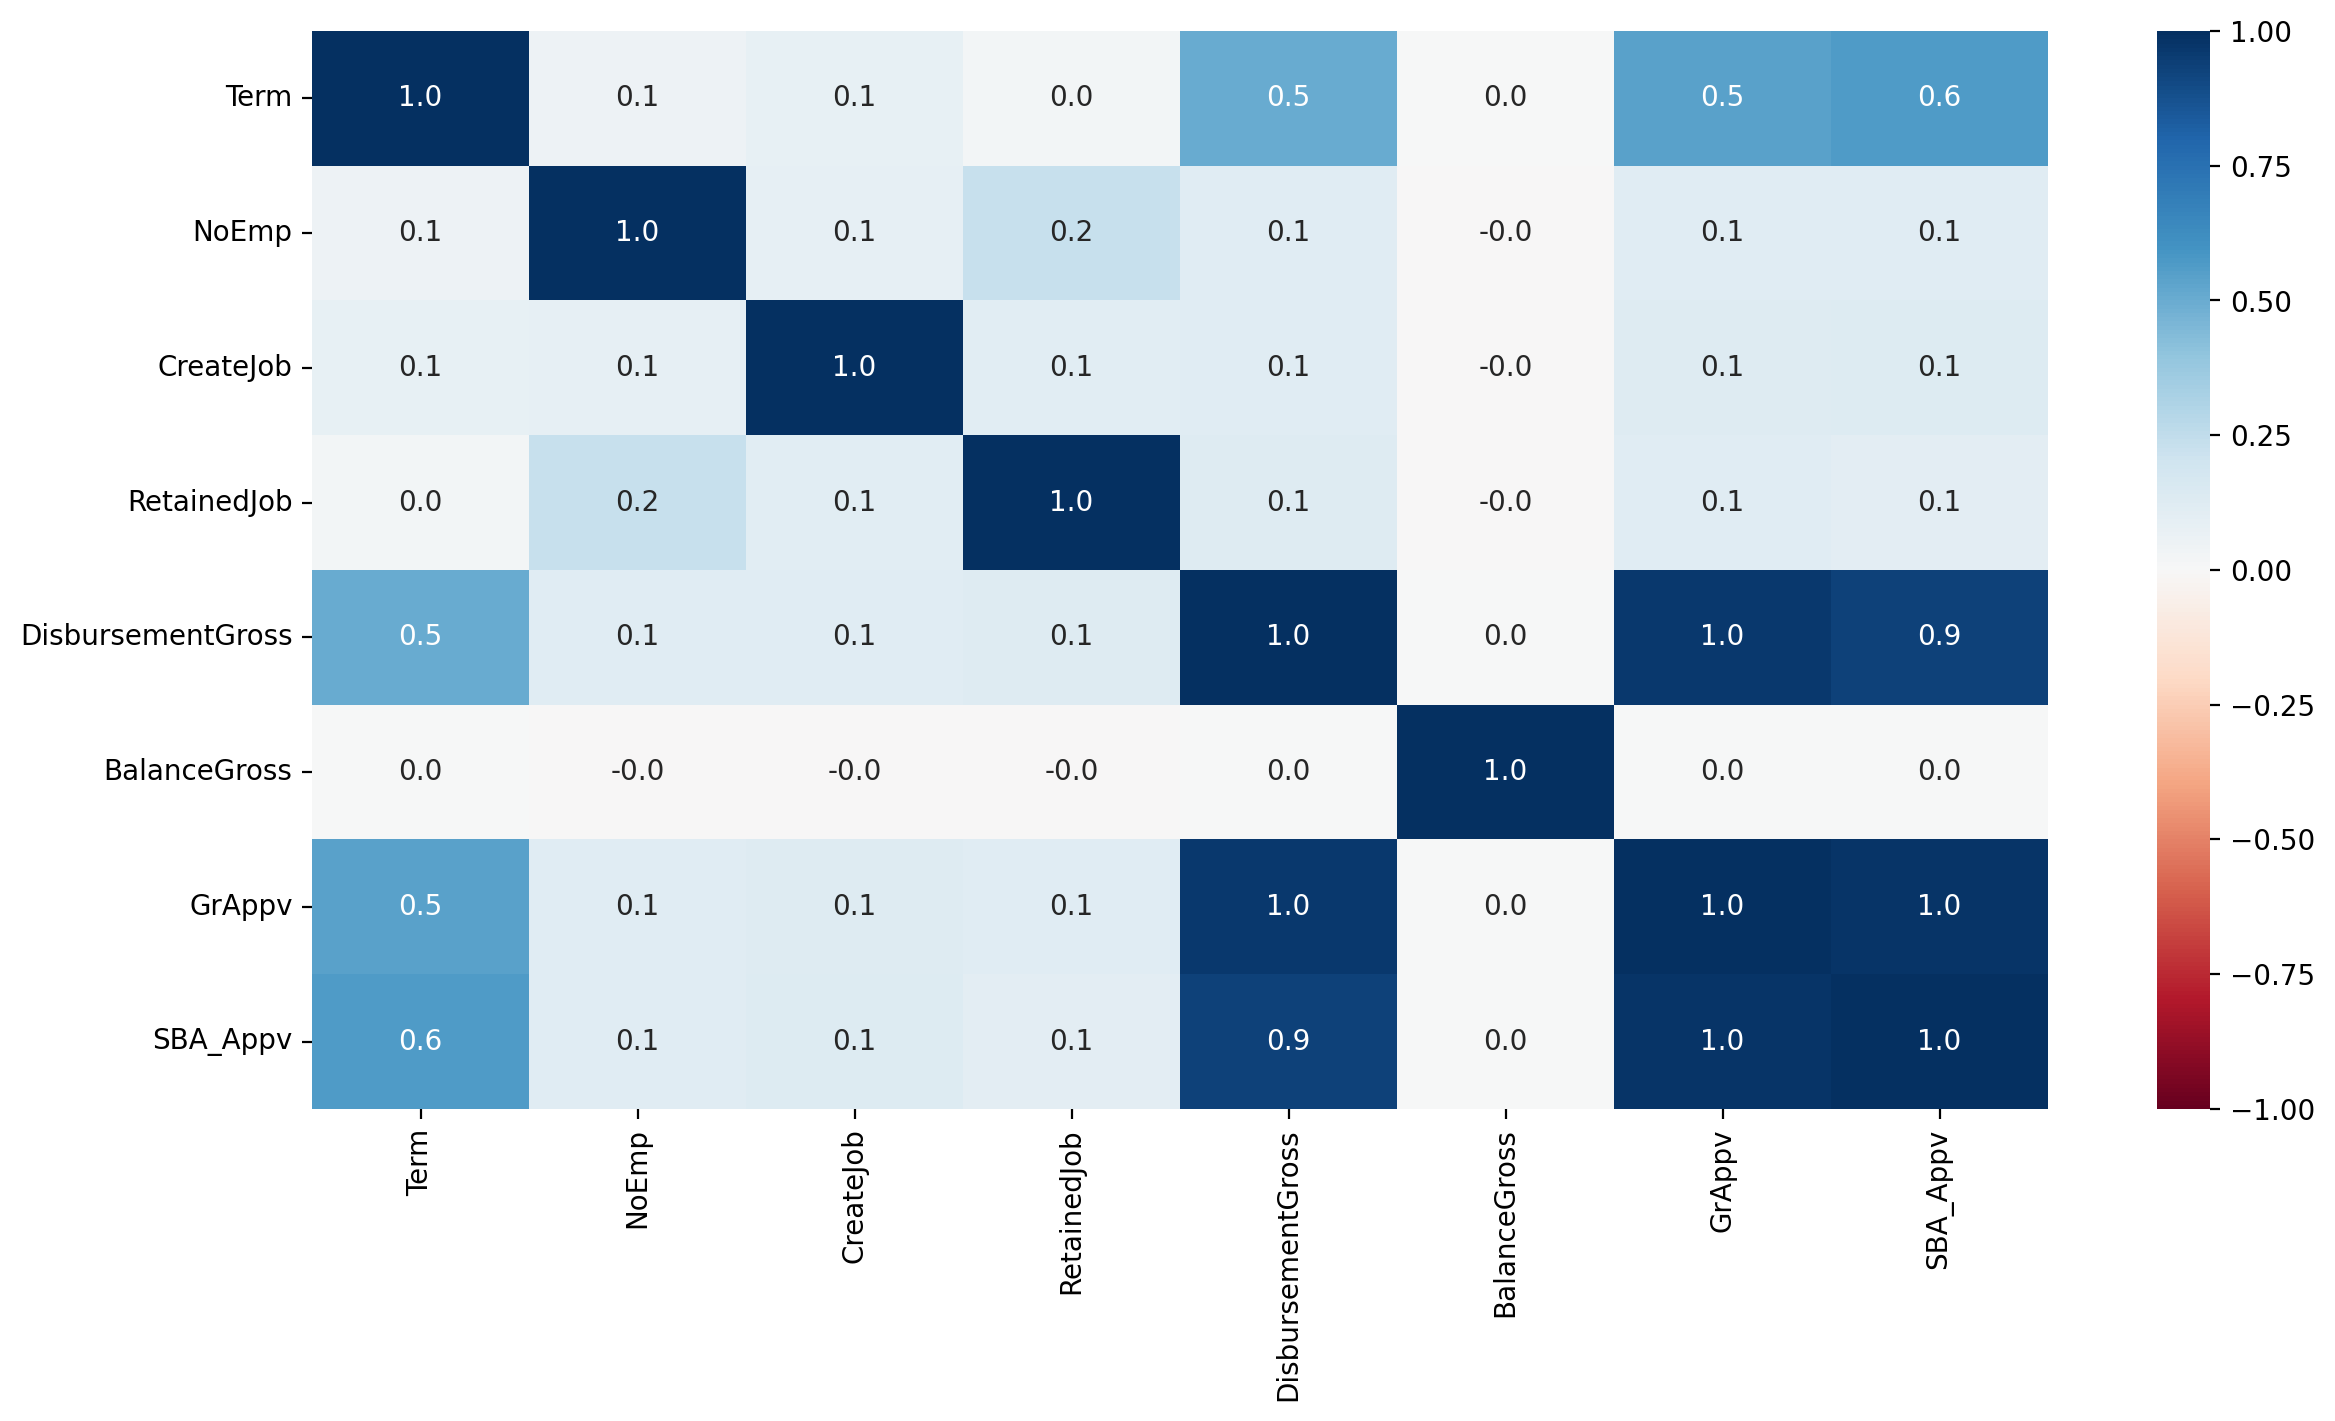

In [ ]:
# easier to interpret using a heatmap with colormap, from the seaborn package
# list of available color maps: https://matplotlib.org/stable/tutorials/colors/colormaps.html
plt.figure(figsize=(14,7))
sns.heatmap(corr_mat, annot=True, fmt=".1f",vmin=-1,vmax=1, cmap='RdBu');

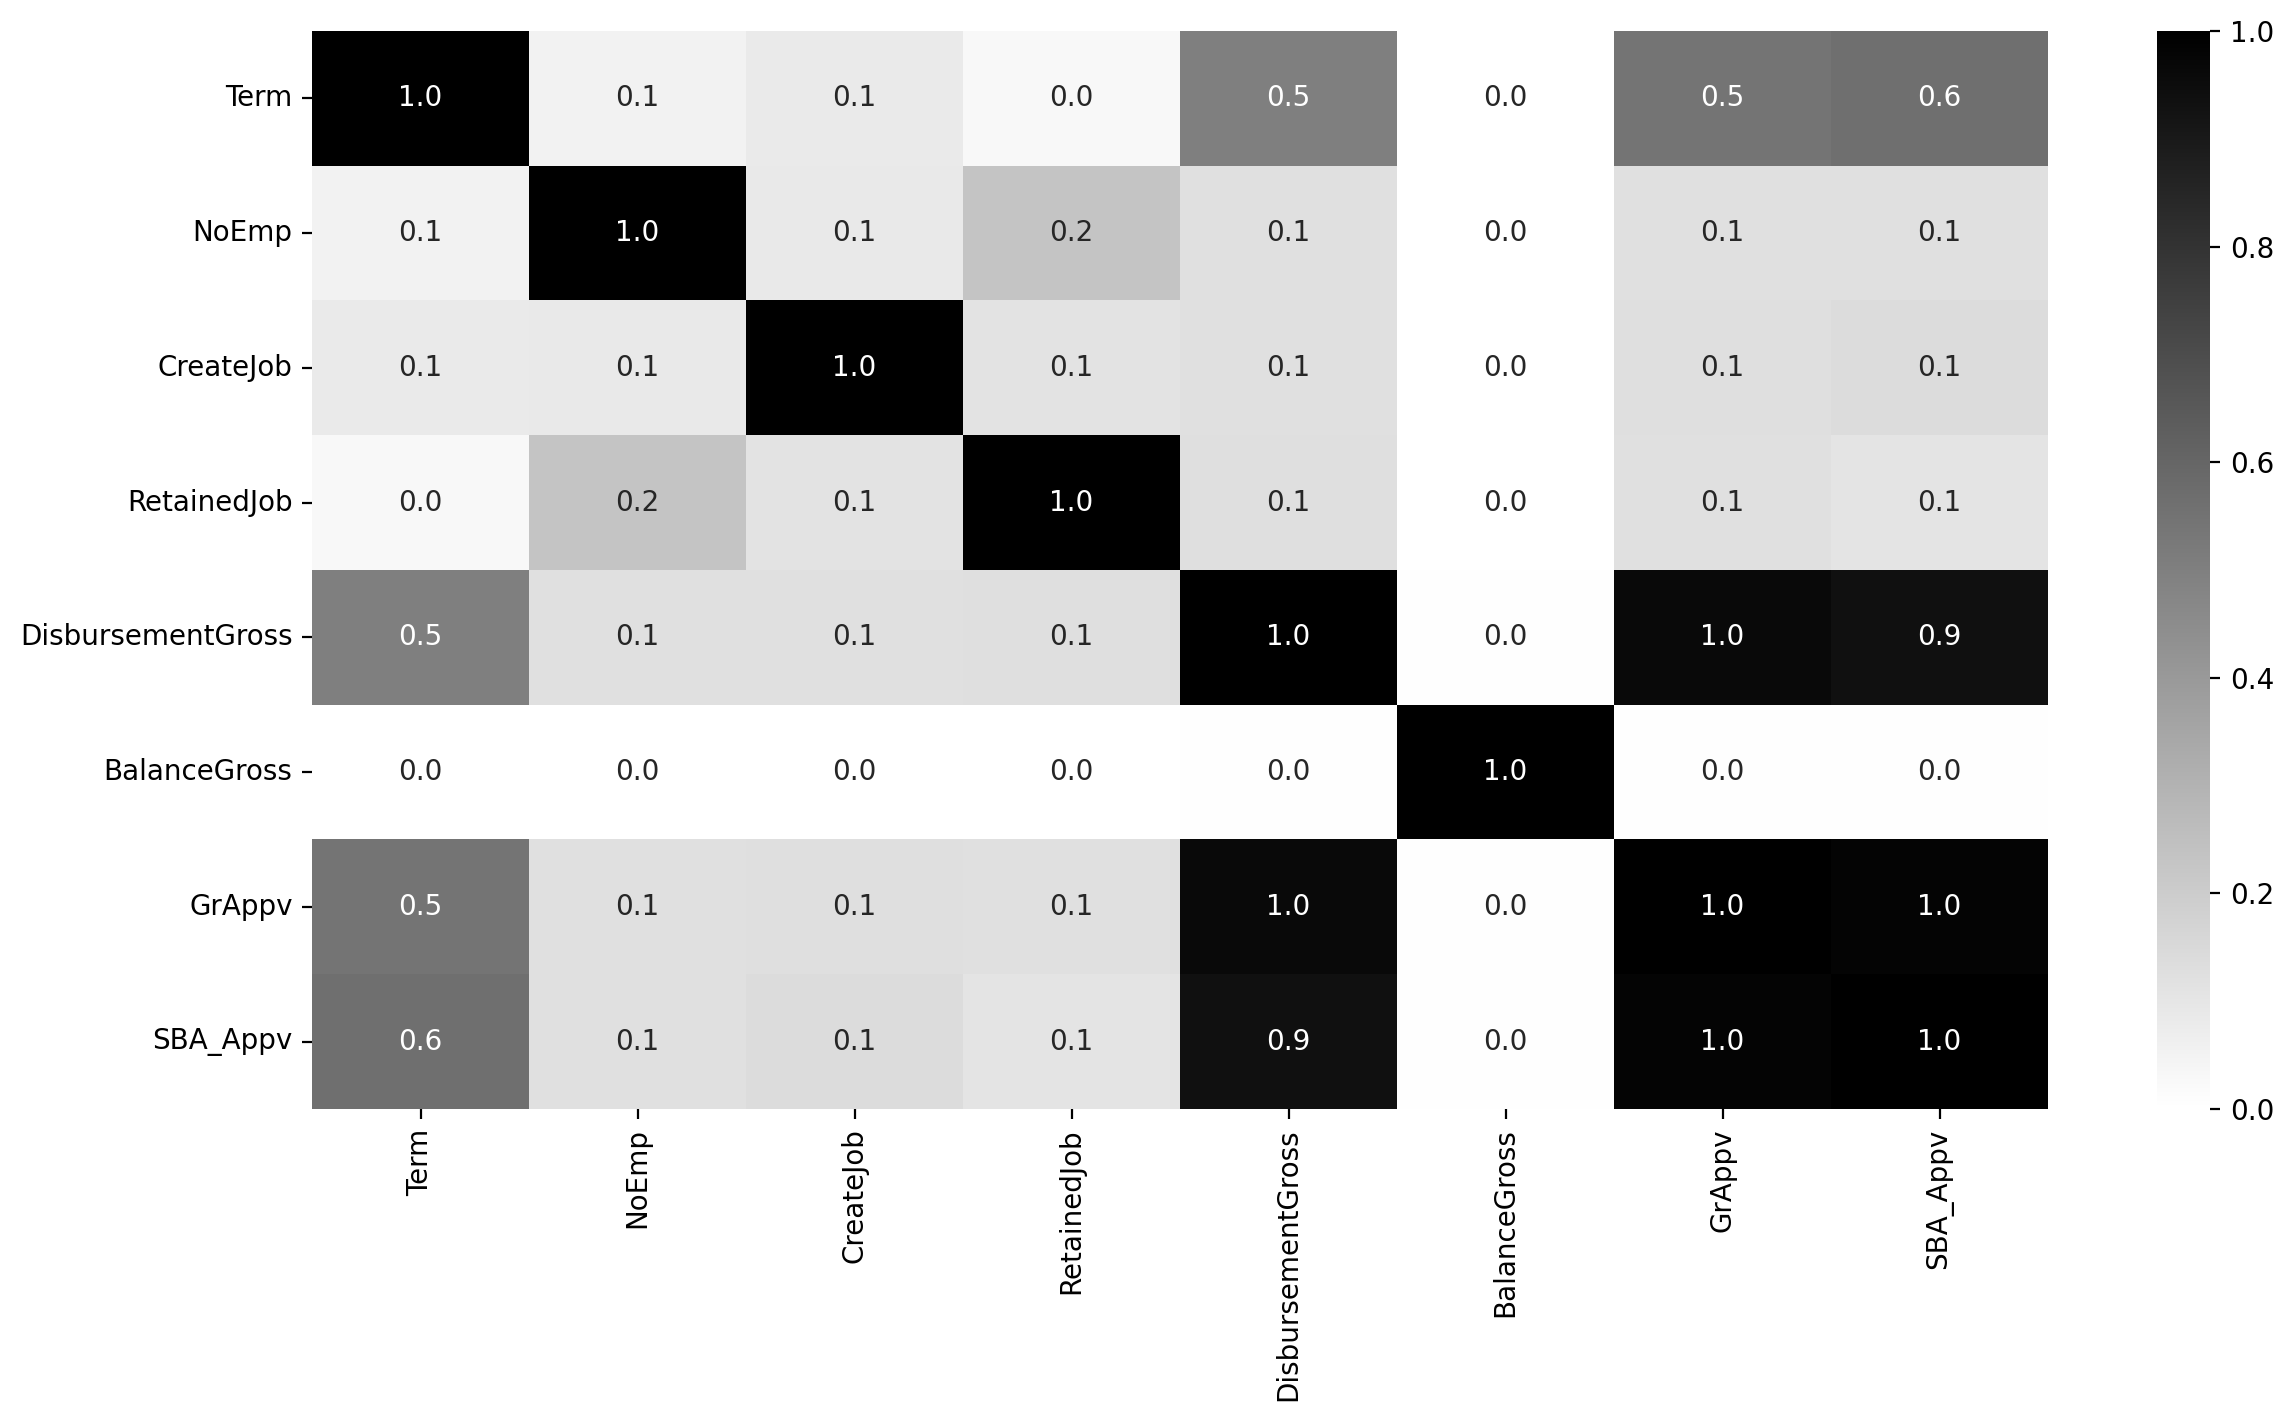

In [ ]:
# if we only care about the magnitude of corr but not the sign then better to use grayscale
plt.figure(figsize=(14,7))
sns.heatmap(np.absolute(corr_mat), annot=True, fmt=".1f", vmin=0, vmax=1, cmap="gray_r");

## Running PCA

In [ ]:
# Run PCA on unstandardized data
# PCA will create an object called a 'class', i.e., an instance
pcs = PCA()

# Then we use the "fit" function to run the PCA on a specific dataframe
# It will run the model in the background but won't show you anything...
pcs.fit(preprocessing.scale(nums))

PCA()

In [ ]:
# to view the variance explained, we need to use the explained_variance_ratio_ method
print(pcs.explained_variance_ratio_.round(3))
# use the cumulative sum function to keep track of total variance explained
print(np.cumsum(pcs.explained_variance_ratio_).round(3))

[0.421 0.155 0.125 0.117 0.096 0.077 0.008 0.002]
[0.421 0.576 0.701 0.817 0.913 0.991 0.998 1.   ]


In [ ]:
# we are going to create a new dataframe to store the output
pcsSummary_df = pd.DataFrame({
            '% of variance explained': pcs.explained_variance_ratio_,
            'Cumulative % explained': np.cumsum(pcs.explained_variance_ratio_)
             })
# round(3) function rounds to 3 decimals
pcsSummary_df.round(3)

% of variance explained  Cumulative % explained
0                    0.421                   0.421
1                    0.155                   0.576
2                    0.125                   0.701
3                    0.117                   0.817
4                    0.096                   0.913
5                    0.077                   0.991
6                    0.008                   0.998
7                    0.002                   1.000

In [ ]:
# components_ method puts the components on the rows, and the variables on the columns
# This is the opposite of the format we have in our slides, so we will need to transpose
# use "index" argument in dataframe to add the names of the variables to component matrix
var = list(nums.columns)
pd.DataFrame(pcs.components_.transpose(), index=[var]).round(2)

0     1     2     3     4     5     6     7
Term               0.37 -0.15 -0.01  0.03 -0.09  0.91  0.07 -0.00
NoEmp              0.10  0.63  0.01 -0.33 -0.70  0.00  0.00 -0.00
CreateJob          0.11  0.37 -0.00  0.92 -0.09 -0.02  0.01 -0.01
RetainedJob        0.10  0.66  0.01 -0.20  0.70  0.14 -0.01  0.00
DisbursementGross  0.52 -0.06 -0.00 -0.04  0.04 -0.27  0.76  0.26
BalanceGross       0.00 -0.01  1.00  0.01 -0.00  0.00 -0.00  0.00
GrAppv             0.53 -0.08 -0.00 -0.04  0.03 -0.21 -0.18 -0.80
SBA_Appv           0.53 -0.08 -0.00 -0.02  0.01 -0.18 -0.62  0.55

## Determining Number of Components Needed

In [ ]:
#Eigenvalues are given by the PCA explained_variance_ method
eig=pcs.explained_variance_.round(2)
print(eig)

[3.37 1.24 1.   0.93 0.77 0.62 0.06 0.01]


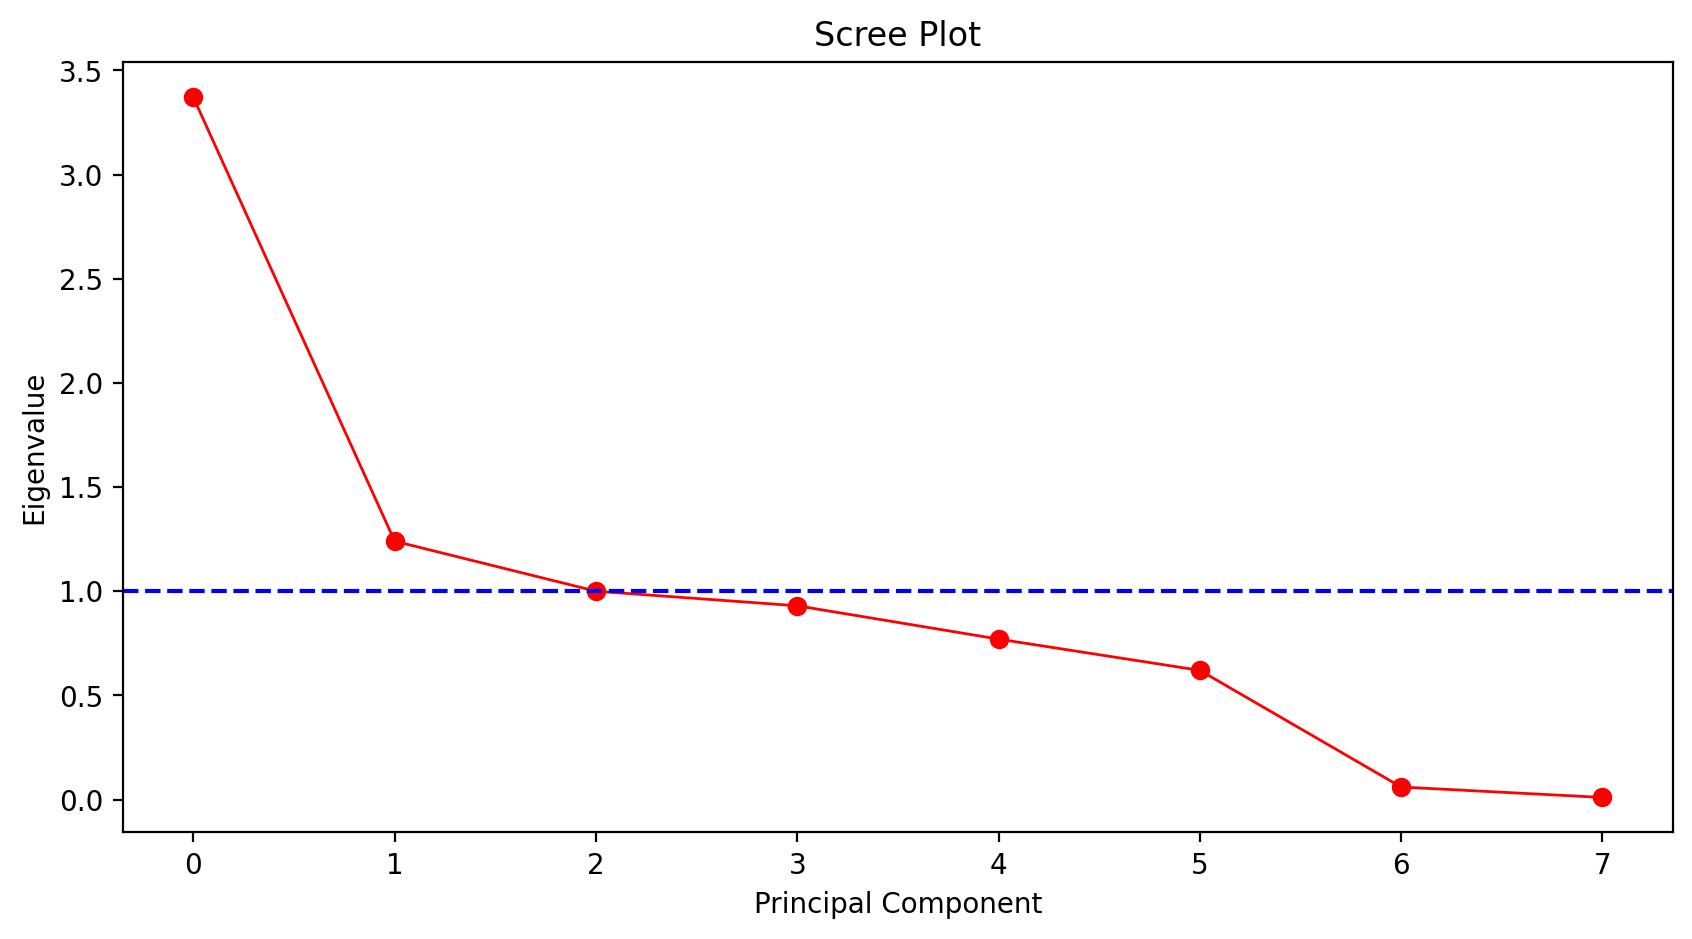

In [ ]:
# scree plot of eigenvalues
# define the x values, i.e., components
xvals = np.arange(nums.shape[1]);
#figure size
plt.figure(figsize=(10,5))
#plot in red color
plt.plot(xvals, eig, 'ro-', linewidth=1)
#set ticks to every unit
plt.xticks(xvals)

#add labels...
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')

#add a horizontal line in blue for latent root criterion
plt.axhline(y=1, color='b', linestyle='--')

In [ ]:
# Keeping the first 3 components based on scree test criterion (point of inflection)

# fit() function runs the PCA and shows the % of var explained
# fit_transform() function runs the PCA and shows the actual PCA values (the components score)
pcs = PCA(n_components=2)
principalComponents = pcs.fit_transform(preprocessing.scale(nums))

# make the output more readable by creating a new dataframe
principalDF = pd.DataFrame(
        data = principalComponents.round(2),
        columns = ['F1','F2']
        )

principalDF

F1    F2
0       0.65 -0.53
1      -0.08 -0.31
2       0.16  0.73
3      -0.83 -0.07
4      -0.89 -0.16
...      ...   ...
547693  2.79 -0.25
547694 -0.96 -0.09
547695  5.59 -1.19
547696 -0.06 -0.36
547697 -0.74 -0.23

[547698 rows x 2 columns]

In [ ]:
# confirm component scores are orthogonal (small correlations)
principalDF.corr().round(4)

F1   F2
F1  1.0  0.0
F2  0.0  1.0

In [ ]:
# concat principal components to df
df = pd.concat([df.dropna(subset=nums.columns, how='any').reset_index(drop=True), principalDF], axis=1)
# choose only categorical columns & new principle components
df = df.iloc[:,9:38]
df.head()

NewExist  Franchise  UrbanRural  RevLineCr  LowDoc  MIS_Status  \
0         1          1           0          0       0           0   
1         0          0           0          0       0           0   
2         1          0           0          1       0           0   
3         0          0           0          1       0           0   
4         0          0           0          0       0           0   

   Accommodation and food services  \
0                            False   
1                             True   
2                            False   
3                            False   
4                            False   

   Administrative and support and waste management and remediation services  \
0                                              False                          
1                                              False                          
2                                              False                          
3                                              False                          
4                                              False                          

   Agriculture, forestry, fishing, and hunting  \
0                                        False   
1                                        False   
2                                        False   
3                                        False   
4                                        False   

   Arts, entertainment, and recreation  Construction  Educational services  \
0                                False         False                 False   
1                                False         False                 False   
2                                False         False                  True   
3                                False          True                 False   
4                                False         False                 False   

   Finance and insurance  Health care and social assistance  Information  \
0                  False                              False        False   
1                  False                              False        False   
2                  False                              False        False   
3                  False                              False        False   
4                  False                              False        False   

   Management of companies and enterprises  Manufacturing  \
0                                    False          False   
1                                    False          False   
2                                    False          False   
3                                    False          False   
4                                    False          False   

   Mining, quarrying, and oil and gas extraction  Other services  \
0                                          False           False   
1                                          False           False   
2                                          False           False   
3                                          False           False   
4                                          False           False   

   Professional, scientific, and technical services  Public administration  \
0                                             False                  False   
1                                             False                  False   
2                                             False                  False   
3                                             False                  False   
4                                             False                  False   

   Real estate and rental and leasing  Retail trade  \
0                               False          True   
1                               False         False   
2                               False         False   
3                               False         False   
4                                True         False   

   Transportation and warehousing  Utilities  Wholesale trade    F1    F2  
0    

# Modeling

## Preparing data for modeling

In [ ]:
# Determine X and y

predictors = list(df.columns)
predictors.remove('MIS_Status')

X = df[predictors]
y = df['MIS_Status']


# Split the data

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=2)

X_train,X_val,y_train,y_val = train_test_split(X_train,y_train, test_size=0.25, random_state=2)

print(X_train.shape, X_val.shape, X_test.shape)
print(y_train.shape, y_val.shape, y_test.shape)

(328618, 34) (109540, 34) (109540, 34)
(328618,) (109540,) (109540,)


In [ ]:
def evaluate_model(model):
  y_pred_train = model.predict(X_train)
  y_pred_val = model.predict(X_val)

  # Accuracy and confusion matrix on training set
  train_score = accuracy_score(y_train, y_pred_train)
  print('Accuracy score of model on training data =', round(train_score*100,1), '%')
  print("Confusion Matrix of model on train data (watch out for overfitting!):")
  print(confusion_matrix(y_train, y_pred_train))

  # Accuracy and confusion matrix on validation set
  val_score = accuracy_score(y_val, y_pred_val)
  print('\nAccuracy score of model on validation data =', round(val_score*100,1), '%')
  print("Confusion Matrix of model on validation data:")
  print(confusion_matrix(y_val, y_pred_val))

  # Cross validation score
  cv_scores = cross_val_score(model, X_train, y_train, cv=5)
  print('\nAccuracy scores of each fold: ', [f'{cvscore:.3f}' for cvscore in cv_scores])
  print('5-fold cross-validation mean accuracy:', round(cv_scores.mean(),3))

In [ ]:
def calculate_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    return accuracy, precision, recall, f1

## 1. Baseline Model - accuracy 76.11%

In [ ]:
texts =  df["MIS_Status"]
baseline_prediction = 0
# Assign the same prediction to all instances
baseline_predictions = [baseline_prediction] * len(texts)
baseline_predictions = pd.DataFrame(baseline_predictions)
# Accuracy test
accuracy = accuracy_score(texts, baseline_predictions)
print("Baseline accuracy:", accuracy)

Baseline accuracy: 0.7611749540805335


In [ ]:
cm = confusion_matrix(texts, baseline_predictions)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[416894      0]
 [130804      0]]


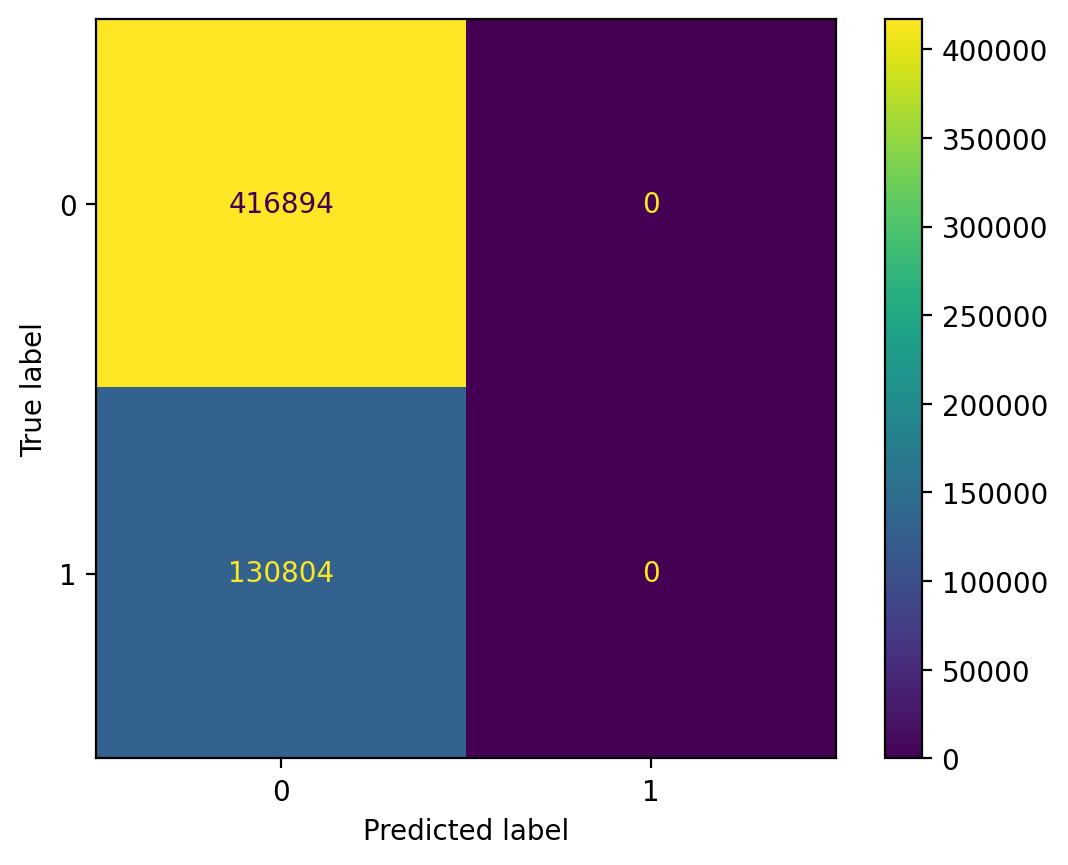

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

## 2. Logistic Regression - best accuracy 80%

In [ ]:
lr = LogisticRegression(C=.01, penalty='l2', solver='liblinear', max_iter=500).fit(X_train, y_train)
y_pred = lr.predict(X_val)
print("Accuracy: ", accuracy_score(y_val,y_pred))

lr_int = lr.intercept_[0]
lr_coef = lr.coef_[0]

# print coefficients
print('intercept ', lr_int)
print(pd.DataFrame({'coeff': lr_coef}, index=X_train.columns))


Accuracy:  0.7611192258535695
intercept  -9.190199630568479e-05
                                                           coeff
Term                                               -1.833005e-02
NoEmp                                              -1.113450e-03
CreateJob                                          -2.241151e-05
RetainedJob                                        -6.960494e-04
DisbursementGross                                  -5.973668e-07
BalanceGross                                       -1.023090e-04
GrAppv                                              3.135196e-06
SBA_Appv                                           -2.578495e-06
Recession                                           1.179622e-05
NewExist                                           -2.440597e-05
Franchise                                          -3.513791e-06
UrbanRural                                         -3.989715e-05
RevLineCr                                          -6.348570e-05
LowDoc                    

In [ ]:
# print Exponentiated coefficients
exp_coef = []
for i in range(len(lr_coef)):
  exp_coef.append(math.exp(lr_coef[i]))

print(pd.DataFrame({'exp coeff': exp_coef}, index=X_train.columns))

                                                    exp coeff
Term                                                 0.981837
NoEmp                                                0.998887
CreateJob                                            0.999978
RetainedJob                                          0.999304
DisbursementGross                                    0.999999
BalanceGross                                         0.999898
GrAppv                                               1.000003
SBA_Appv                                             0.999997
Recession                                            1.000012
NewExist                                             0.999976
Franchise                                            0.999996
UrbanRural                                           0.999960
RevLineCr                                            0.999937
LowDoc                                               0.999973
Accommodation and food services                      0.999999
Administ

In [ ]:
# With adjusted cutoff
# Example predictions from your logistic regression model
y_pred_probs = lr.predict_proba(X_val)[:, 1]  # Predicted probabilities for class 1

# Define a range of cutoff values to iterate over
cutoff_values = np.arange(0.1, 1.0, 0.1)  # Example range from 0.1 to 0.9 with step size 0.1

# Initialize variables to store the best cutoff and corresponding score
best_cutoff = None
best_score = 0.0

# Iterate over cutoff values
for cutoff in cutoff_values:
    # Adjust predictions based on the current cutoff
    y_pred_adjusted = (y_pred_probs >= cutoff).astype(int)

    # Calculate performance metrics
    accuracy = accuracy_score(y_val, y_pred_adjusted)
    precision = precision_score(y_val, y_pred_adjusted)
    recall = recall_score(y_val, y_pred_adjusted)
    f1 = f1_score(y_val, y_pred_adjusted)

    composite_score = accuracy  # You can choose a different metric if desired

    # Check if the current cutoff improves the best score
    if composite_score > best_score:
        best_score = composite_score
        best_cutoff = cutoff

# Print the best cutoff and corresponding score
print("Best cutoff:", best_cutoff)
print("Score:", best_score)

Best cutoff: 0.30000000000000004
Score: 0.8047197370823443


In [ ]:
clflog = LogisticRegression(C=.3, penalty='l2', solver='liblinear', max_iter=500).fit(X_train, y_train)
y_pred = clflog.predict(X_val)
accuracy_score(y_test,y_pred)

0.757120686507212

In [ ]:
y_pred_test_probs = clflog.predict_proba(X_test)[:, 1]  # Predicted probabilities for class 1
y_pred_test_adjusted = (y_pred_test_probs >= best_cutoff).astype(int)

precision_test = precision_score(y_test, y_pred_test_adjusted)
recall_test = recall_score(y_test, y_pred_test_adjusted)
f1_test = f1_score(y_test, y_pred_test_adjusted)

print("Precision Score on y_test:", precision_test)
print("Recall Score on y_test:", recall_test)
print("F1 Score on y_test:", f1_test)

Precision Score on y_test: 0.6121562283337185
Recall Score on y_test: 0.5083288554540569
F1 Score on y_test: 0.5554320702887459


## 3. Decision Tree - best accuracy 92.8%

In [ ]:
# Full Tree - 89.8% Accuracy

full_clf = DecisionTreeClassifier(random_state=0)
full_clf.fit(X_train, y_train)

print('Number of nodes', full_clf.tree_.node_count, '\n')

evaluate_model(full_clf)

Number of nodes 56479 

Accuracy score of model on training data = 99.9 %
Confusion Matrix of model on train data (watch out for overfitting!):
[[250018     16]
 [   359  78225]]

Accuracy score of model on validation data = 89.9 %
Confusion Matrix of model on validation data:
[[77892  5482]
 [ 5573 20593]]

Accuracy scores of each fold:  ['0.897', '0.898', '0.899', '0.899', '0.897']
5-fold cross-validation mean accuracy: 0.898


In [ ]:
y_pred = full_clf.predict(X_test)
accuracy, precision, recall, f1 = calculate_metrics(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8996165784188425
Precision: 0.7896214802277274
Recall: 0.7878636677669456
F1 Score: 0.7887415946205573


In [ ]:
print('Number of leaves:', full_clf.tree_.n_leaves)
print('Maximum depth:', full_clf.tree_.max_depth)

Number of leaves: 28240
Maximum depth: 52


In [ ]:
# Reduced Tree - 84.7% accuracy

# Let's try to "shrink" the tree to make it less prone to overfitting
# the options available can be found here:
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
#
# The most popular ones:
# max_depth : maximum depth of the tree
# min_samples_split :  The minimum number of samples required to split a node
# min_samples_leaf : Minimum # of samples inside of every leaf
# min_impurity_decrease : minimum absolute 'error' improvement to justify a split
# criterion : gini (default) or entropy
# ...

reduced_clf = DecisionTreeClassifier(
      max_depth=10,
      min_samples_split = 50,
      min_samples_leaf = 50,
      min_impurity_decrease = 0.01,
      criterion = 'gini')
reduced_clf.fit(X_train, y_train)

print('Number of nodes', reduced_clf.tree_.node_count, '\n')

evaluate_model(reduced_clf)

Number of nodes 7 

Accuracy score of model on training data = 84.7 %
Confusion Matrix of model on train data (watch out for overfitting!):
[[210696  39338]
 [ 10957  67627]]

Accuracy score of model on validation data = 84.5 %
Confusion Matrix of model on validation data:
[[70127 13247]
 [ 3713 22453]]

Accuracy scores of each fold:  ['0.846', '0.848', '0.848', '0.848', '0.845']
5-fold cross-validation mean accuracy: 0.847


In [ ]:
y_pred = reduced_clf.predict(X_test)
accuracy, precision, recall, f1 = calculate_metrics(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8460379769947052
Precision: 0.6295941105125096
Recall: 0.856720657096799
F1 Score: 0.7258035670736663


In [ ]:
# Text representation of reduced tree
text_representation = tree.export_text(reduced_clf, feature_names=list(X_train))
print(text_representation)


|--- Term <= 59.50
|   |--- class: 1
|--- Term >  59.50
|   |--- Term <= 82.50
|   |   |--- Term <= 60.50
|   |   |   |--- class: 0
|   |   |--- Term >  60.50
|   |   |   |--- class: 1
|   |--- Term >  82.50
|   |   |--- class: 0



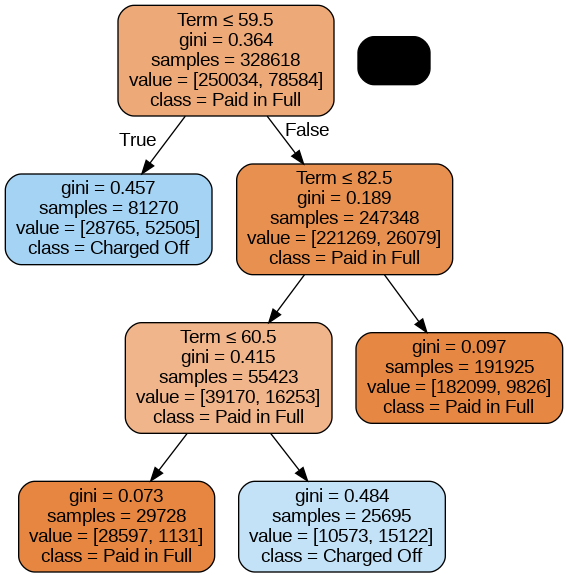

In [ ]:
dot_data = StringIO()
export_graphviz(reduced_clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = list(X_train),class_names=['Paid in Full','Charged Off'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('loans.png')
Image(graph.create_png())

In [ ]:
# Grid Search

param_grid = {
    'max_depth': [20, 30, 50],
    'min_samples_leaf': [20, 30, 50, 100],
    'min_impurity_decrease': [0, 0.001, 0.01],
}

# Then, use the GridSearchCV function which combines gridsearch with
# K-fold cross validation (cv parameter)
gridSearch = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring = 'accuracy')
gridSearch.fit(X_train, y_train)

print('Best accuracy: ', gridSearch.best_score_)
print('Parameter values to achieve best accuracy: ', gridSearch.best_params_)

Best accuracy:  0.9281506213514188
Parameter values to achieve best accuracy:  {'max_depth': 30, 'min_impurity_decrease': 0, 'min_samples_leaf': 30}


In [ ]:
# Create tree using best params from gridSearch
grid_clf = DecisionTreeClassifier(max_depth = 20, min_samples_leaf = 30, min_impurity_decrease = 0)
grid_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=20, min_impurity_decrease=0,
                       min_samples_leaf=30)

In [ ]:
evaluate_model(grid_clf)

Accuracy score of model on training data = 93.5 %
Confusion Matrix of model on train data (watch out for overfitting!):
[[238549  11485]
 [  9809  68775]]

Accuracy score of model on validation data = 92.8 %
Confusion Matrix of model on validation data:
[[79155  4219]
 [ 3669 22497]]

Accuracy scores of each fold:  ['0.928', '0.928', '0.928', '0.930', '0.927']
5-fold cross-validation mean accuracy: 0.928


In [ ]:
y_pred = grid_clf.predict(X_test)
accuracy, precision, recall, f1 = calculate_metrics(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.92837319700566
Precision: 0.8441705731135641
Recall: 0.8570660934981192
F1 Score: 0.8505694587285263


## 4. Random Forest - best accuracy 91.3%

In [ ]:
# Run the RF classifier, specifying the number of trees to generate
# Note, being careful about overfitting is not as critical
# when using random forest classifiers, given they randomize over
# the data and the feature columns
# n_estimators is the total number of different random trees to generate
#
rf = RandomForestClassifier(
    n_estimators=100,
    random_state=0,
    criterion='gini',
    n_jobs = -1)
rf.fit(X_train, y_train)

evaluate_model(rf)

Accuracy score of model on training data = 99.9 %
Confusion Matrix of model on train data (watch out for overfitting!):
[[249915    119]
 [   264  78320]]

Accuracy score of model on validation data = 91.3 %
Confusion Matrix of model on validation data:
[[79514  3860]
 [ 5697 20469]]

Accuracy scores of each fold:  ['0.912', '0.913', '0.912', '0.914', '0.912']
5-fold cross-validation mean accuracy: 0.912


In [ ]:
y_pred = rf.predict(X_test)
accuracy, precision, recall, f1 = calculate_metrics(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9123699105349644
Precision: 0.8402183351941447
Recall: 0.7798802487142089
F1 Score: 0.8089256922188824


In [ ]:
# Grid Search

param_grid = {
    'max_depth':[30,50],
    'min_samples_leaf':[30,50],
    'min_impurity_decrease':[0,0.01]
}

# Then, use the GridSearchCV function which combines gridsearch with
# K-fold cross validation (cv parameter)
gridSearch = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring = 'accuracy', verbose=3)
gridSearch.fit(X_train, y_train)


Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END max_depth=30, min_impurity_decrease=0, min_samples_leaf=30;, score=0.899 total time=  28.5s
[CV 2/5] END max_depth=30, min_impurity_decrease=0, min_samples_leaf=30;, score=0.899 total time=  28.4s
[CV 3/5] END max_depth=30, min_impurity_decrease=0, min_samples_leaf=30;, score=0.902 total time=  30.7s
[CV 4/5] END max_depth=30, min_impurity_decrease=0, min_samples_leaf=30;, score=0.898 total time=  29.9s
[CV 5/5] END max_depth=30, min_impurity_decrease=0, min_samples_leaf=30;, score=0.896 total time=  28.8s
[CV 1/5] END max_depth=30, min_impurity_decrease=0, min_samples_leaf=50;, score=0.891 total time=  27.2s
[CV 2/5] END max_depth=30, min_impurity_decrease=0, min_samples_leaf=50;, score=0.895 total time=  26.4s
[CV 3/5] END max_depth=30, min_impurity_decrease=0, min_samples_leaf=50;, score=0.892 total time=  29.8s
[CV 4/5] END max_depth=30, min_impurity_decrease=0, min_samples_leaf=50;, score=0.893 total time=  2

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [30, 50],
                         'min_impurity_decrease': [0, 0.01],
                         'min_samples_leaf': [30, 50]},
             scoring='accuracy', verbose=3)

In [ ]:
print('Best accuracy: ', gridSearch.best_score_)
print('Parameter values to achieve best accuracy: ', gridSearch.best_params_)

Best accuracy:  0.9001484875450527
Parameter values to achieve best accuracy:  {'max_depth': 50, 'min_impurity_decrease': 0, 'min_samples_leaf': 30}


In [ ]:
# Create tree using best params from gridSearch
grid_rf = RandomForestClassifier(max_depth = 50, min_samples_leaf = 30, min_impurity_decrease = 0)
grid_rf.fit(X_train, y_train)

evaluate_model(grid_rf)

Accuracy score of model on training data = 90.8 %
Confusion Matrix of model on train data (watch out for overfitting!):
[[238579  11455]
 [ 18809  59775]]

Accuracy score of model on validation data = 90.3 %
Confusion Matrix of model on validation data:
[[79328  4046]
 [ 6561 19605]]

Accuracy scores of each fold:  ['0.898', '0.900', '0.900', '0.900', '0.897']
5-fold cross-validation mean accuracy: 0.899


In [ ]:
y_pred = grid_rf.predict(X_test)
accuracy, precision, recall, f1 = calculate_metrics(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9013145882782545
Precision: 0.8254205447869525
Recall: 0.7420357718584478
F1 Score: 0.7815102271808554


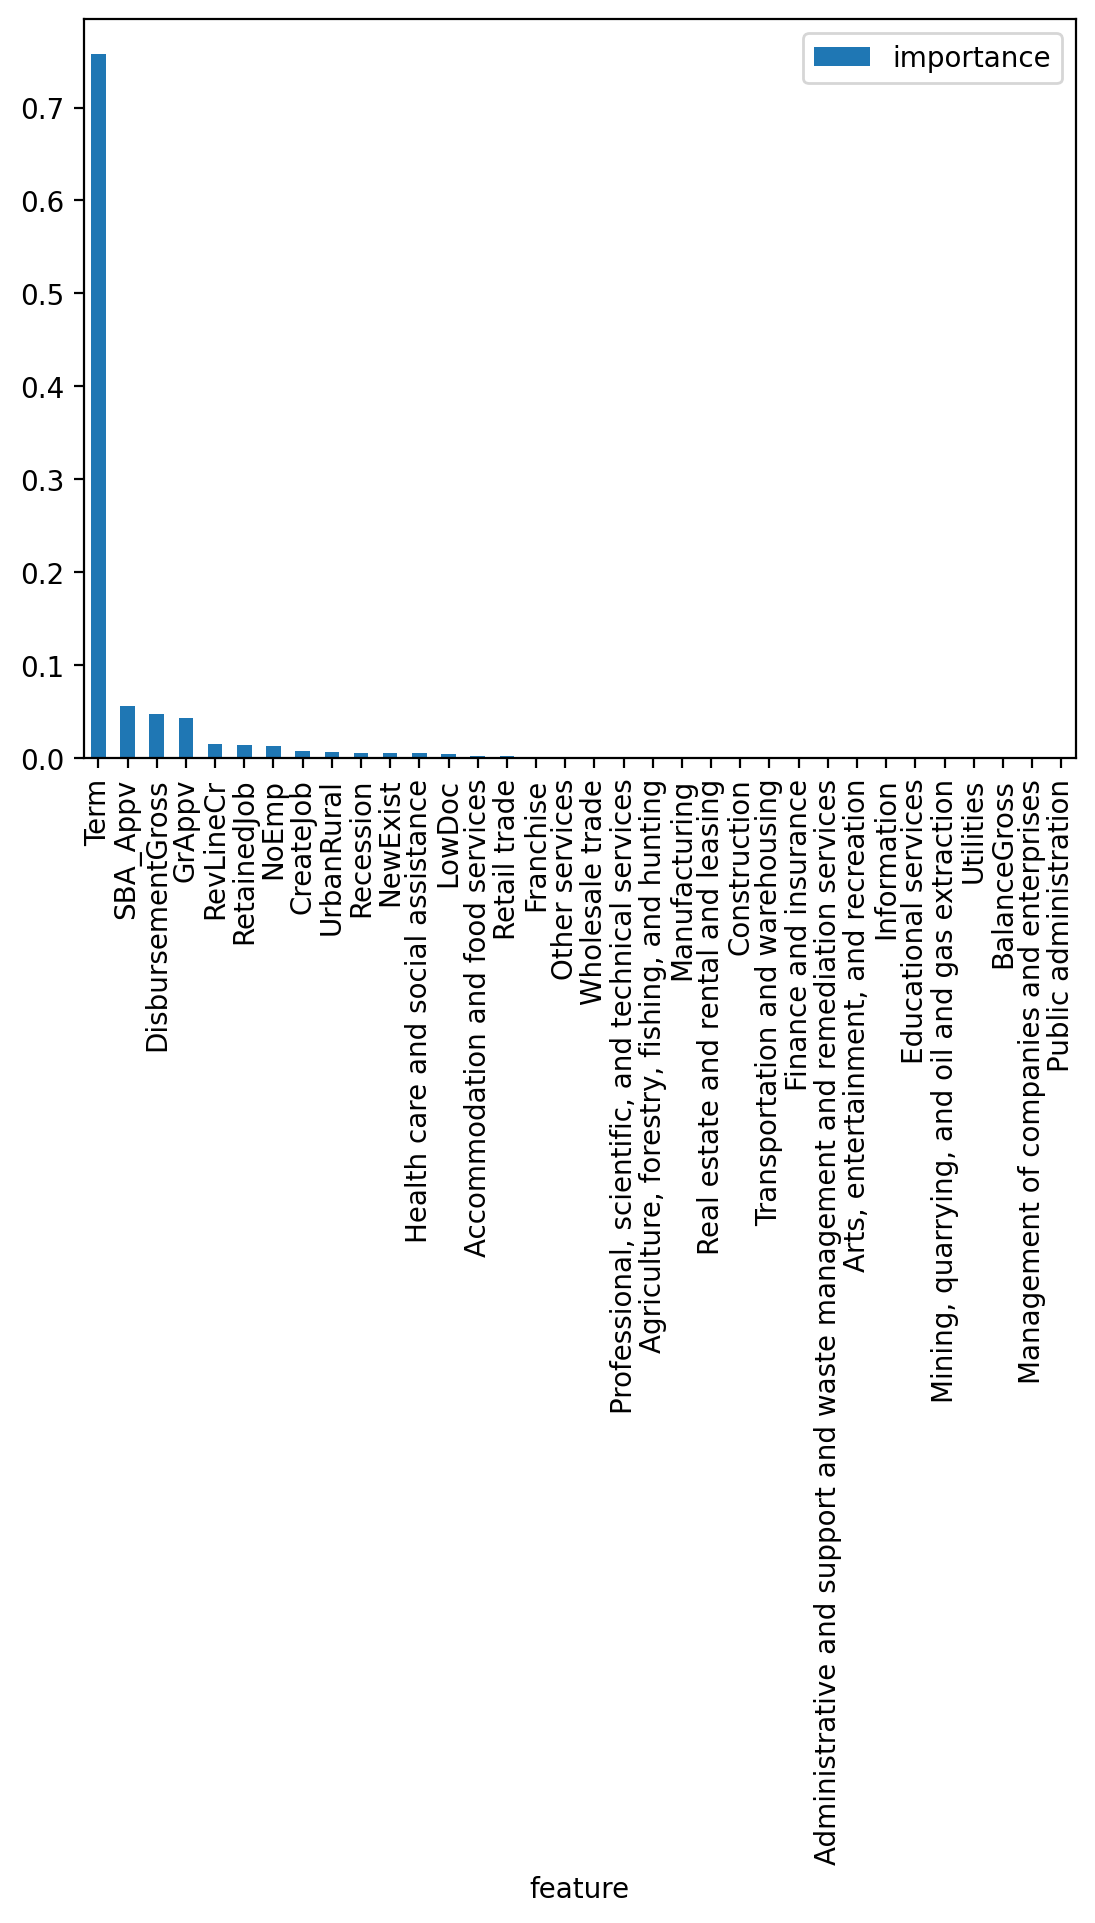

In [ ]:
# Extract importance values for each feature (column of X)
importances = grid_rf.feature_importances_

# create a dataframe to store the values and their labels
df2 = pd.DataFrame({'feature': X_train.columns, 'importance': importances})

# sort dataframe by descending order, showing the most important feature top
df2 = df2.sort_values('importance', ascending = False)

# plot the importance of each feature
ax = df2.plot(kind='bar', x='feature')

plt.tight_layout()
plt.show()

## 5. Gradient Boosting - best accuracy 93.4%

In [ ]:
gbc = GradientBoostingClassifier(n_estimators=200, learning_rate=0.2, max_depth=6, random_state=0)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.2, max_depth=6, n_estimators=200,
                           random_state=0)

In [ ]:
evaluate_model(gbc)

Accuracy score of model on training data = 94.3 %
Confusion Matrix of model on train data (watch out for overfitting!):
[[240698   9336]
 [  9320  69264]]

Accuracy score of model on validation data = 93.4 %
Confusion Matrix of model on validation data:
[[79759  3615]
 [ 3647 22519]]

Accuracy scores of each fold:  ['0.934', '0.935', '0.935', '0.935', '0.933']
5-fold cross-validation mean accuracy: 0.934


In [ ]:
y_pred = gbc.predict(X_test)
accuracy, precision, recall, f1 = calculate_metrics(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9346722658389629
Precision: 0.865984971725153
Recall: 0.8581407845244492
F1 Score: 0.862045033929673


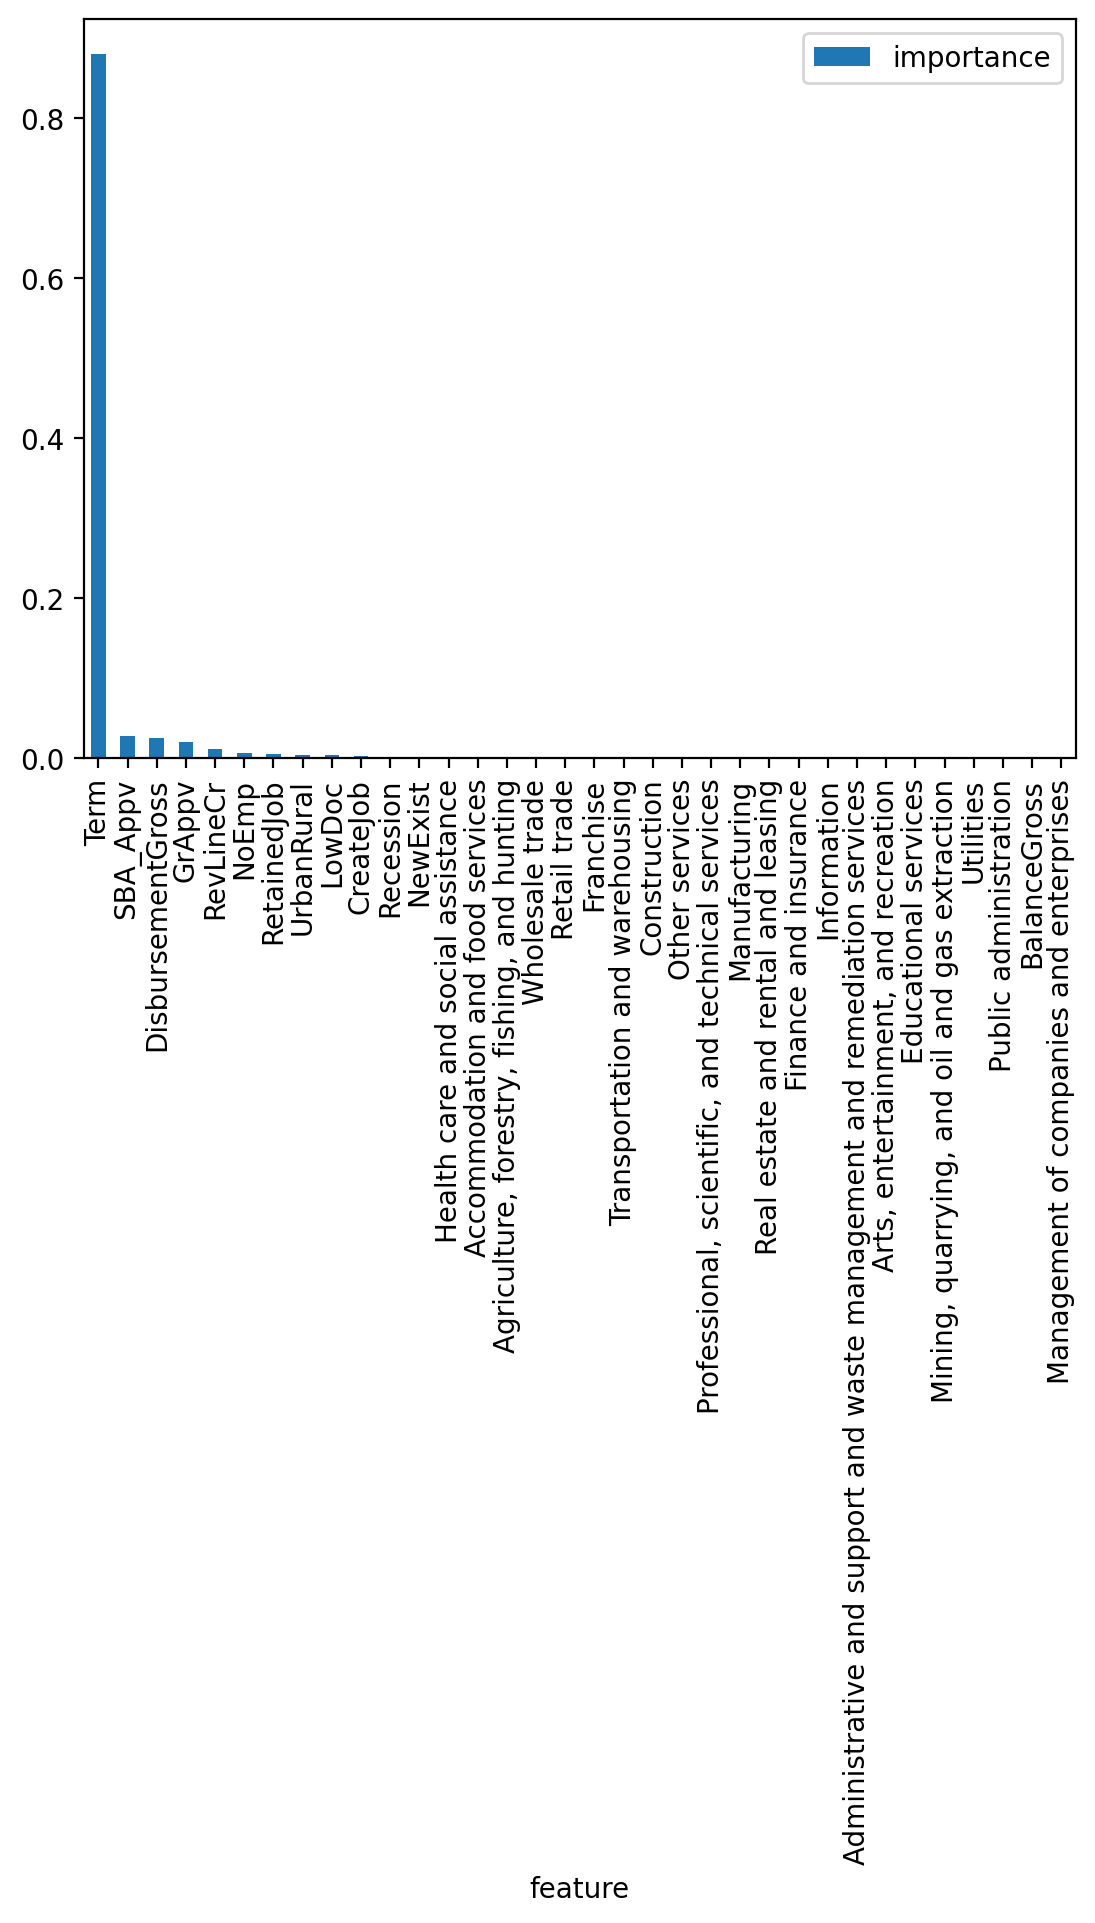

In [ ]:
# Extract importance values for each feature (column of X)
importances = gbc.feature_importances_

# create a dataframe to store the values and their labels
df2 = pd.DataFrame({'feature': X_train.columns, 'importance': importances})

# sort dataframe by descending order, showing the most important feature top
df2 = df2.sort_values('importance', ascending = False)

# plot the importance of each feature
ax = df2.plot(kind='bar', x='feature')

plt.tight_layout()
plt.show()

In [ ]:
#TAKES LONG TIME TO RUN - could try gridsearch without cv
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5],
}

grid_search = GridSearchCV(GradientBoostingClassifier(random_state=2), param_grid, cv=None)
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)

# Visualizations

## Decision Tree Visualizations

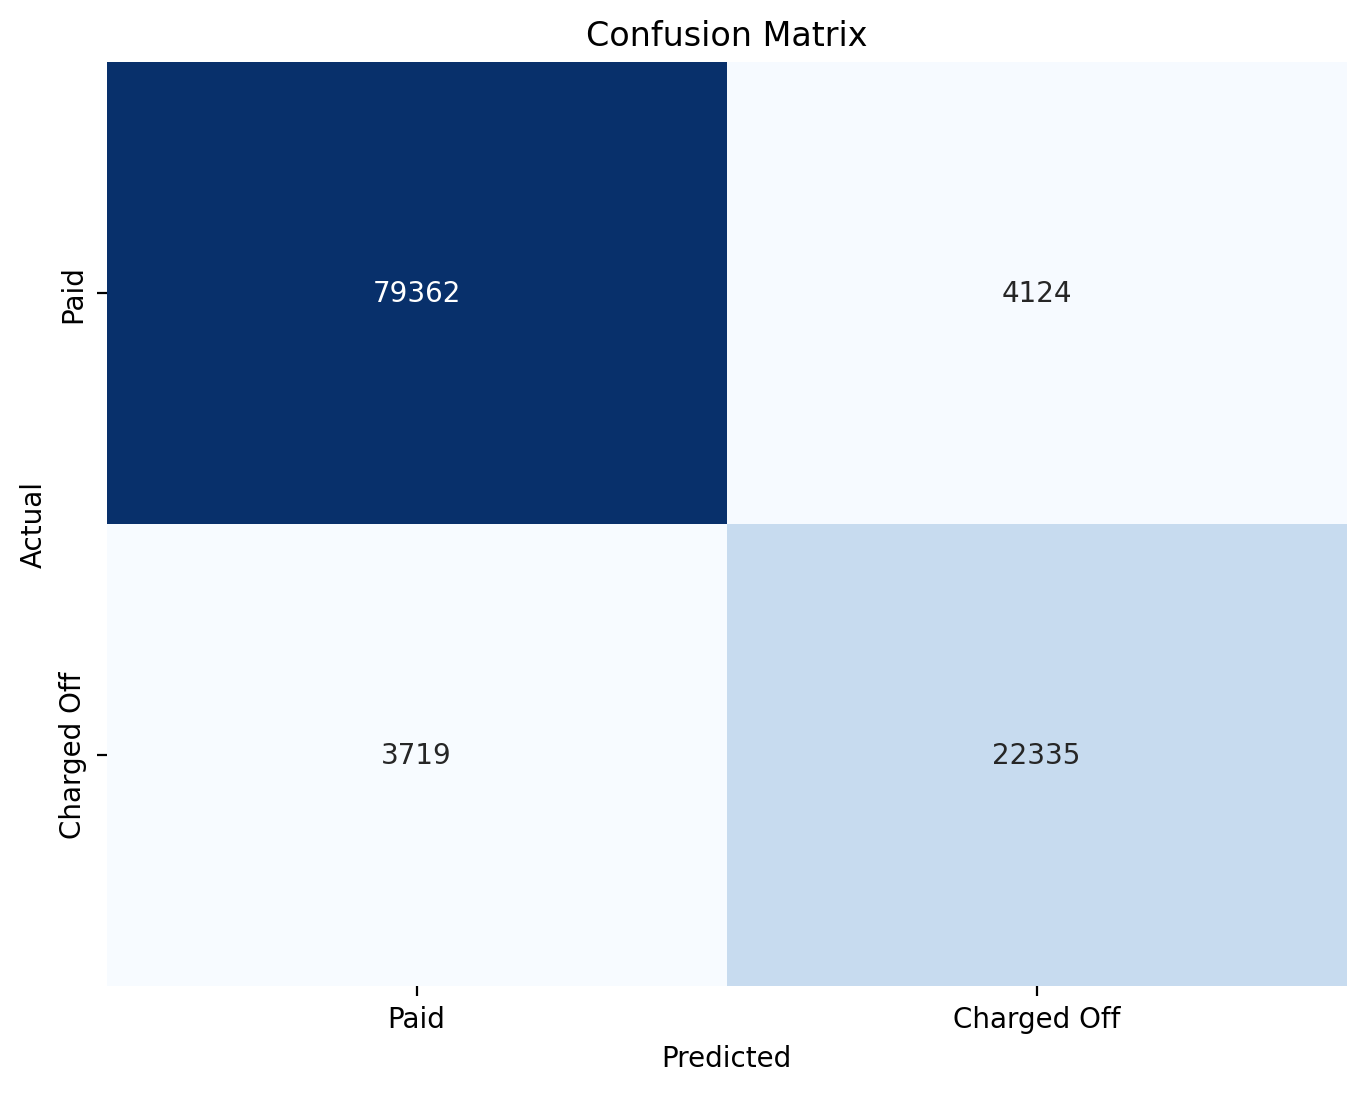

In [ ]:
# Decision Tree w Grid Search Confusion Matrix
y_pred = grid_clf.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',cbar=False,
            xticklabels=['Paid', 'Charged Off'], yticklabels=['Paid', 'Charged Off'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Text representation of grid search tree

text_representation = tree.export_text(grid_clf, feature_names=list(X_train))
print(text_representation)

|--- Term <= 59.50
|   |--- Term <= 48.50
|   |   |--- Term <= 47.50
|   |   |   |--- Term <= 36.50
|   |   |   |   |--- Term <= 35.50
|   |   |   |   |   |--- GrAppv <= 149856.50
|   |   |   |   |   |   |--- Term <= 24.50
|   |   |   |   |   |   |   |--- Term <= 23.50
|   |   |   |   |   |   |   |   |--- Term <= 11.50
|   |   |   |   |   |   |   |   |   |--- RevLineCr <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- NoEmp <= 8.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 10
|   |   |   |   |   |   |   |   |   |   |--- NoEmp >  8.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 9
|   |   |   |   |   |   |   |   |   |--- RevLineCr >  0.50
|   |   |   |   |   |   |   |   |   |   |--- SBA_Appv <= 66625.00
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 10
|   |   |   |   |   |   |   |   |   |   |--- SBA_Appv >  66625.00
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   

In [ ]:
# Visualize the grid search d-tree via "plot_tree" function

# First, re-size the figure via matplotlib(otherwise it will be too small)
plt.figure(figsize=(19,17))

# Then call plot_tree() function
# the 'filled' option generates colors in the nodes

tree.plot_tree(grid_clf, filled=True, fontsize=3, feature_names=list(X_train))

Output hidden; open in https://colab.research.google.com to view.

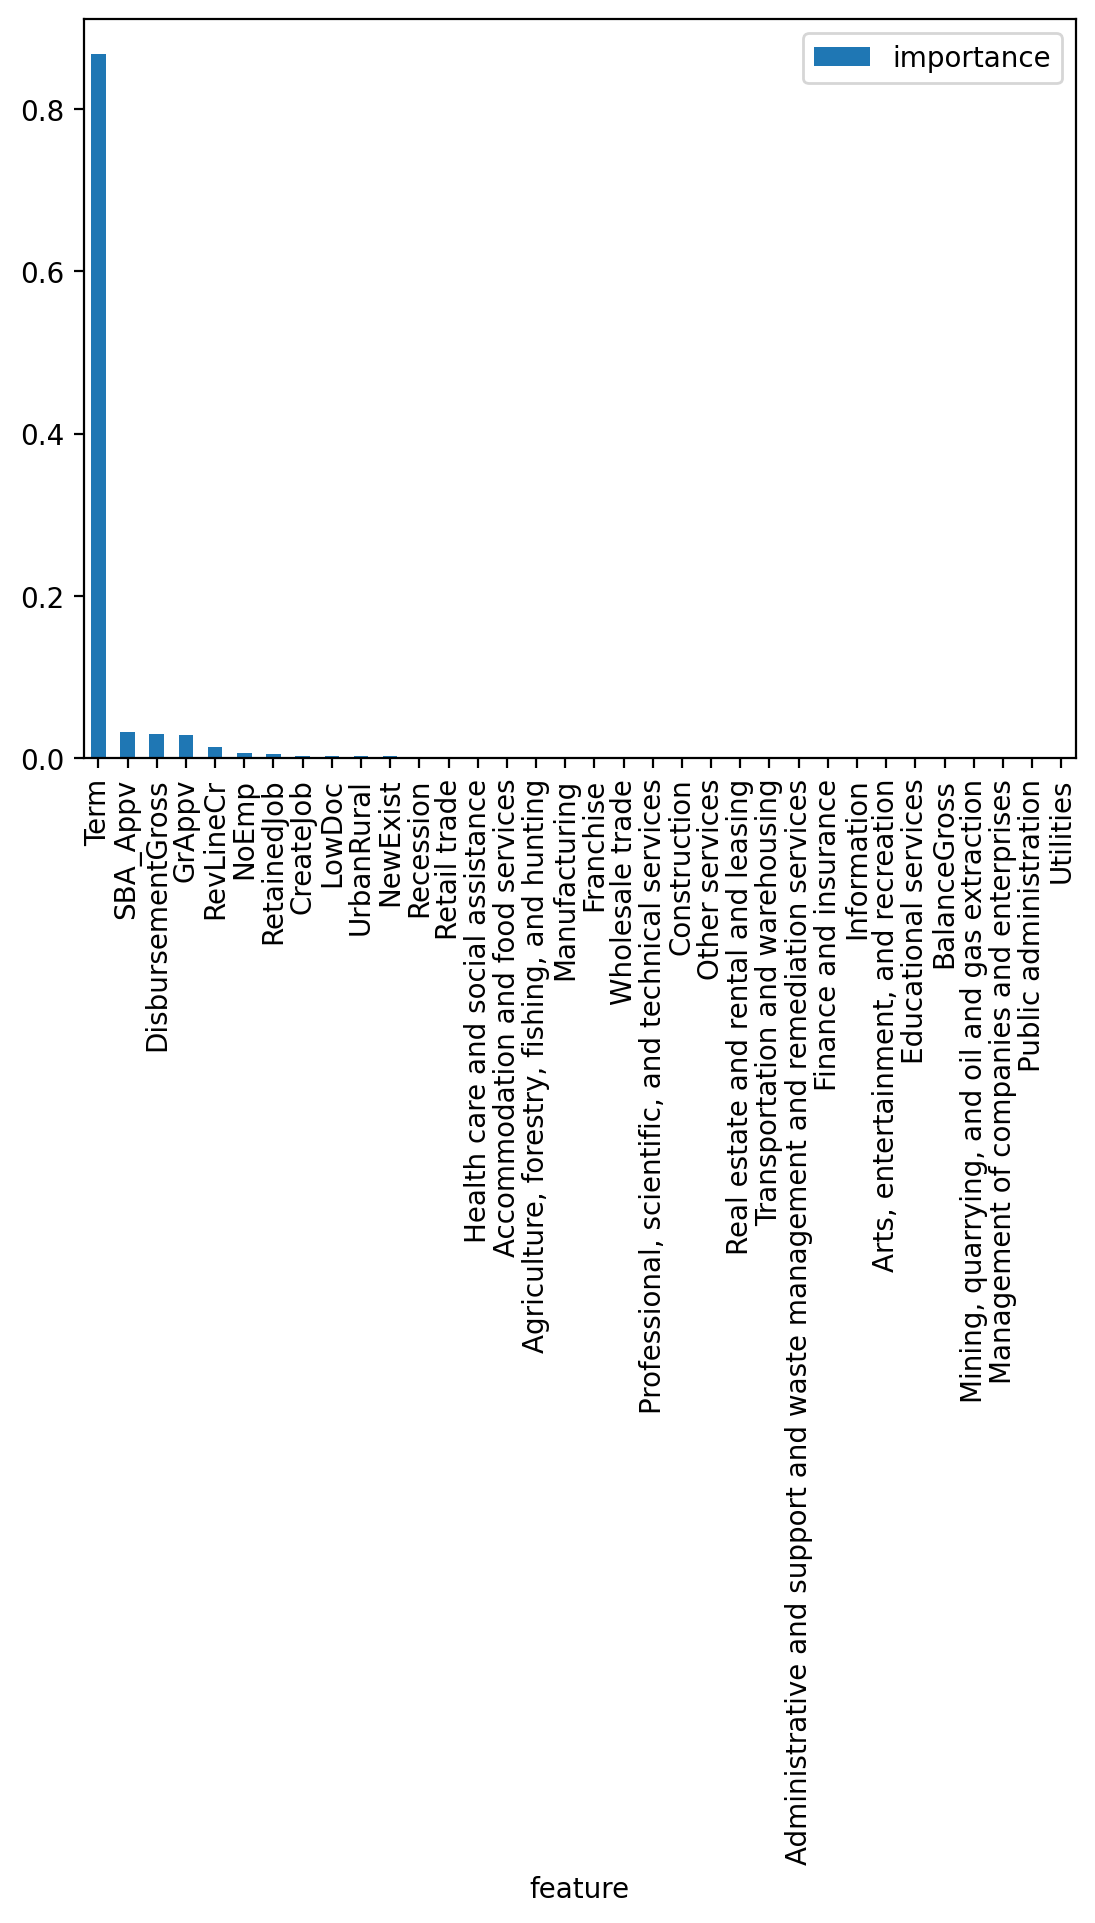

In [ ]:
# Extract importance values for each feature (column of X)
importances = grid_clf.feature_importances_

# create a dataframe to store the values and their labels
df2 = pd.DataFrame({'feature': X_train.columns, 'importance': importances})

# sort dataframe by descending order, showing the most important feature top
df2 = df2.sort_values('importance', ascending = False)

# plot the importance of each feature
ax = df2.plot(kind='bar', x='feature')

plt.tight_layout()
plt.show()

## Gradient Boosting Visualizations

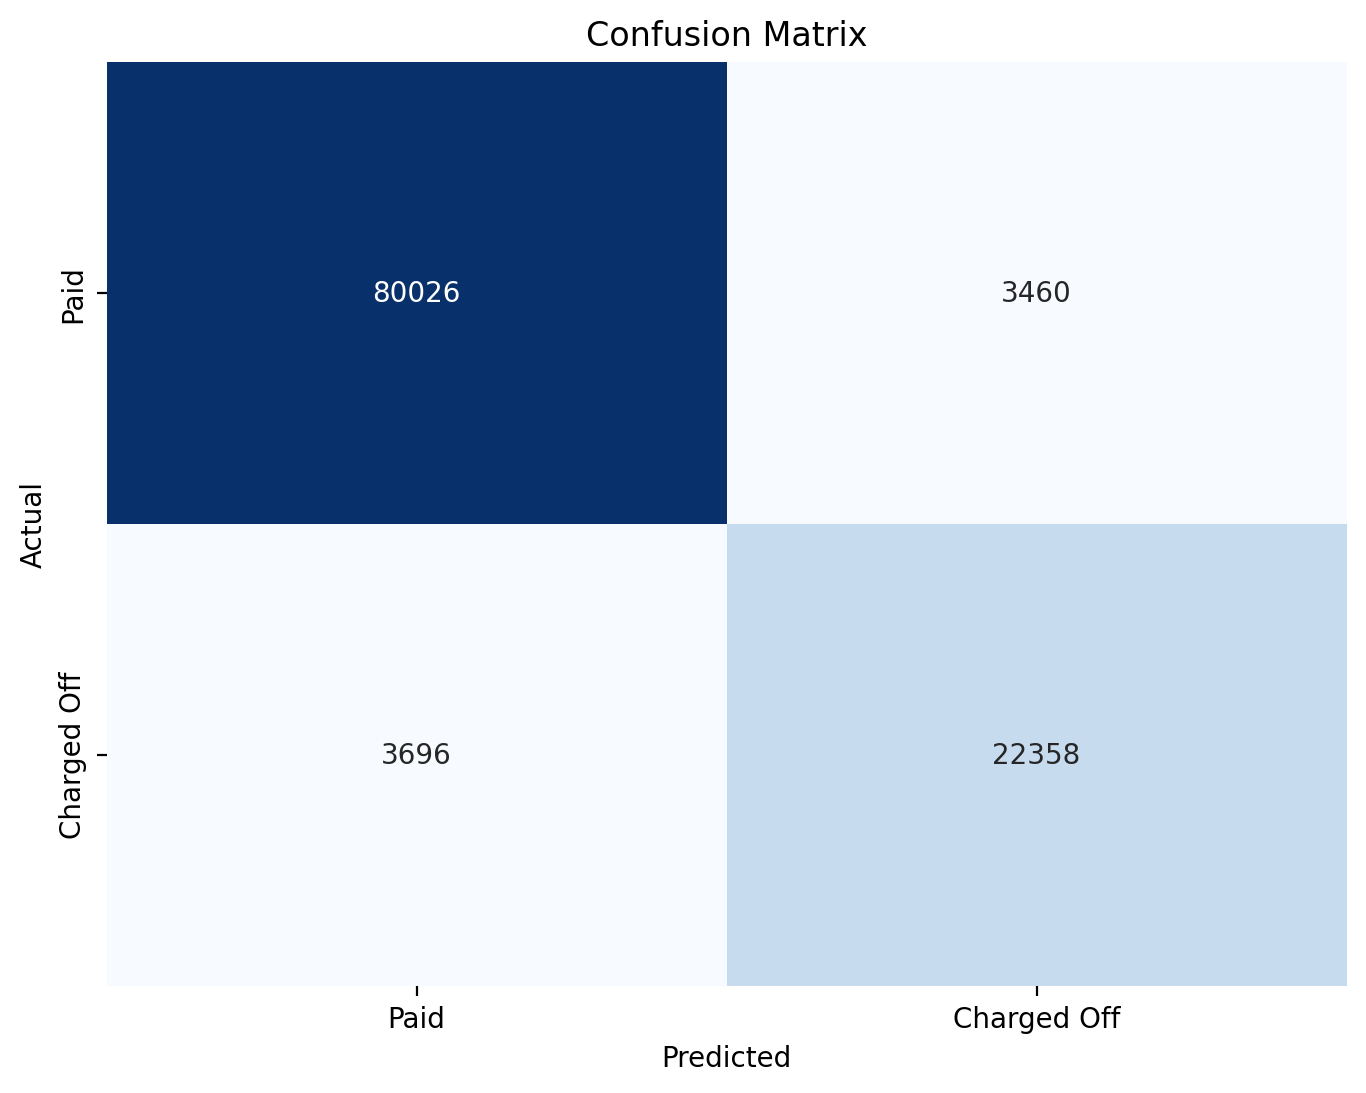

In [ ]:
y_pred = gbc.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',cbar=False,
            xticklabels=['Paid', 'Charged Off'], yticklabels=['Paid', 'Charged Off'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

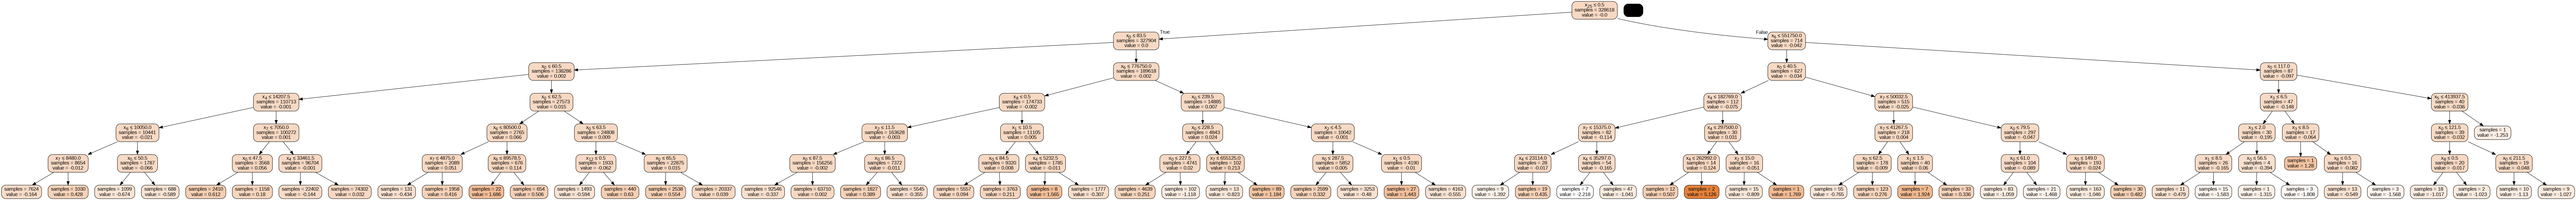

In [ ]:
# Gradient Boosting Visualization
# https://stackoverflow.com/questions/44974360/how-to-visualize-an-sklearn-gradientboostingclassifier


# Get the tree number 42, for example
sub_tree_42 = gbc.estimators_[42, 0]

# Visualization
# Install graphviz: https://www.graphviz.org/download/

dot_data = export_graphviz(
    sub_tree_42,
    out_file=None, filled=True, rounded=True,
    special_characters=True,
    proportion=False, impurity=False, # enable them if you want
)
graph = graph_from_dot_data(dot_data)
png = graph.create_png()
Image(png, width = 2000, height = 300)

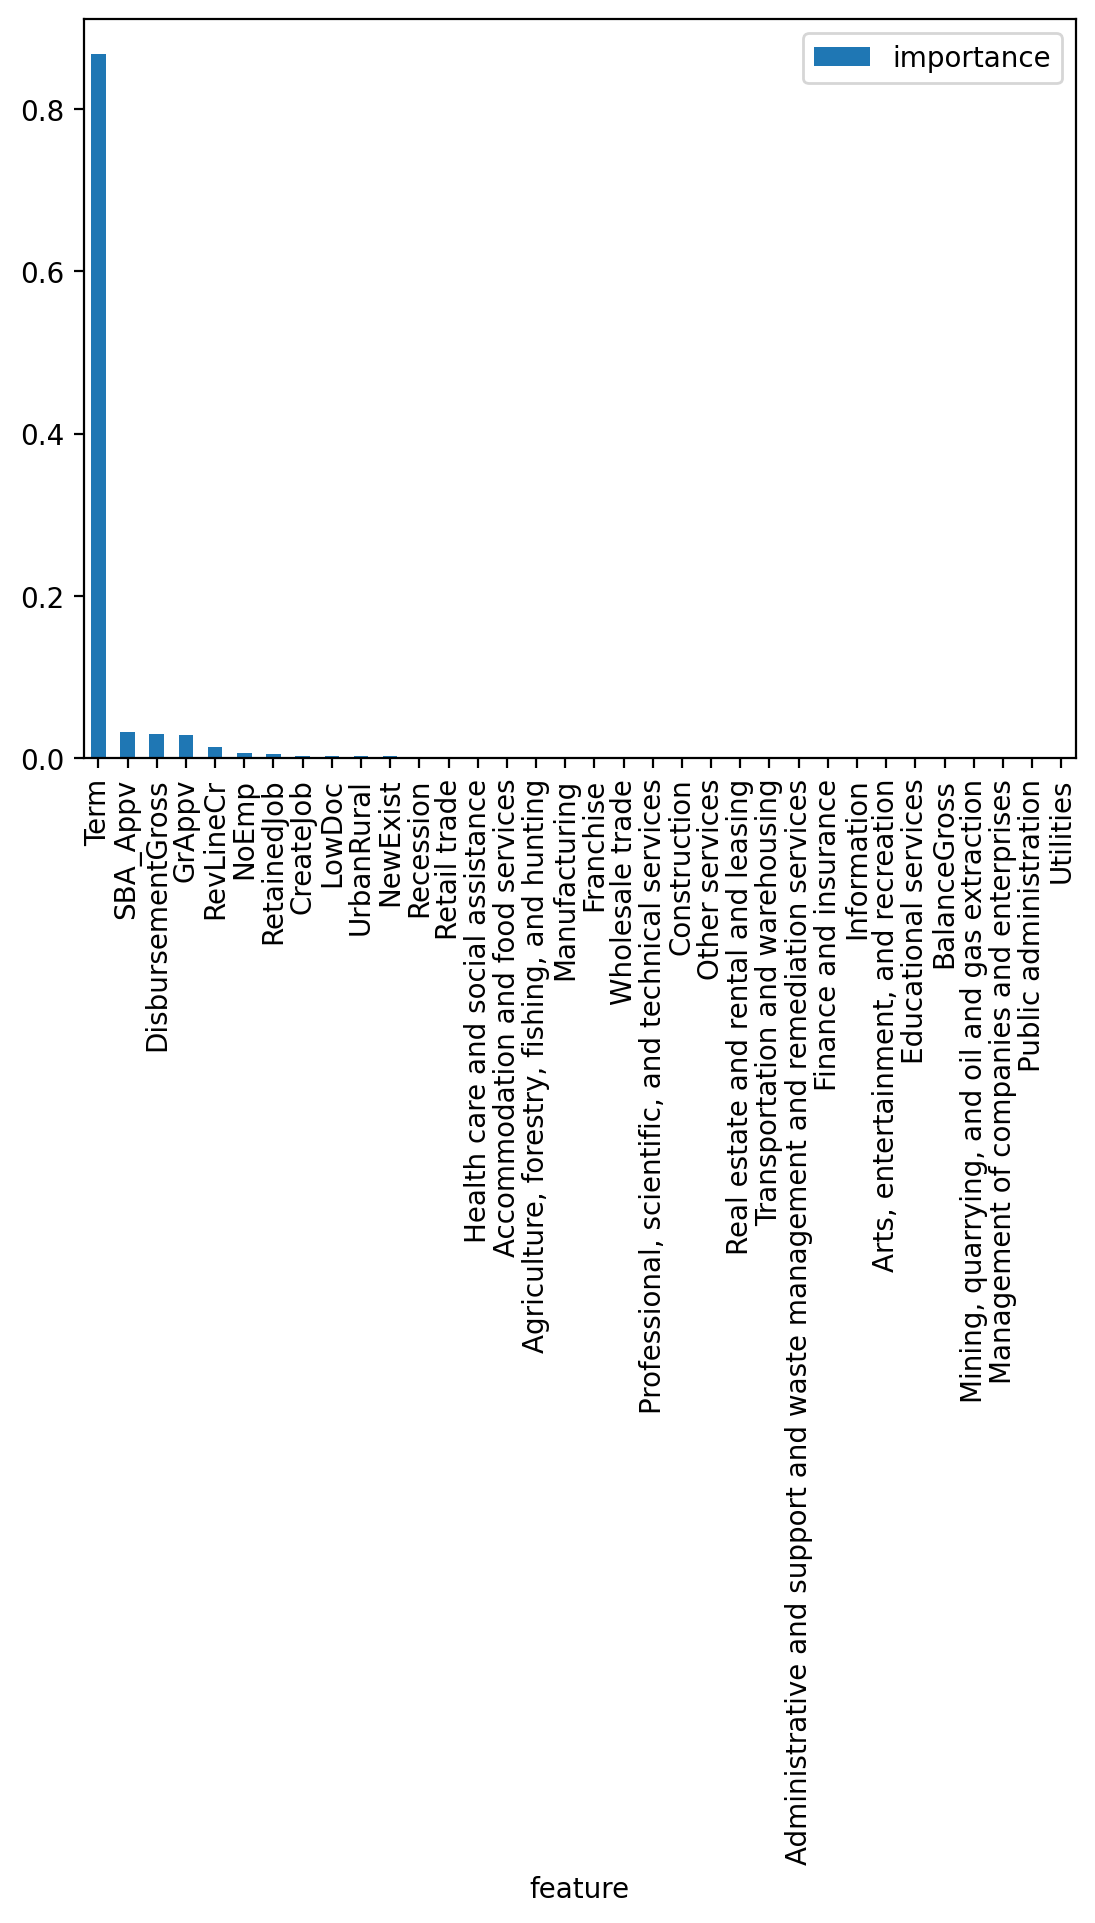

In [ ]:
# Feature Importances for the model

importances = grid_clf.feature_importances_

# create a dataframe to store the values and their labels
df2 = pd.DataFrame({'feature': X_train.columns, 'importance': importances})

# sort dataframe by descending order, showing the most important feature top
df2 = df2.sort_values('importance', ascending = False)

# plot the importance of each feature
ax = df2.plot(kind='bar', x='feature')

plt.tight_layout()
plt.show()

# Testing

## Evaluating the Models on the Test Dataset

In [ ]:
def test_model(model):
  y_pred_train = model.predict(X_train)
  y_pred_test = model.predict(X_test)

  # Accuracy on training set
  train_score = accuracy_score(y_train, y_pred_train)
  print('Accuracy score of model on training data =', round(train_score*100,1), '%')

  # Accuracy and confusion matrix on test set
  val_score = accuracy_score(y_test, y_pred_test)
  print('\nAccuracy score of model on test data =', round(val_score*100,1), '%')
  print("Confusion Matrix of model on test data:")
  print(confusion_matrix(y_test, y_pred_test))

  # Cross validation score
  cv_scores = cross_val_score(model, X_train, y_train, cv=5)
  print('\nAccuracy scores of each fold: ', [f'{cvscore:.3f}' for cvscore in cv_scores])
  print('5-fold cross-validation mean accuracy:', round(cv_scores.mean(),3))

In [ ]:
test_model(lr)

Accuracy score of model on training data = 76.1 %

Accuracy score of model on test data = 76.2 %
Confusion Matrix of model on test data:
[[82989   497]
 [25529   525]]

Accuracy scores of each fold:  ['0.760', '0.761', '0.761', '0.761', '0.761']
5-fold cross-validation mean accuracy: 0.761


In [ ]:
test_model(grid_clf)

Accuracy score of model on training data = 93.5 %

Accuracy score of model on test data = 92.8 %
Confusion Matrix of model on test data:
[[79364  4122]
 [ 3724 22330]]

Accuracy scores of each fold:  ['0.928', '0.928', '0.928', '0.930', '0.927']
5-fold cross-validation mean accuracy: 0.928


In [ ]:
test_model(grid_rf)

Accuracy score of model on training data = 90.8 %

Accuracy score of model on test data = 90.1 %
Confusion Matrix of model on test data:
[[79397  4089]
 [ 6721 19333]]

Accuracy scores of each fold:  ['0.898', '0.901', '0.901', '0.900', '0.897']
5-fold cross-validation mean accuracy: 0.899


In [ ]:
test_model(gbc)

Accuracy score of model on training data = 94.3 %

Accuracy score of model on test data = 93.5 %
Confusion Matrix of model on test data:
[[80026  3460]
 [ 3696 22358]]

Accuracy scores of each fold:  ['0.934', '0.935', '0.935', '0.935', '0.933']
5-fold cross-validation mean accuracy: 0.934


## Identifying variables to test business loans on the model

### Exploring MIS Status & Industries

In [ ]:
# Examining MIS-Status= 1 - charged off business loans
df[df['MIS_Status']==1]

Term  NoEmp  CreateJob  RetainedJob  DisbursementGross  BalanceGross  \
8        167      9          0            9            1350000             0   
11        26      4          1            5              60859             0   
15         5      1          3            4              28090             0   
16        54      4          8            4              76432             0   
24        27     10         11           10              90518             0   
...      ...    ...        ...          ...                ...           ...   
547687    34      5          0            5             160456             0   
547688     7      6          1            7             120899             0   
547689    60      1          0            1              57707             0   
547692    29      2          2            2             170000             0   
547696   107      2          0            0             170000             0   

         GrAppv  SBA_Appv  Recession  NewExist  Franchise  UrbanRural  \
8       1350000   1012500          0         0          0           0   
11        20000     10000          0         1          0           1   
15        28300     24055          0         1          0           0   
16        30000     15000          0         0          0           1   
24        50000     25000          0         0          0           0   
...         ...       ...        ...       ...        ...         ...   
547687    60000     30000          0         1          0           0   
547688    85000     42500          0         0          0           0   
547689    50000     25000          0         0          0           0   
547692   170000    127500          0         1          0           0   
547696   170000    127500          0         0          0           1   

        RevLineCr  LowDoc  MIS_Status  Accommodation and food services  \
8               0       0           1                            False   
11              1       0           1                            False   
15              0       0           1                            False   
16              1       0           1                            False   
24              1       0           1                            False   
...           ...     ...         ...                              ...   
547687          1       0           1                            False   
547688          1       0           1                            False   
547689          1       0           1                            False   
547692          0       0           1                            False   
547696          0       0           1                            False   

        Administrative and support and waste management and remediation services  \
8                                                   False                          
11                                                  False                          
15                                                  False                          
16                                                   True                          
24                                                   True                          
...                                                   ...                          
547687                                              False                          
547688                                              False                          
547689                                              False                          
547692                                              False                          
547696                                              False                          

        Agriculture, forestry, fishing, and hunting  \
8                                             False   
11                                            False   
15                                            False   
16                                            False 

Text(0.5, 1.0, 'Number of Small Business Loans in Each Industry')

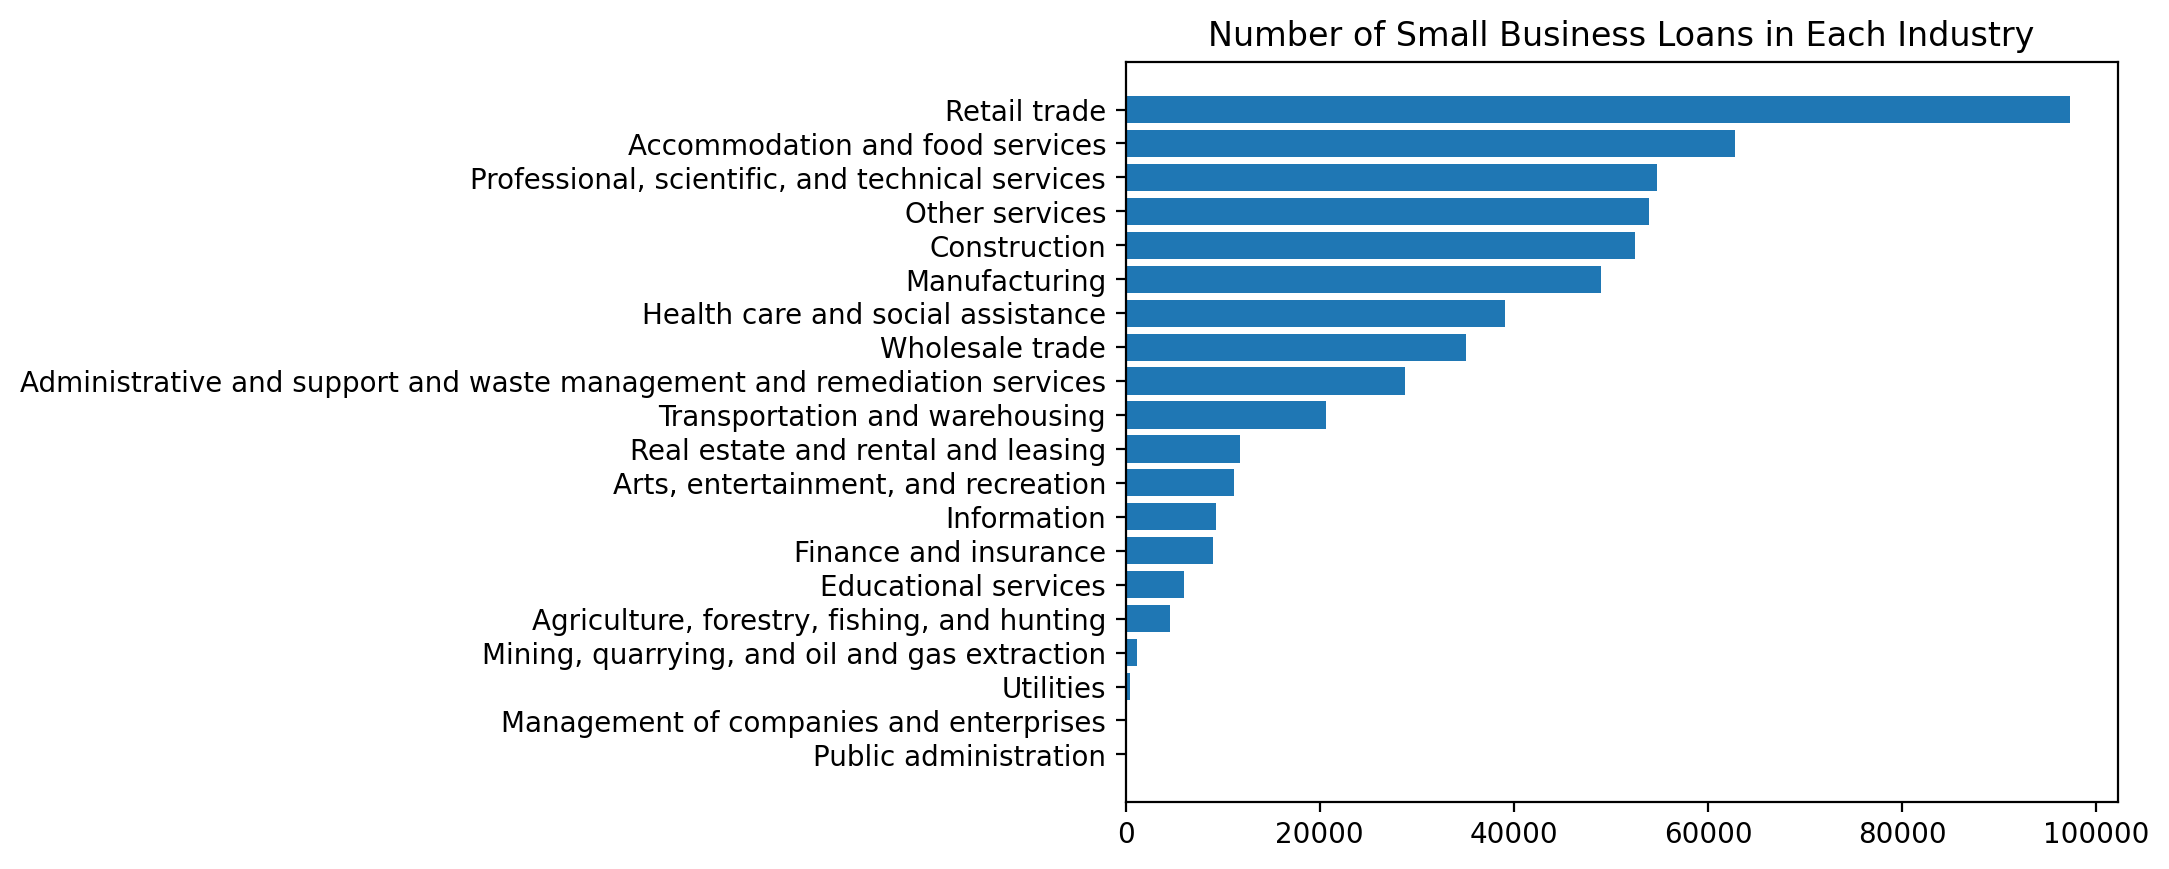

In [ ]:
# top common industries - choose retail to test since its most common

all = df.iloc[:,15:35]

all_industries = []
for (industry, values) in all.items():
  sum = 0
  for value in values:
    if value == True:
      sum += 1
  all_industries.append(sum)

all_df = pd.DataFrame(
    dict(
        industries=list(all),
        count=all_industries
    )
)

all_df_sorted = all_df.sort_values('count')
plt.barh('industries', 'count', data=all_df_sorted)
plt.title("Number of Small Business Loans in Each Industry", fontsize=12)

### Exploration of industry
(Not indicative of the model's decision making, for data exploration purposes only)

Text(0.5, 1.0, 'Number of Small Business Loans Charged Off in Each Industry')

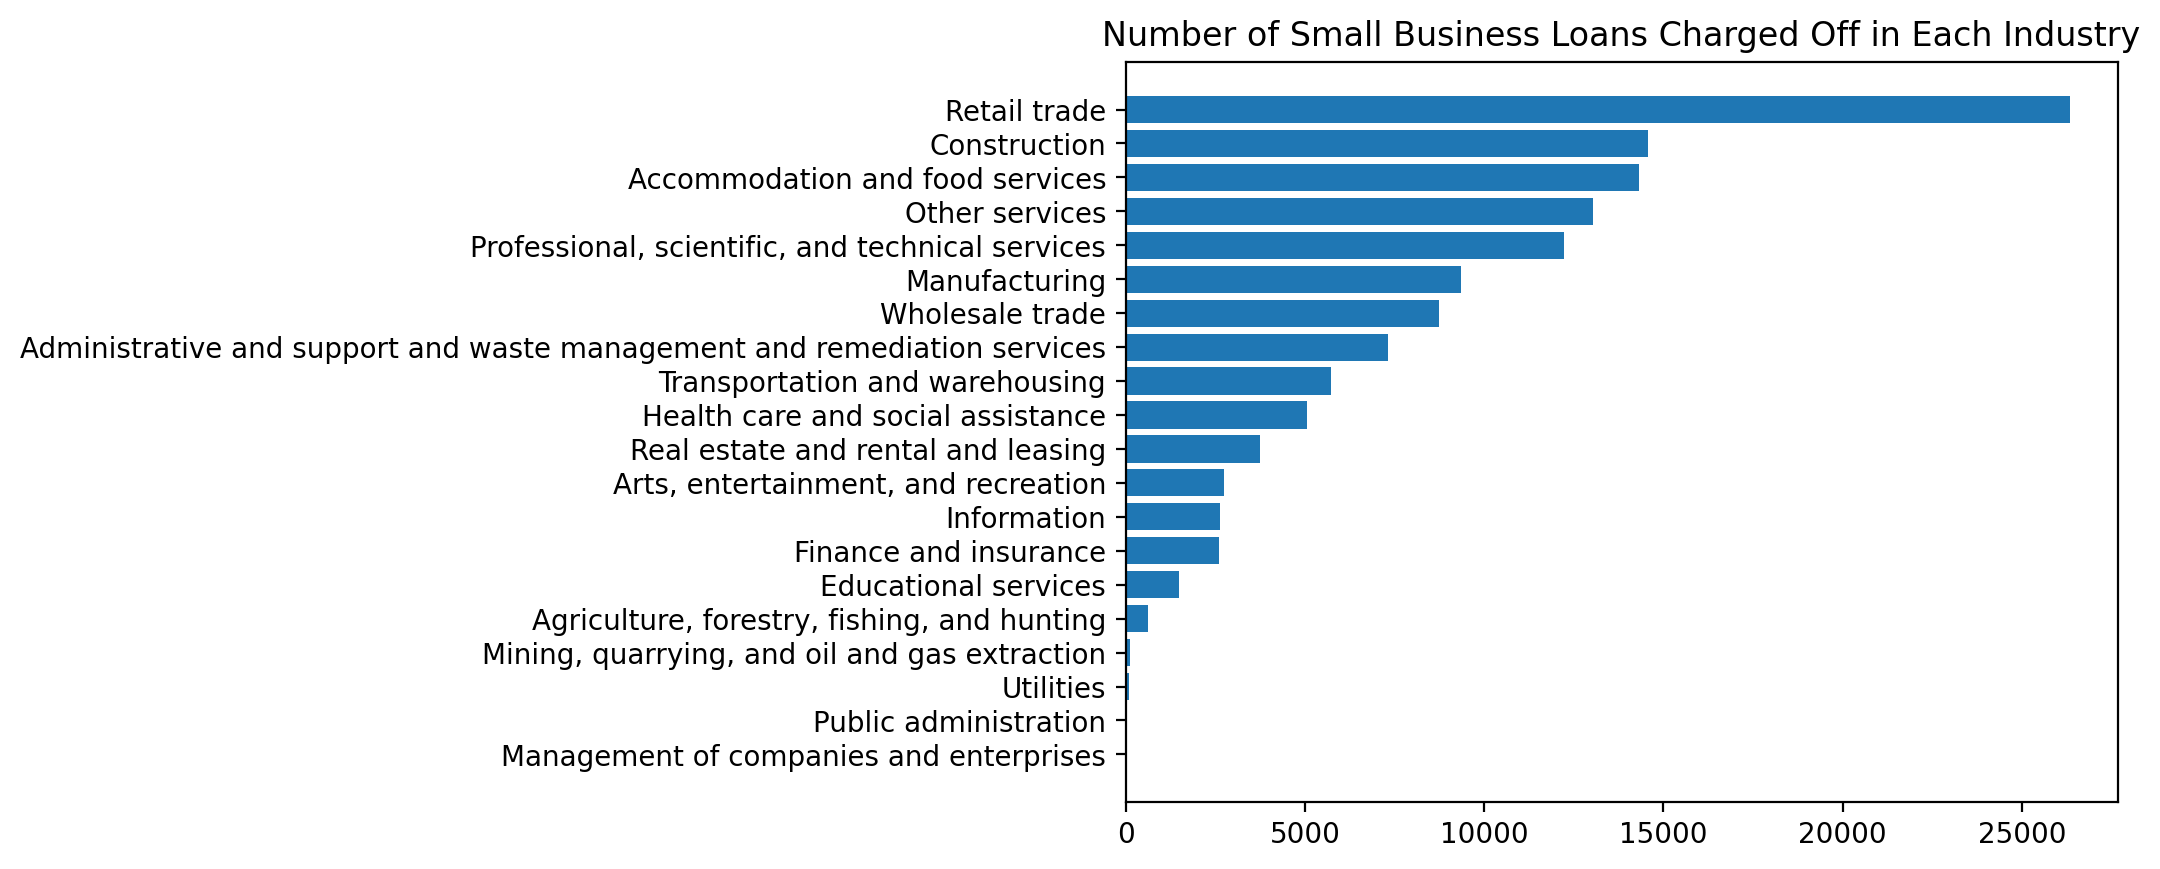

In [ ]:
# of business loans charged off in each industry

chargedoff = df[df['MIS_Status']==1].iloc[:,15:35]

chargedoff_industries = []
for (industry, values) in chargedoff.items():
  sum = 0
  for value in values:
    if value == True:
      sum += 1
  chargedoff_industries.append(sum)

chargedoff_df = pd.DataFrame(
    dict(
        industries=list(chargedoff),
        count=chargedoff_industries
    )
)

chargedoff_df_sorted = chargedoff_df.sort_values('count')
plt.barh('industries', 'count', data=chargedoff_df_sorted)
plt.title("Number of Small Business Loans Charged Off in Each Industry", fontsize=12)

Text(0.5, 1.0, 'Number of Small Business Loans Paid in Full in Each Industry')

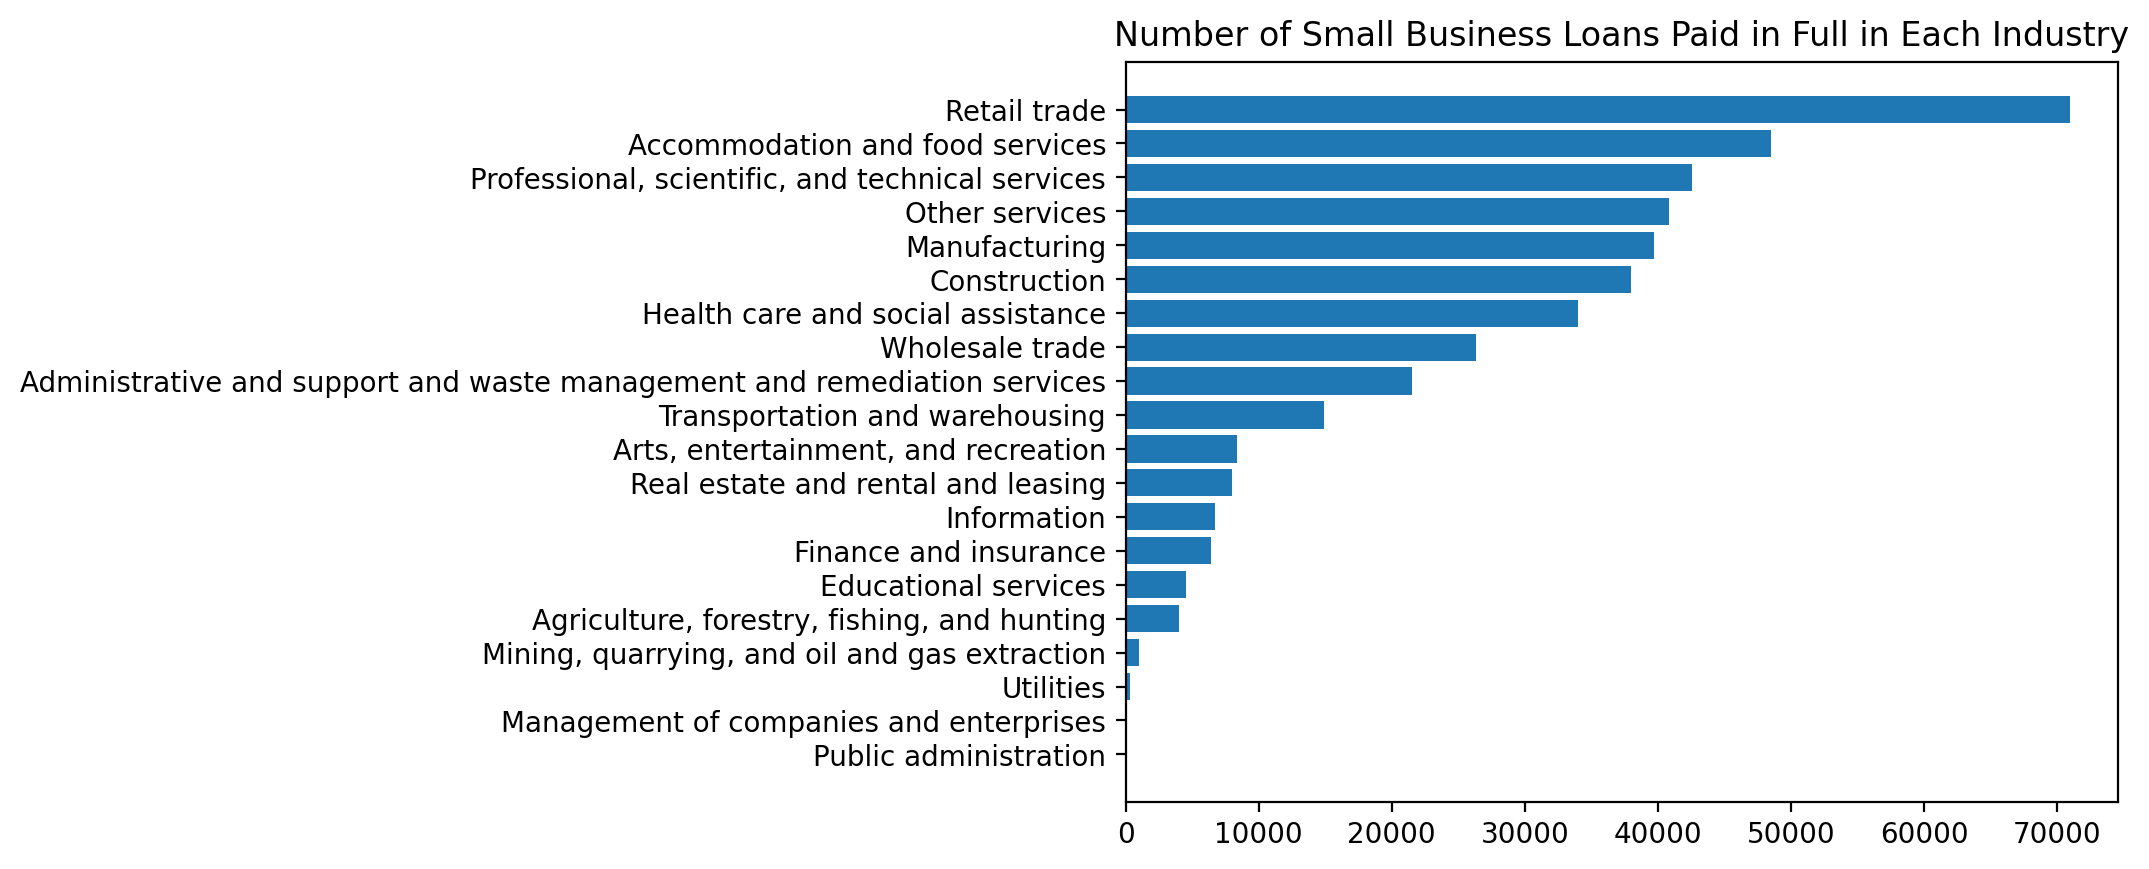

In [ ]:
# of business loans paid in full in each industry

paidinfull = df[df['MIS_Status']==0].iloc[:,15:35]

paidinfull_industries = []
for (industry, values) in paidinfull.items():
  sum = 0
  for value in values:
    if value == True:
      sum += 1
  paidinfull_industries.append(sum)

paidinfull_df = pd.DataFrame(
    dict(
        industries=list(paidinfull),
        count=paidinfull_industries
    )
)

paidinfull_df_sorted = paidinfull_df.sort_values('count')
plt.barh('industries', 'count', data=paidinfull_df_sorted)
plt.title("Number of Small Business Loans Paid in Full in Each Industry", fontsize=12)

### Distribution of target class and top 2 feature variables

<Axes: >

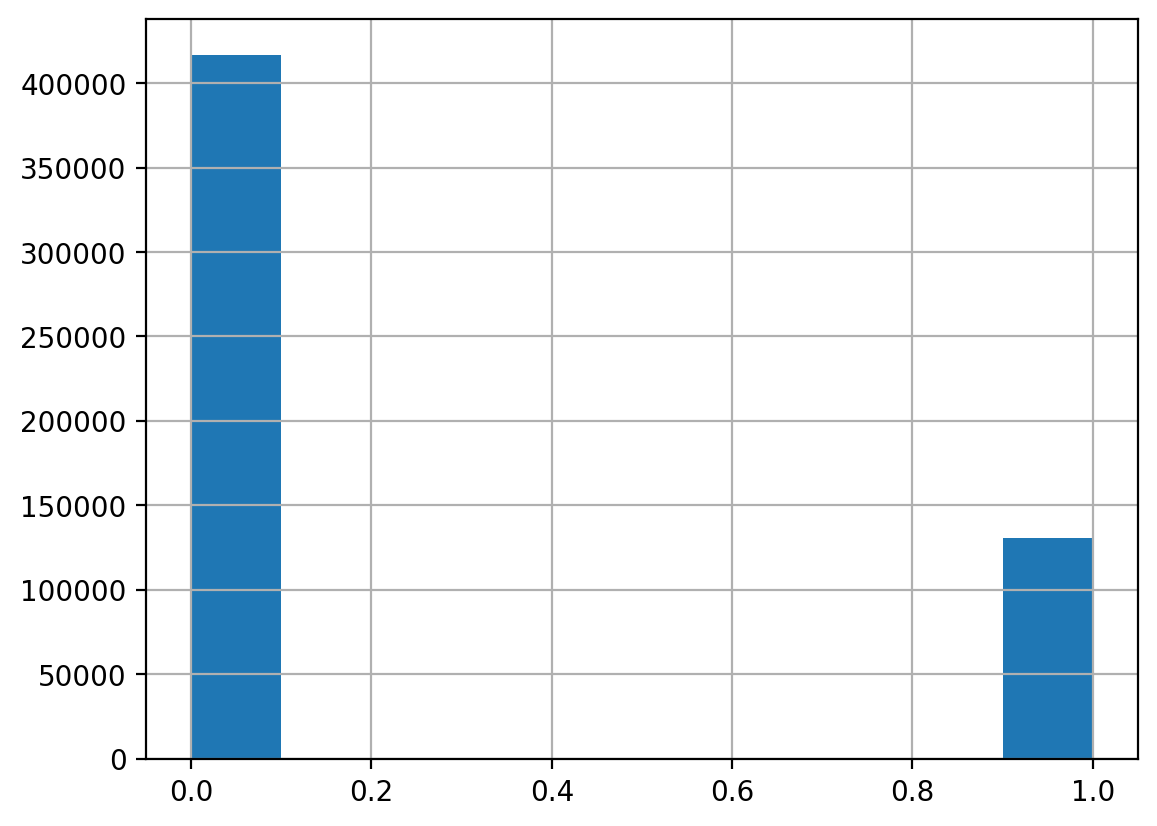

In [ ]:
df['MIS_Status'].hist()

# We consider recall for evaluating our top two models
# due to the imbalnaced target class variable MIS_Status
# showing mostly paid in full and significantly less charged off

Finding quantiles for testing different values of the top two features

Term Quantiles
 0.25    60.0
0.50    84.0
0.75    96.0
Name: Term, dtype: float64 



<Axes: >

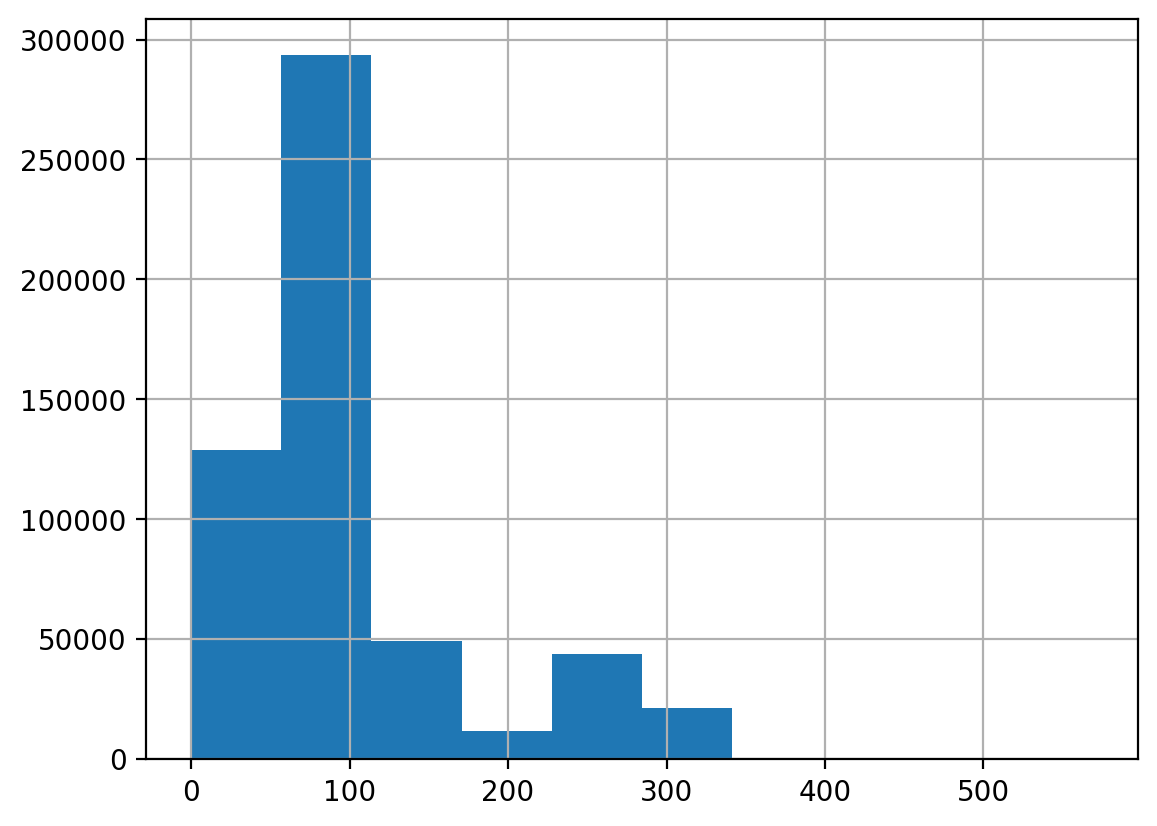

In [ ]:
print("Term Quantiles\n", df.Term.quantile([0.25,0.5,0.75]), "\n")
df['Term'].hist()

Disbursement Quantiles:
 0.25     33869.25
0.50     79162.00
0.75    200000.00
Name: DisbursementGross, dtype: float64 



<Axes: >

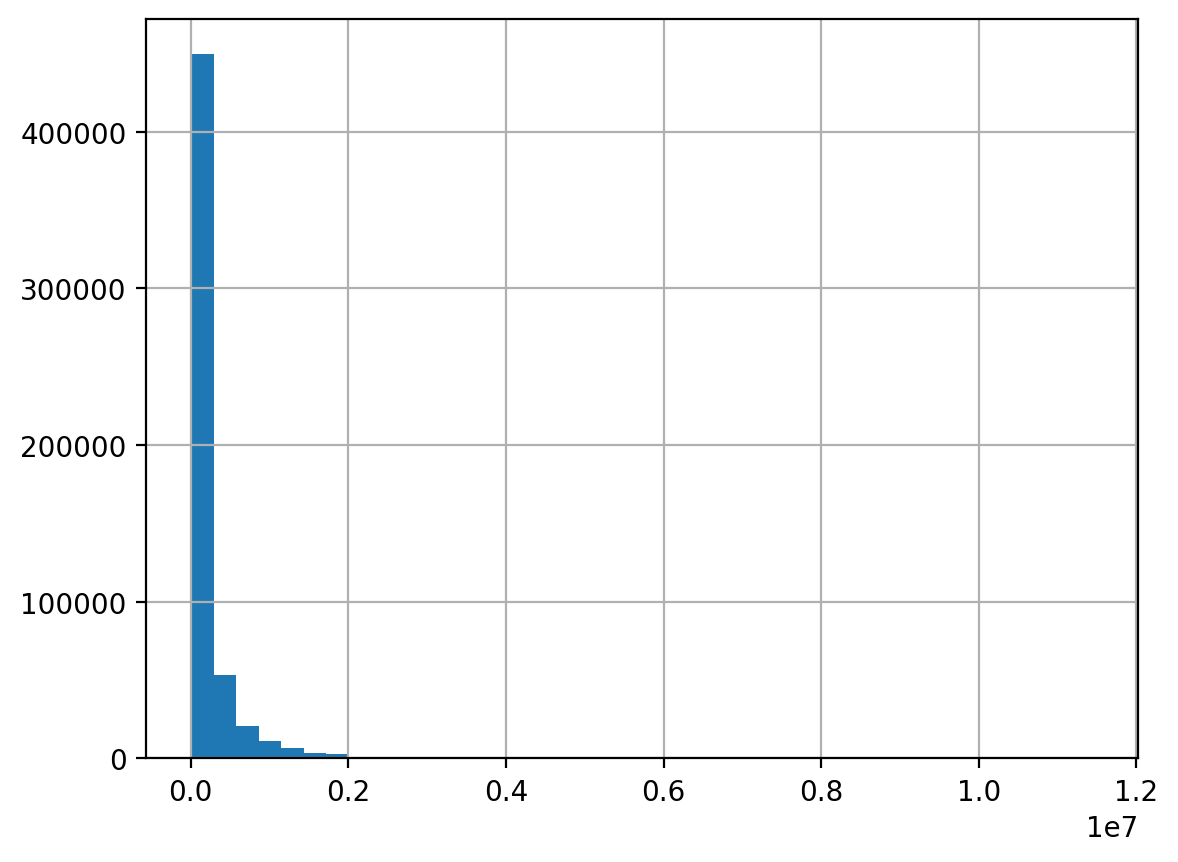

In [ ]:
print("Disbursement Quantiles:\n", df.DisbursementGross.quantile([0.25,0.5,0.75]), "\n")
df['DisbursementGross'].hist(bins=40)

## Testing Example Business Loans

### Prediction Functions

In [ ]:
# Tree plot and prediction path functions

def plot_decision_tree(model, feature_names, class_names):
    # plot_tree function contains a list of all nodes and leaves of the Decision tree
    tree = plot_tree(model, feature_names = feature_names, class_names = class_names,
                     rounded = True, proportion = True, precision = 2, filled = True, fontsize=4)
    return tree

def plot_decision_path_tree(model, X_train, class_names=None):
    fig = plt.figure(figsize=(10, 10))
    class_names = model.classes_.astype(str) if type(class_names) == type(None) else class_names
    feature_names = X_train.index if type(X_train) == type(pd.Series()) else X_train.columns

    # Getting the tree from the function programmed above
    tree = plot_decision_tree(grid_clf, list(X_train), ['Paid in Full', 'Charged Off'])

    # Get the decision path of the wanted prediction
    decision_path = model.decision_path(X_train)

    # Now remember the tree object contains all nodes and leaves so the logic here
    # is to loop into the tree and change visible attribute for components that
    # are not in the decision path
    for i in range(0,len(tree)):
        if i not in decision_path.indices:
            plt.setp(tree[i],visible=False)
    plt.show()

In [ ]:
# Predict loan with decision tree
def predict_loan(data):
  # Create a DataFrame for the prediction
  data_for_prediction = pd.DataFrame(data)
  display(data_for_prediction)

  # Predict the MIS Status and the probabilities for each class
  predicted_status = grid_clf.predict(data_for_prediction)
  predicted_probability = grid_clf.predict_proba(data_for_prediction)

  # Output the prediction and probability
  print ("Predicted MIS_Status:", predicted_status[0]) # Paid in full or charge-off
  print ("Probability of Paid in Full:", predicted_probability[0][0]) # Probability of 0 (Paid in full)
  print("Probability of Charge-off:", predicted_probability[0][1]) # Probability of 1 (Charge-off)

  plot_decision_path_tree(grid_clf, data_for_prediction, class_names=['Paid in Full', 'Charged Off'])

# Predict loan with gradient boosting
def predict_loan_gbc(data):
  # Create a DataFrame for the prediction
  data_for_prediction = pd.DataFrame(data)
  display(data_for_prediction)

  # Predict the MIS Status and the probabilities for each class
  predicted_status = gbc.predict(data_for_prediction)
  predicted_probability = gbc.predict_proba(data_for_prediction)

  # Output the prediction and probability
  print ("Predicted MIS_Status:", predicted_status[0]) # Paid in full or charge-off
  print ("Probability of Paid in Full:", predicted_probability[0][0]) # Probability of 0 (Paid in full)
  print("Probability of Charge-off:", predicted_probability[0][1]) # Probability of 1 (Charge-off)


### Decision Tree Predictions
Example small business loans testing combinations of loan term and disbursment quantile values

Term  NoEmp  CreateJob  RetainedJob  DisbursementGross  BalanceGross  \
0    60      8          2            6              34000            50   

   GrAppv  SBA_Appv  Recession  NewExist  Franchise  UrbanRural  RevLineCr  \
0   34000     33000          0         0          0           0          0   

   LowDoc  Accommodation and food services  \
0       0                                0   

   Administrative and support and waste management and remediation services  \
0                                                  0                          

   Agriculture, forestry, fishing, and hunting  \
0                                            0   

   Arts, entertainment, and recreation  Construction  Educational services  \
0                                    0             0                     0   

   Finance and insurance  Health care and social assistance  Information  \
0                      0                                  0            0   

   Management of companies and enterprises  Manufacturing  \
0                                        0              0   

   Mining, quarrying, and oil and gas extraction  Other services  \
0                                              0               0   

   Professional, scientific, and technical services  Public administration  \
0                                                 0                      0   

   Real estate and rental and leasing  Retail trade  \
0                                   0             1   

   Transportation and warehousing  Utilities  Wholesale trade  
0                               0          0                0

Predicted MIS_Status: 0
Probability of Paid in Full: 1.0
Probability of Charge-off: 0.0


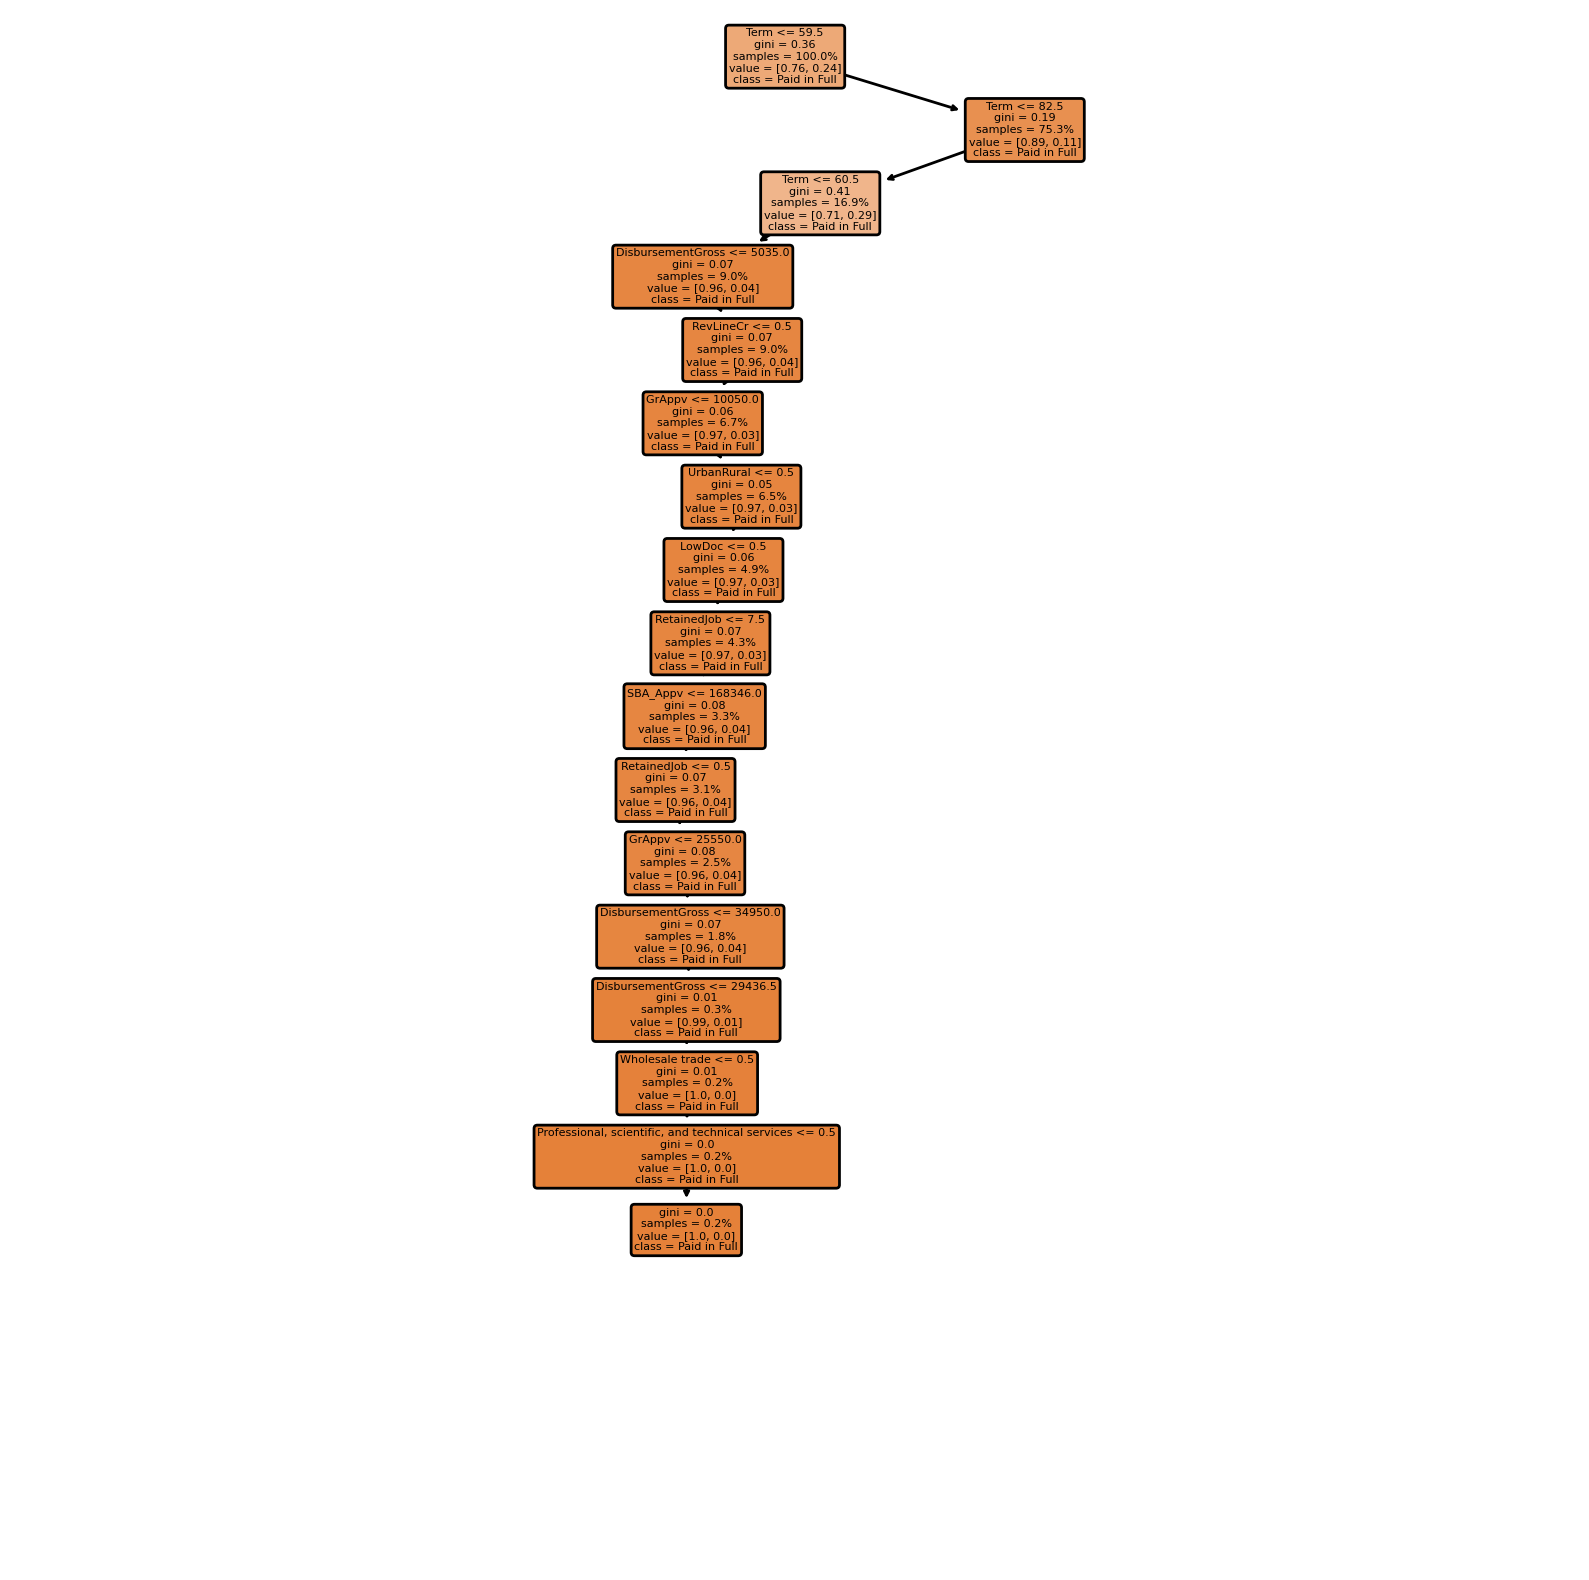

In [ ]:
# Made up Loan #1 - Small Term, Small Disbursement

loan1 = {
    'Term': [60],
    'NoEmp': [8],
    'CreateJob': [2],
    'RetainedJob': [6],
    'DisbursementGross': [34000],
    'BalanceGross': [50],
    'GrAppv': [34000],
    'SBA_Appv': [33000],
    'Recession': [0],
    'NewExist': [0],
    'Franchise': [0],
    'UrbanRural': [0],
    'RevLineCr': [0],
    'LowDoc': [0],
    'Accommodation and food services': [0],
    'Administrative and support and waste management and remediation services': [0],
    'Agriculture, forestry, fishing, and hunting': [0],
    'Arts, entertainment, and recreation': [0],
    'Construction': [0],
    'Educational services': [0],
    'Finance and insurance': [0],
    'Health care and social assistance': [0],
    'Information': [0],
    'Management of companies and enterprises': [0],
    'Manufacturing': [0],
    'Mining, quarrying, and oil and gas extraction': [0],
    'Other services': [0],
    'Professional, scientific, and technical services': [0],
    'Public administration': [0],
    'Real estate and rental and leasing': [0],
    'Retail trade': [1], # Business is in this sector
    'Transportation and warehousing': [0],
    'Utilities': [0],
    'Wholesale trade':[0]
}

predict_loan(loan1)

Term  NoEmp  CreateJob  RetainedJob  DisbursementGross  BalanceGross  \
0    60      8          2            6              80000           500   

   GrAppv  SBA_Appv  Recession  NewExist  Franchise  UrbanRural  RevLineCr  \
0   80000     70000          0         0          0           0          0   

   LowDoc  Accommodation and food services  \
0       0                                0   

   Administrative and support and waste management and remediation services  \
0                                                  0                          

   Agriculture, forestry, fishing, and hunting  \
0                                            0   

   Arts, entertainment, and recreation  Construction  Educational services  \
0                                    0             0                     0   

   Finance and insurance  Health care and social assistance  Information  \
0                      0                                  0            0   

   Management of companies and enterprises  Manufacturing  \
0                                        0              0   

   Mining, quarrying, and oil and gas extraction  Other services  \
0                                              0               0   

   Professional, scientific, and technical services  Public administration  \
0                                                 0                      0   

   Real estate and rental and leasing  Retail trade  \
0                                   0             1   

   Transportation and warehousing  Utilities  Wholesale trade  
0                               0          0                0

Predicted MIS_Status: 0
Probability of Paid in Full: 0.9720930232558139
Probability of Charge-off: 0.027906976744186046


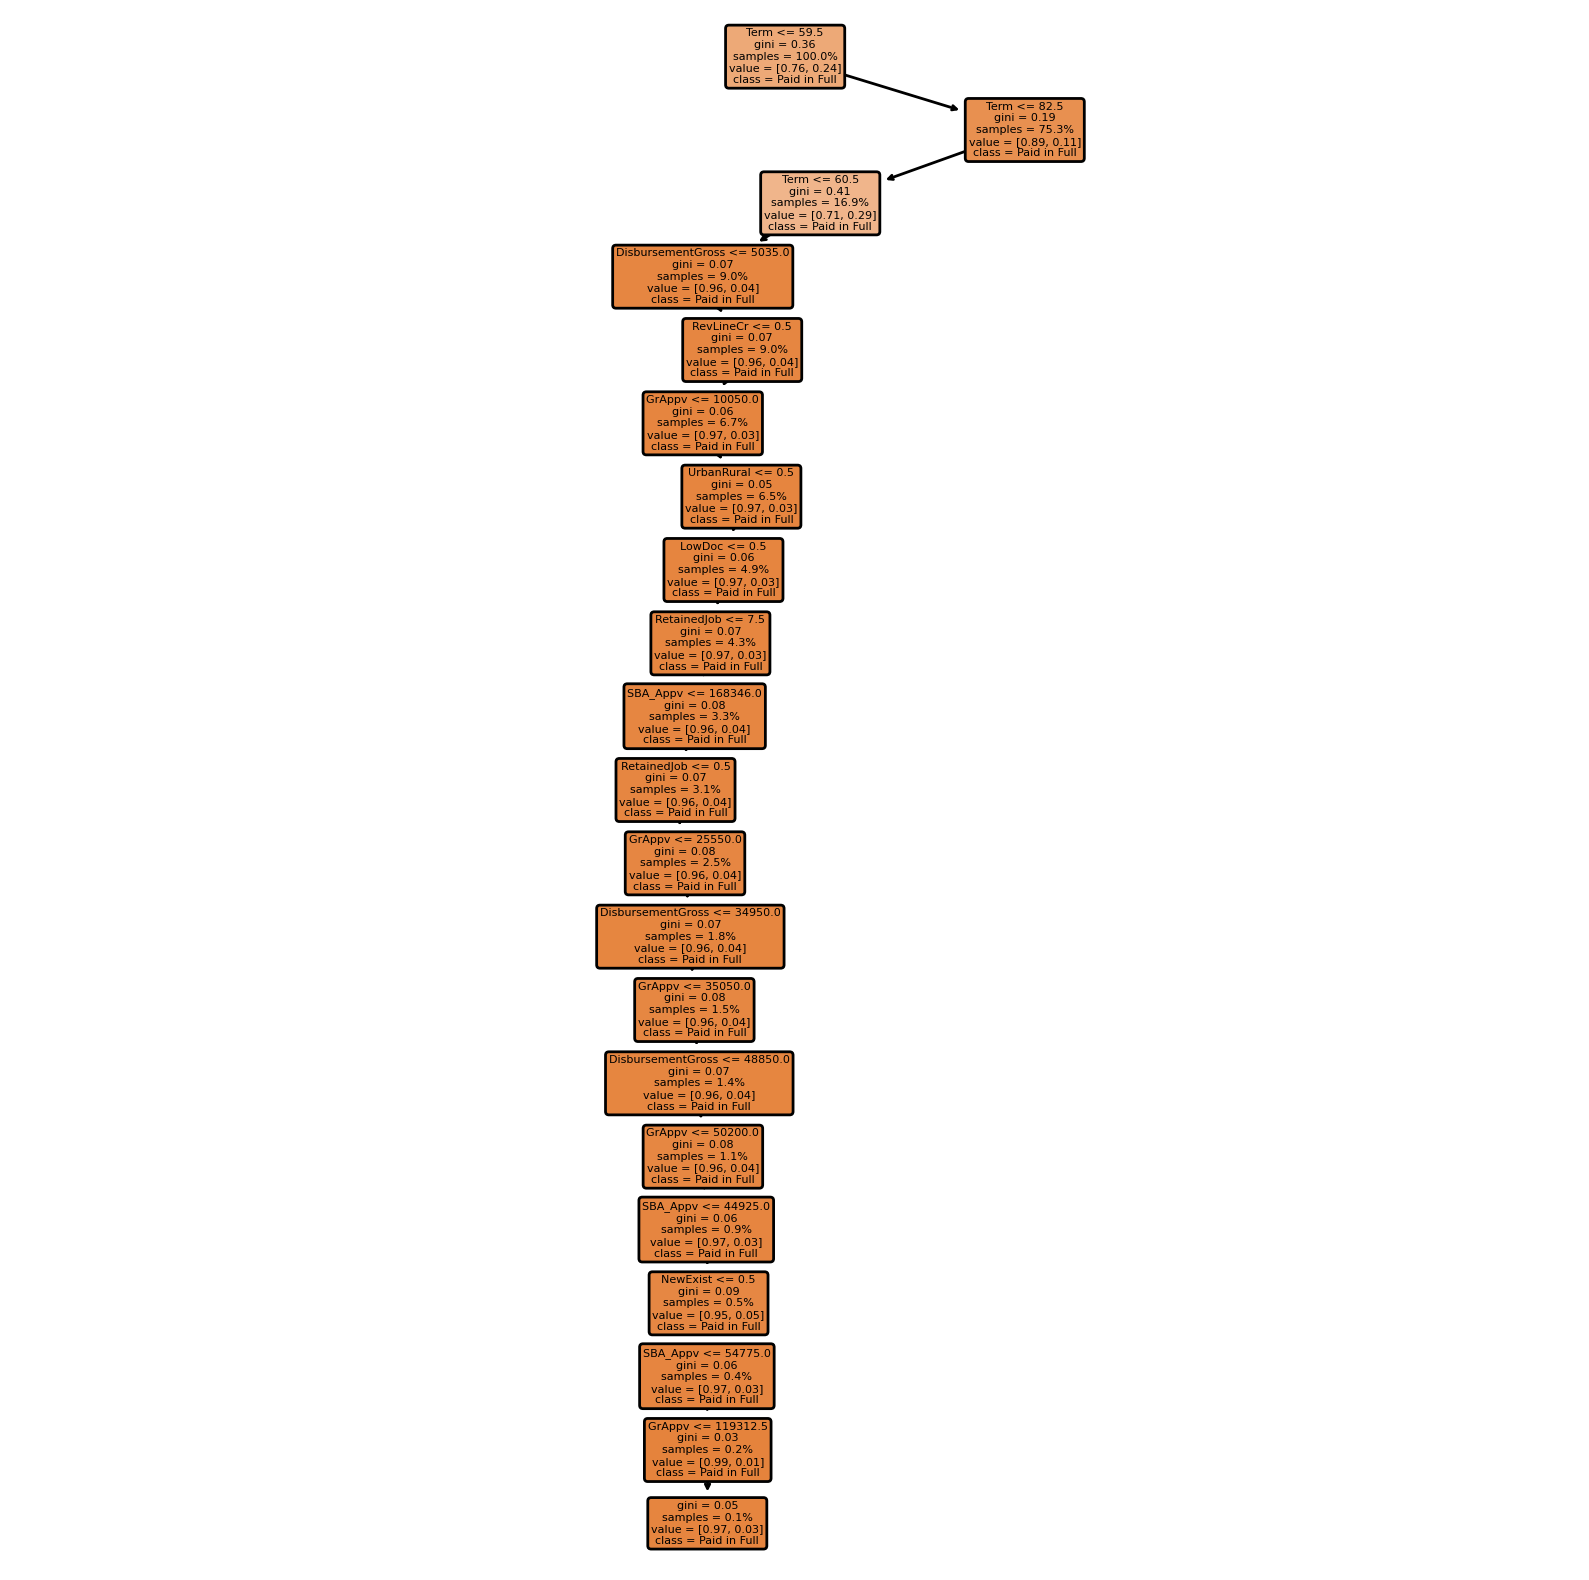

In [ ]:
# Made up Loan #2 - Small Term, Medium Disbursement

loan2 = {
    'Term': [60],
    'NoEmp': [8],
    'CreateJob': [2],
    'RetainedJob': [6],
    'DisbursementGross': [80000],
    'BalanceGross': [500],
    'GrAppv': [80000],
    'SBA_Appv': [70000],
    'Recession': [0],
    'NewExist': [0],
    'Franchise': [0],
    'UrbanRural': [0],
    'RevLineCr': [0],
    'LowDoc': [0],
    'Accommodation and food services': [0],
    'Administrative and support and waste management and remediation services': [0],
    'Agriculture, forestry, fishing, and hunting': [0],
    'Arts, entertainment, and recreation': [0],
    'Construction': [0],
    'Educational services': [0],
    'Finance and insurance': [0],
    'Health care and social assistance': [0],
    'Information': [0],
    'Management of companies and enterprises': [0],
    'Manufacturing': [0],
    'Mining, quarrying, and oil and gas extraction': [0],
    'Other services': [0],
    'Professional, scientific, and technical services': [0],
    'Public administration': [0],
    'Real estate and rental and leasing': [0],
    'Retail trade': [1], # Business is in this sector
    'Transportation and warehousing': [0],
    'Utilities': [0],
    'Wholesale trade':[0]
}

predict_loan(loan2)

Term  NoEmp  CreateJob  RetainedJob  DisbursementGross  BalanceGross  \
0    60      8          2            6             200000          5000   

   GrAppv  SBA_Appv  Recession  NewExist  Franchise  UrbanRural  RevLineCr  \
0  200000    180000          0         0          0           0          0   

   LowDoc  Accommodation and food services  \
0       0                                0   

   Administrative and support and waste management and remediation services  \
0                                                  0                          

   Agriculture, forestry, fishing, and hunting  \
0                                            0   

   Arts, entertainment, and recreation  Construction  Educational services  \
0                                    0             0                     0   

   Finance and insurance  Health care and social assistance  Information  \
0                      0                                  0            0   

   Management of companies and enterprises  Manufacturing  \
0                                        0              0   

   Mining, quarrying, and oil and gas extraction  Other services  \
0                                              0               0   

   Professional, scientific, and technical services  Public administration  \
0                                                 0                      0   

   Real estate and rental and leasing  Retail trade  \
0                                   0             1   

   Transportation and warehousing  Utilities  Wholesale trade  
0                               0          0                0

Predicted MIS_Status: 0
Probability of Paid in Full: 0.8125
Probability of Charge-off: 0.1875


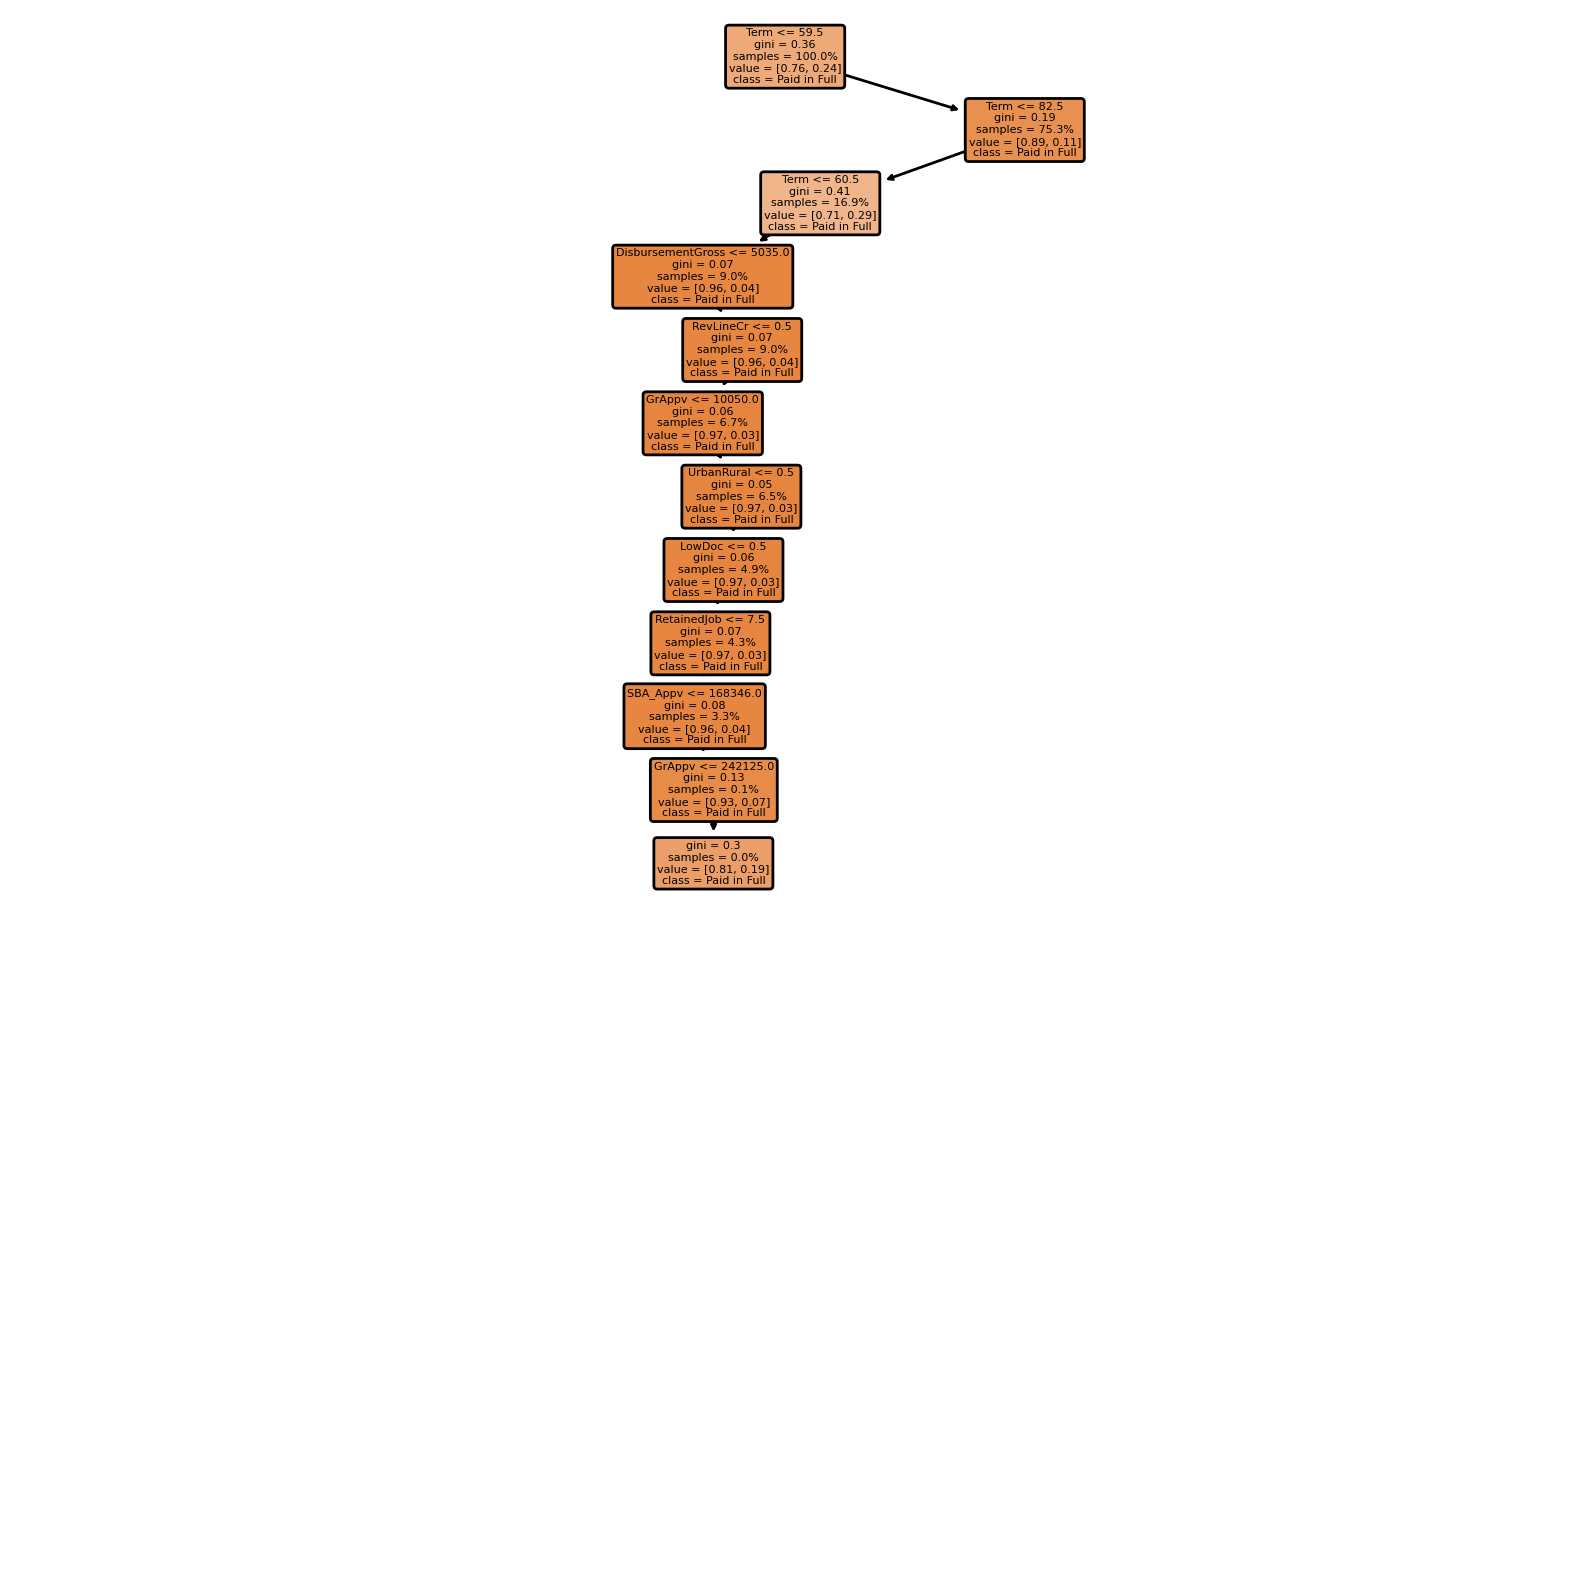

In [ ]:
# Made up Loan #3 - Small Term, Large Disbursement

loan3 = {
    'Term': [60],
    'NoEmp': [8],
    'CreateJob': [2],
    'RetainedJob': [6],
    'DisbursementGross': [200000],
    'BalanceGross': [5000],
    'GrAppv': [200000],
    'SBA_Appv': [180000],
    'Recession': [0],
    'NewExist': [0],
    'Franchise': [0],
    'UrbanRural': [0],
    'RevLineCr': [0],
    'LowDoc': [0],
    'Accommodation and food services': [0],
    'Administrative and support and waste management and remediation services': [0],
    'Agriculture, forestry, fishing, and hunting': [0],
    'Arts, entertainment, and recreation': [0],
    'Construction': [0],
    'Educational services': [0],
    'Finance and insurance': [0],
    'Health care and social assistance': [0],
    'Information': [0],
    'Management of companies and enterprises': [0],
    'Manufacturing': [0],
    'Mining, quarrying, and oil and gas extraction': [0],
    'Other services': [0],
    'Professional, scientific, and technical services': [0],
    'Public administration': [0],
    'Real estate and rental and leasing': [0],
    'Retail trade': [1], # Business is in this sector
    'Transportation and warehousing': [0],
    'Utilities': [0],
    'Wholesale trade':[0]
}

predict_loan(loan3)

Term  NoEmp  CreateJob  RetainedJob  DisbursementGross  BalanceGross  \
0    85      8          2            6              34000            50   

   GrAppv  SBA_Appv  Recession  NewExist  Franchise  UrbanRural  RevLineCr  \
0   34000     33000          0         0          0           0          0   

   LowDoc  Accommodation and food services  \
0       0                                0   

   Administrative and support and waste management and remediation services  \
0                                                  0                          

   Agriculture, forestry, fishing, and hunting  \
0                                            0   

   Arts, entertainment, and recreation  Construction  Educational services  \
0                                    0             0                     0   

   Finance and insurance  Health care and social assistance  Information  \
0                      0                                  0            0   

   Management of companies and enterprises  Manufacturing  \
0                                        0              0   

   Mining, quarrying, and oil and gas extraction  Other services  \
0                                              0               0   

   Professional, scientific, and technical services  Public administration  \
0                                                 0                      0   

   Real estate and rental and leasing  Retail trade  \
0                                   0             1   

   Transportation and warehousing  Utilities  Wholesale trade  
0                               0          0                0

Predicted MIS_Status: 0
Probability of Paid in Full: 0.8076923076923077
Probability of Charge-off: 0.19230769230769232


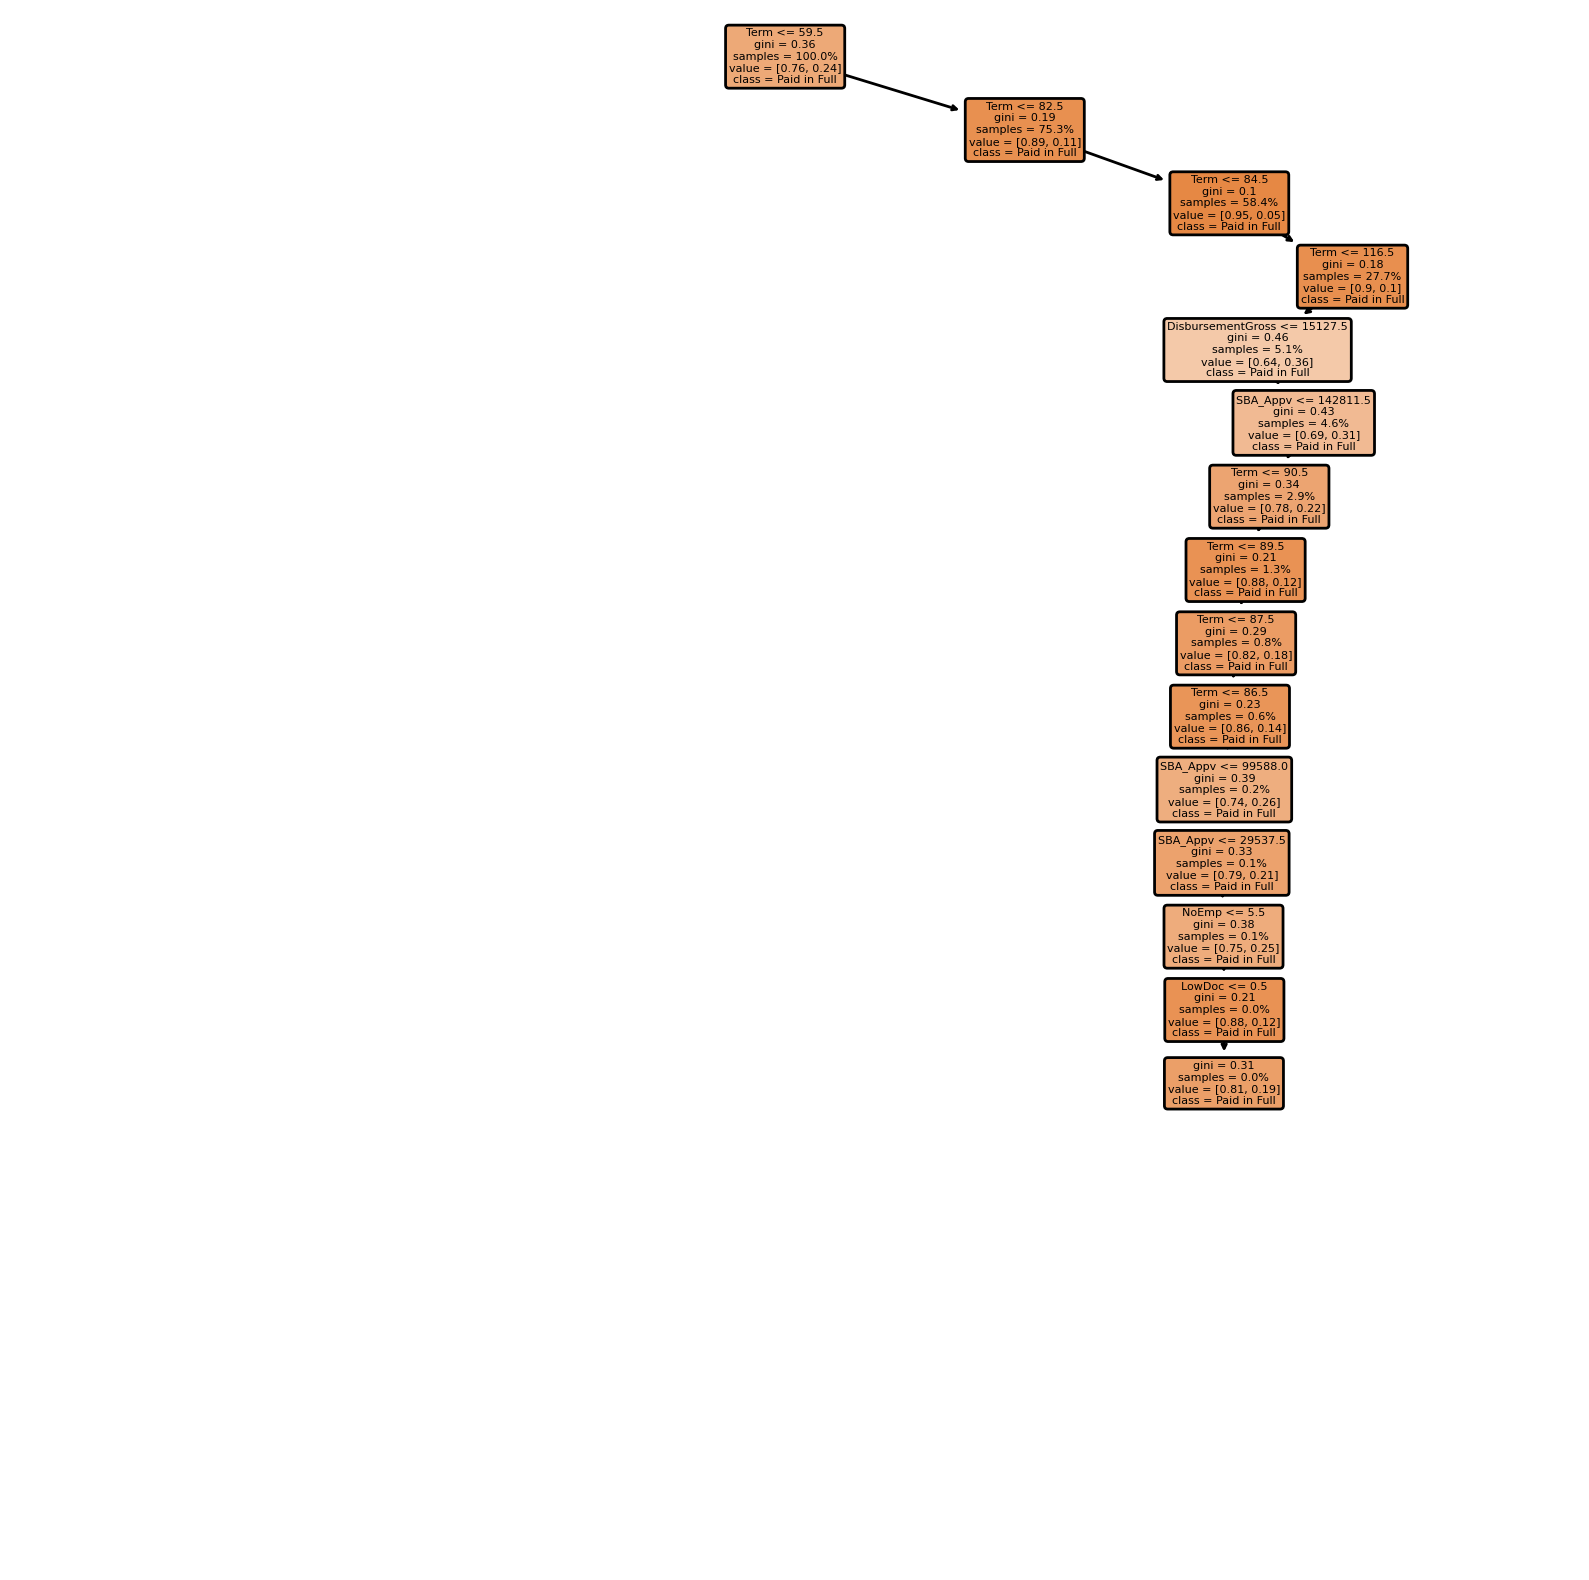

In [ ]:
# Made up Loan #4 - Medium Term, Small Disbursement

loan4 = {
    'Term': [85],
    'NoEmp': [8],
    'CreateJob': [2],
    'RetainedJob': [6],
    'DisbursementGross': [34000],
    'BalanceGross': [50],
    'GrAppv': [34000],
    'SBA_Appv': [33000],
    'Recession': [0],
    'NewExist': [0],
    'Franchise': [0],
    'UrbanRural': [0],
    'RevLineCr': [0],
    'LowDoc': [0],
    'Accommodation and food services': [0],
    'Administrative and support and waste management and remediation services': [0],
    'Agriculture, forestry, fishing, and hunting': [0],
    'Arts, entertainment, and recreation': [0],
    'Construction': [0],
    'Educational services': [0],
    'Finance and insurance': [0],
    'Health care and social assistance': [0],
    'Information': [0],
    'Management of companies and enterprises': [0],
    'Manufacturing': [0],
    'Mining, quarrying, and oil and gas extraction': [0],
    'Other services': [0],
    'Professional, scientific, and technical services': [0],
    'Public administration': [0],
    'Real estate and rental and leasing': [0],
    'Retail trade': [1], # Business is in this sector
    'Transportation and warehousing': [0],
    'Utilities': [0],
    'Wholesale trade':[0]
}

predict_loan(loan4)

Term  NoEmp  CreateJob  RetainedJob  DisbursementGross  BalanceGross  \
0    85      8          2            6              80000           500   

   GrAppv  SBA_Appv  Recession  NewExist  Franchise  UrbanRural  RevLineCr  \
0   80000     70000          0         0          0           0          0   

   LowDoc  Accommodation and food services  \
0       0                                0   

   Administrative and support and waste management and remediation services  \
0                                                  0                          

   Agriculture, forestry, fishing, and hunting  \
0                                            0   

   Arts, entertainment, and recreation  Construction  Educational services  \
0                                    0             0                     0   

   Finance and insurance  Health care and social assistance  Information  \
0                      0                                  0            0   

   Management of companies and enterprises  Manufacturing  \
0                                        0              0   

   Mining, quarrying, and oil and gas extraction  Other services  \
0                                              0               0   

   Professional, scientific, and technical services  Public administration  \
0                                                 0                      0   

   Real estate and rental and leasing  Retail trade  \
0                                   0             1   

   Transportation and warehousing  Utilities  Wholesale trade  
0                               0          0                0

Predicted MIS_Status: 0
Probability of Paid in Full: 0.8076923076923077
Probability of Charge-off: 0.19230769230769232


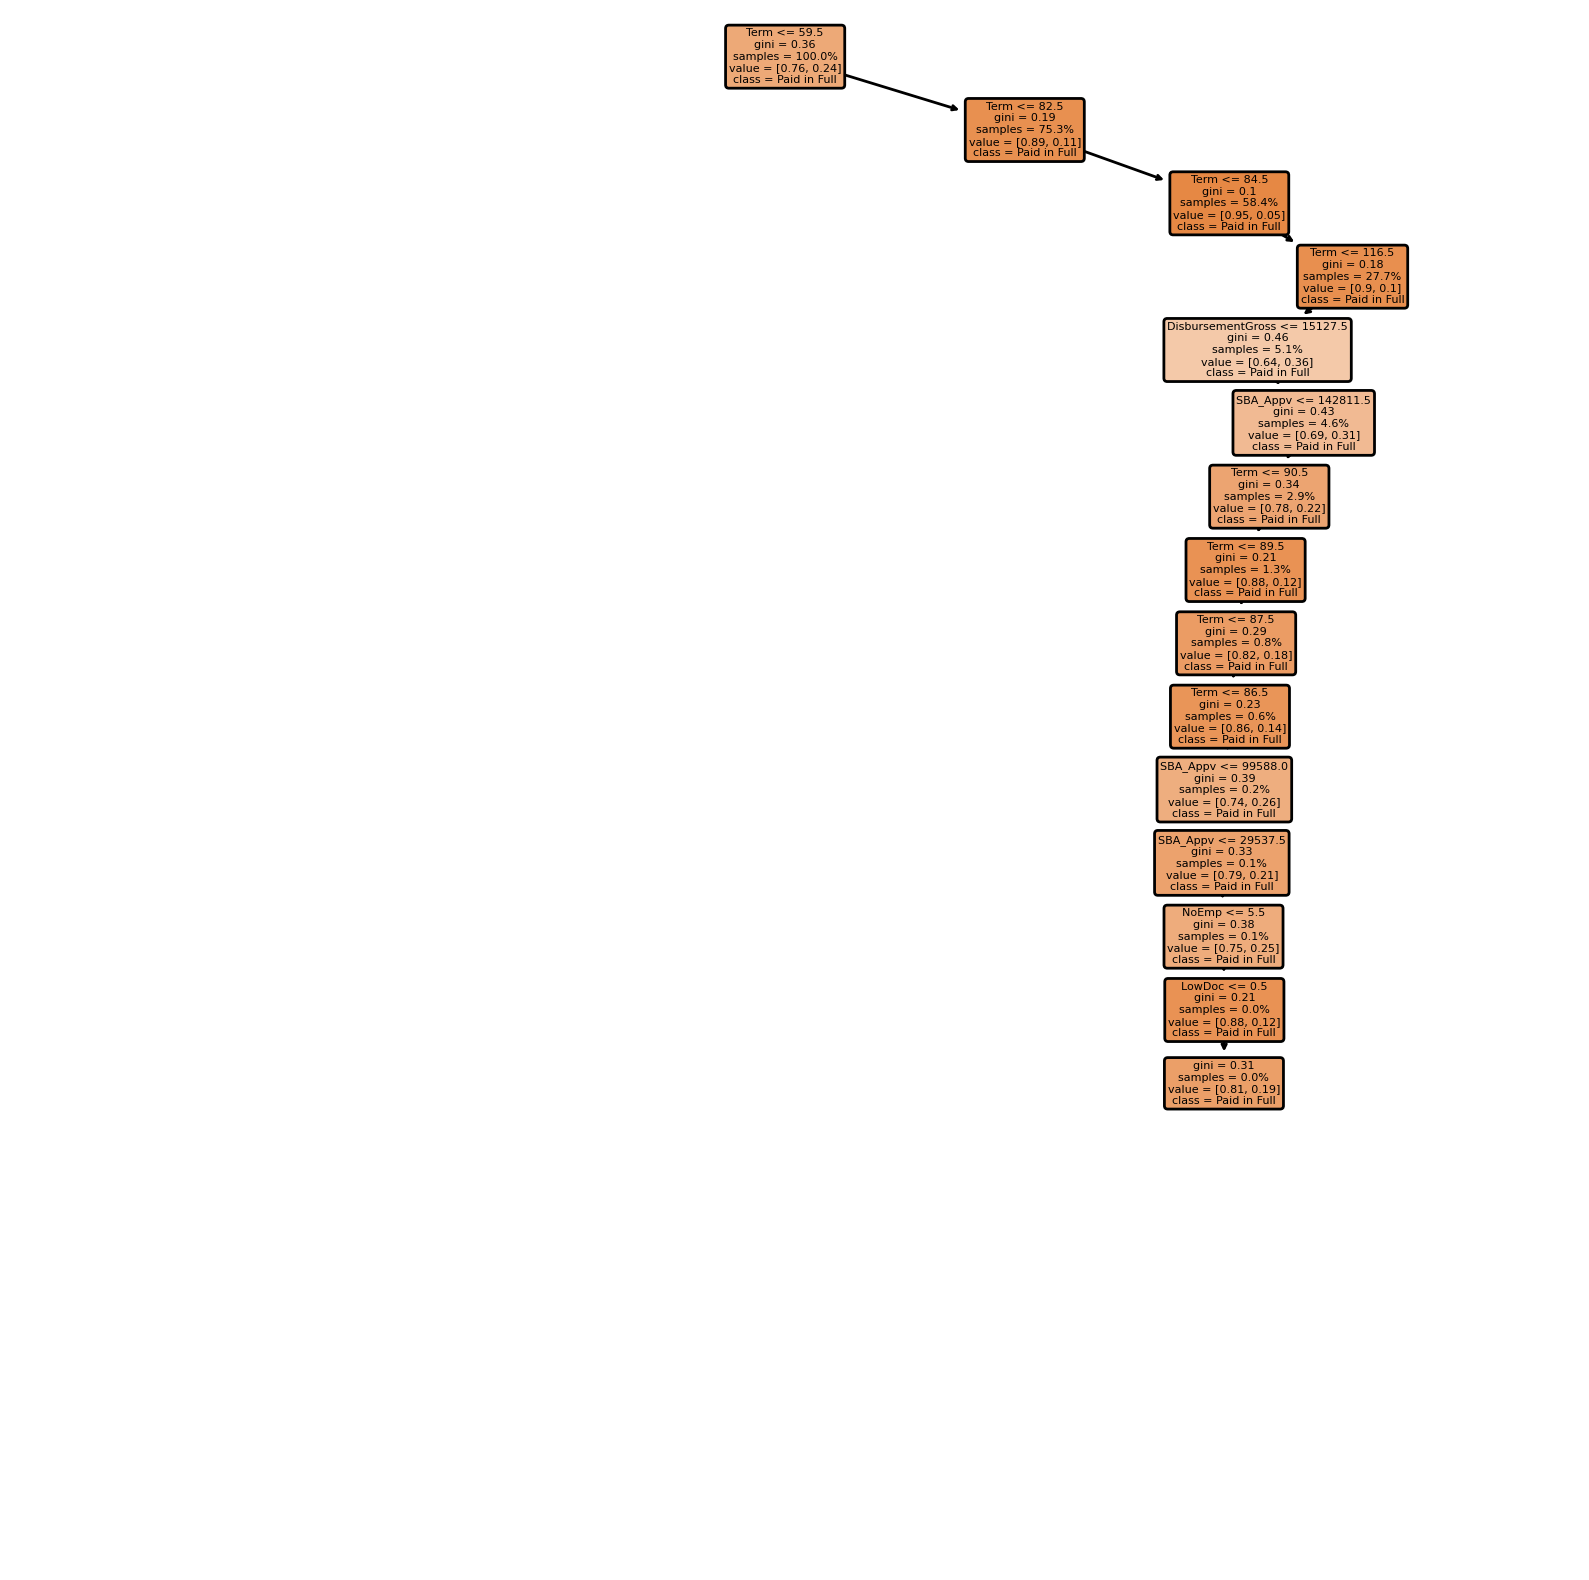

In [ ]:
# Made up Loan #5 - Medium Term, Medium Disbursement

loan5 = {
    'Term': [85],
    'NoEmp': [8],
    'CreateJob': [2],
    'RetainedJob': [6],
    'DisbursementGross': [80000],
    'BalanceGross': [500],
    'GrAppv': [80000],
    'SBA_Appv': [70000],
    'Recession': [0],
    'NewExist': [0],
    'Franchise': [0],
    'UrbanRural': [0],
    'RevLineCr': [0],
    'LowDoc': [0],
    'Accommodation and food services': [0],
    'Administrative and support and waste management and remediation services': [0],
    'Agriculture, forestry, fishing, and hunting': [0],
    'Arts, entertainment, and recreation': [0],
    'Construction': [0],
    'Educational services': [0],
    'Finance and insurance': [0],
    'Health care and social assistance': [0],
    'Information': [0],
    'Management of companies and enterprises': [0],
    'Manufacturing': [0],
    'Mining, quarrying, and oil and gas extraction': [0],
    'Other services': [0],
    'Professional, scientific, and technical services': [0],
    'Public administration': [0],
    'Real estate and rental and leasing': [0],
    'Retail trade': [1], # Business is in this sector
    'Transportation and warehousing': [0],
    'Utilities': [0],
    'Wholesale trade':[0]
}

predict_loan(loan5)

Term  NoEmp  CreateJob  RetainedJob  DisbursementGross  BalanceGross  \
0    85      8          2            6             200000          5000   

   GrAppv  SBA_Appv  Recession  NewExist  Franchise  UrbanRural  RevLineCr  \
0  200000    180000          0         0          0           0          0   

   LowDoc  Accommodation and food services  \
0       0                                0   

   Administrative and support and waste management and remediation services  \
0                                                  0                          

   Agriculture, forestry, fishing, and hunting  \
0                                            0   

   Arts, entertainment, and recreation  Construction  Educational services  \
0                                    0             0                     0   

   Finance and insurance  Health care and social assistance  Information  \
0                      0                                  0            0   

   Management of companies and enterprises  Manufacturing  \
0                                        0              0   

   Mining, quarrying, and oil and gas extraction  Other services  \
0                                              0               0   

   Professional, scientific, and technical services  Public administration  \
0                                                 0                      0   

   Real estate and rental and leasing  Retail trade  \
0                                   0             1   

   Transportation and warehousing  Utilities  Wholesale trade  
0                               0          0                0

Predicted MIS_Status: 1
Probability of Paid in Full: 0.24242424242424243
Probability of Charge-off: 0.7575757575757576


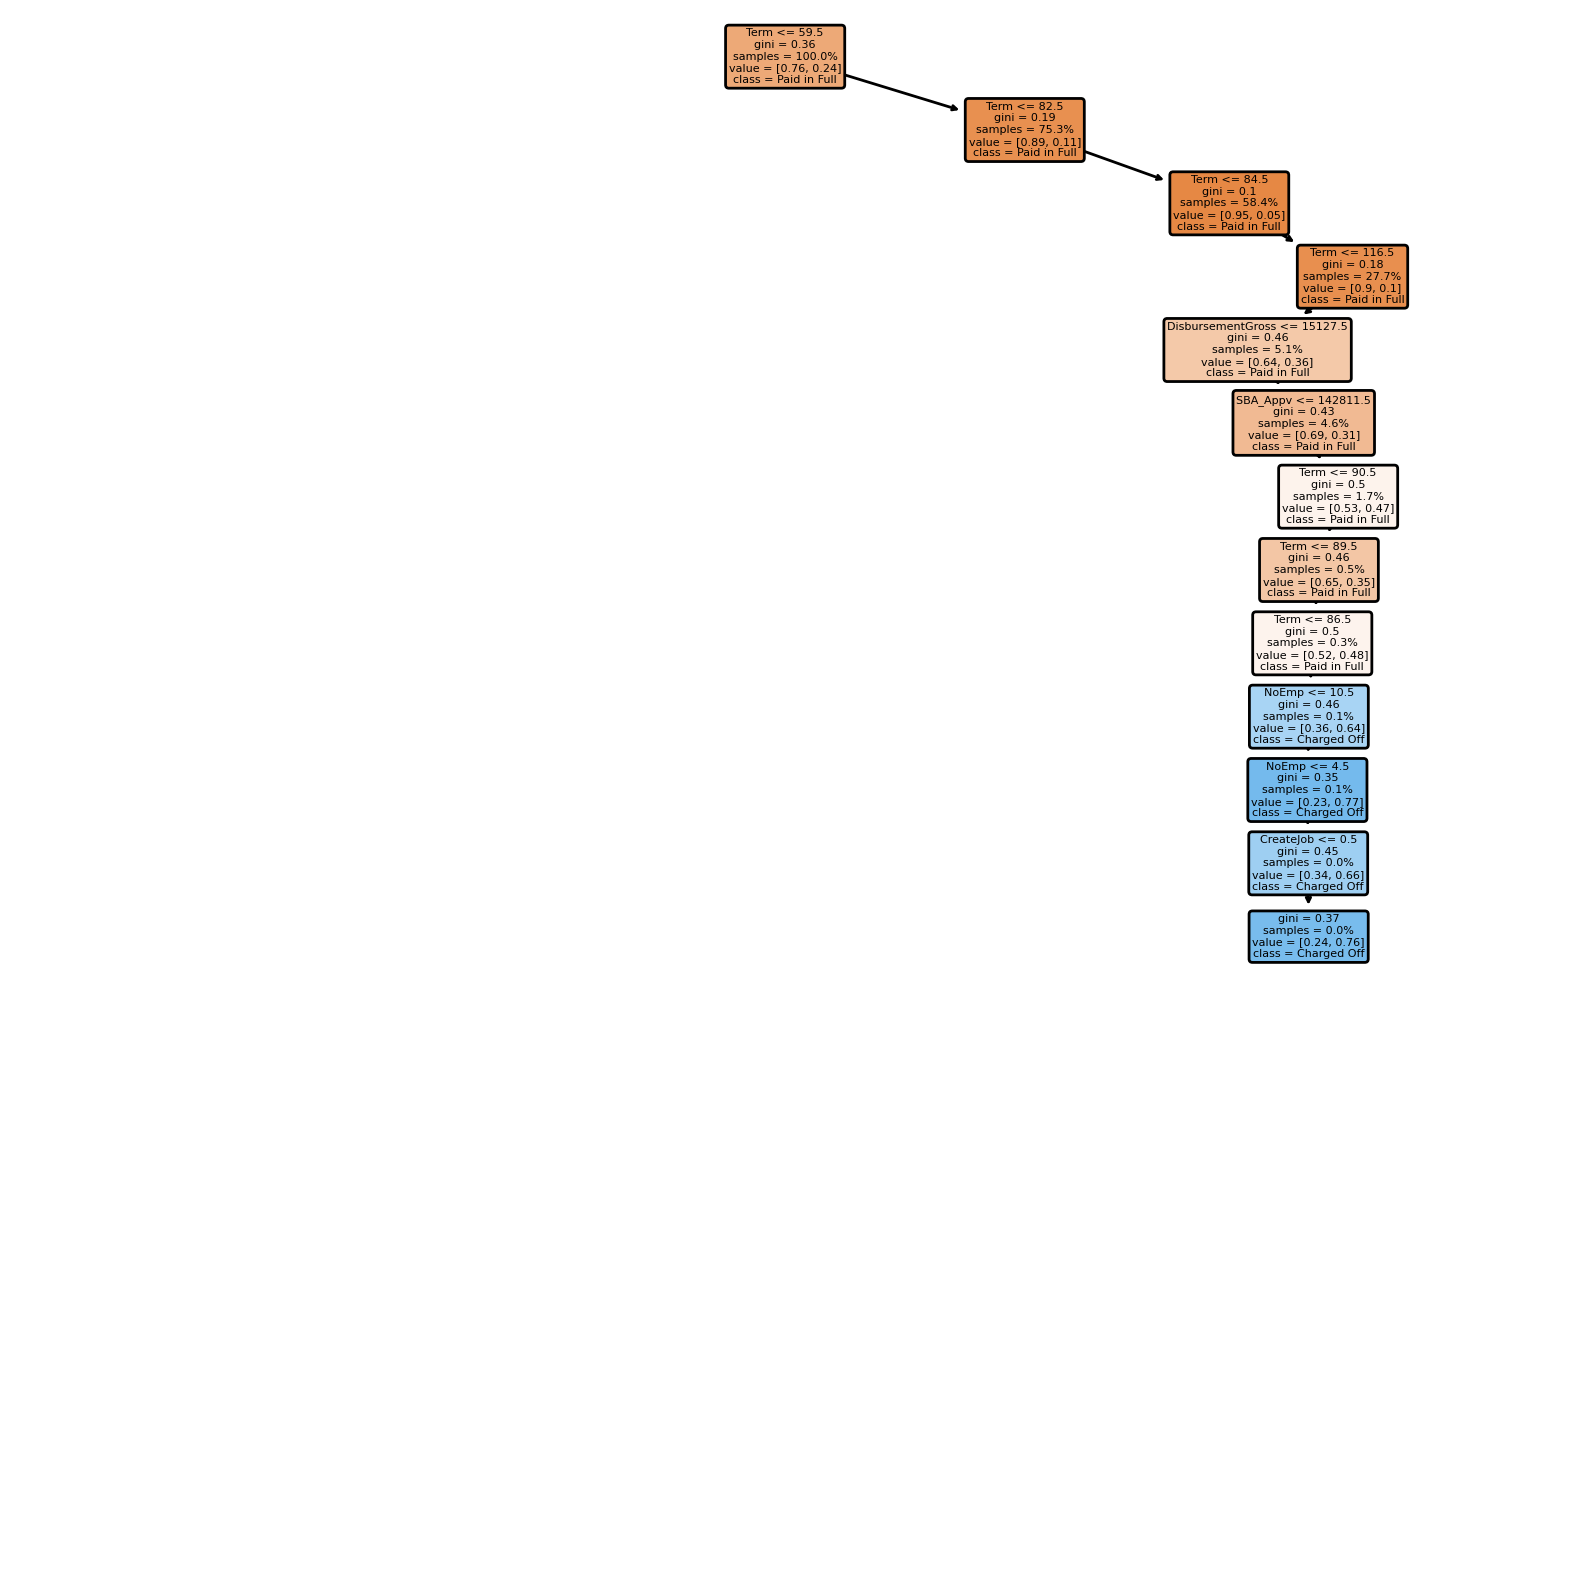

In [ ]:
# Made up Loan #6 - Medium Term, Large Disbursement

loan6 = {
    'Term': [85],
    'NoEmp': [8],
    'CreateJob': [2],
    'RetainedJob': [6],
    'DisbursementGross': [200000],
    'BalanceGross': [5000],
    'GrAppv': [200000],
    'SBA_Appv': [180000],
    'Recession': [0],
    'NewExist': [0],
    'Franchise': [0],
    'UrbanRural': [0],
    'RevLineCr': [0],
    'LowDoc': [0],
    'Accommodation and food services': [0],
    'Administrative and support and waste management and remediation services': [0],
    'Agriculture, forestry, fishing, and hunting': [0],
    'Arts, entertainment, and recreation': [0],
    'Construction': [0],
    'Educational services': [0],
    'Finance and insurance': [0],
    'Health care and social assistance': [0],
    'Information': [0],
    'Management of companies and enterprises': [0],
    'Manufacturing': [0],
    'Mining, quarrying, and oil and gas extraction': [0],
    'Other services': [0],
    'Professional, scientific, and technical services': [0],
    'Public administration': [0],
    'Real estate and rental and leasing': [0],
    'Retail trade': [1], # Business is in this sector
    'Transportation and warehousing': [0],
    'Utilities': [0],
    'Wholesale trade':[0]
}

predict_loan(loan6)

Term  NoEmp  CreateJob  RetainedJob  DisbursementGross  BalanceGross  \
0   100      8          2            6              34000             5   

   GrAppv  SBA_Appv  Recession  NewExist  Franchise  UrbanRural  RevLineCr  \
0   34000     30000          0         0          0           0          0   

   LowDoc  Accommodation and food services  \
0       0                                0   

   Administrative and support and waste management and remediation services  \
0                                                  0                          

   Agriculture, forestry, fishing, and hunting  \
0                                            0   

   Arts, entertainment, and recreation  Construction  Educational services  \
0                                    0             0                     0   

   Finance and insurance  Health care and social assistance  Information  \
0                      0                                  0            0   

   Management of companies and enterprises  Manufacturing  \
0                                        0              0   

   Mining, quarrying, and oil and gas extraction  Other services  \
0                                              0               0   

   Professional, scientific, and technical services  Public administration  \
0                                                 0                      0   

   Real estate and rental and leasing  Retail trade  \
0                                   0             1   

   Transportation and warehousing  Utilities  Wholesale trade  
0                               0          0                0

Predicted MIS_Status: 0
Probability of Paid in Full: 0.53125
Probability of Charge-off: 0.46875


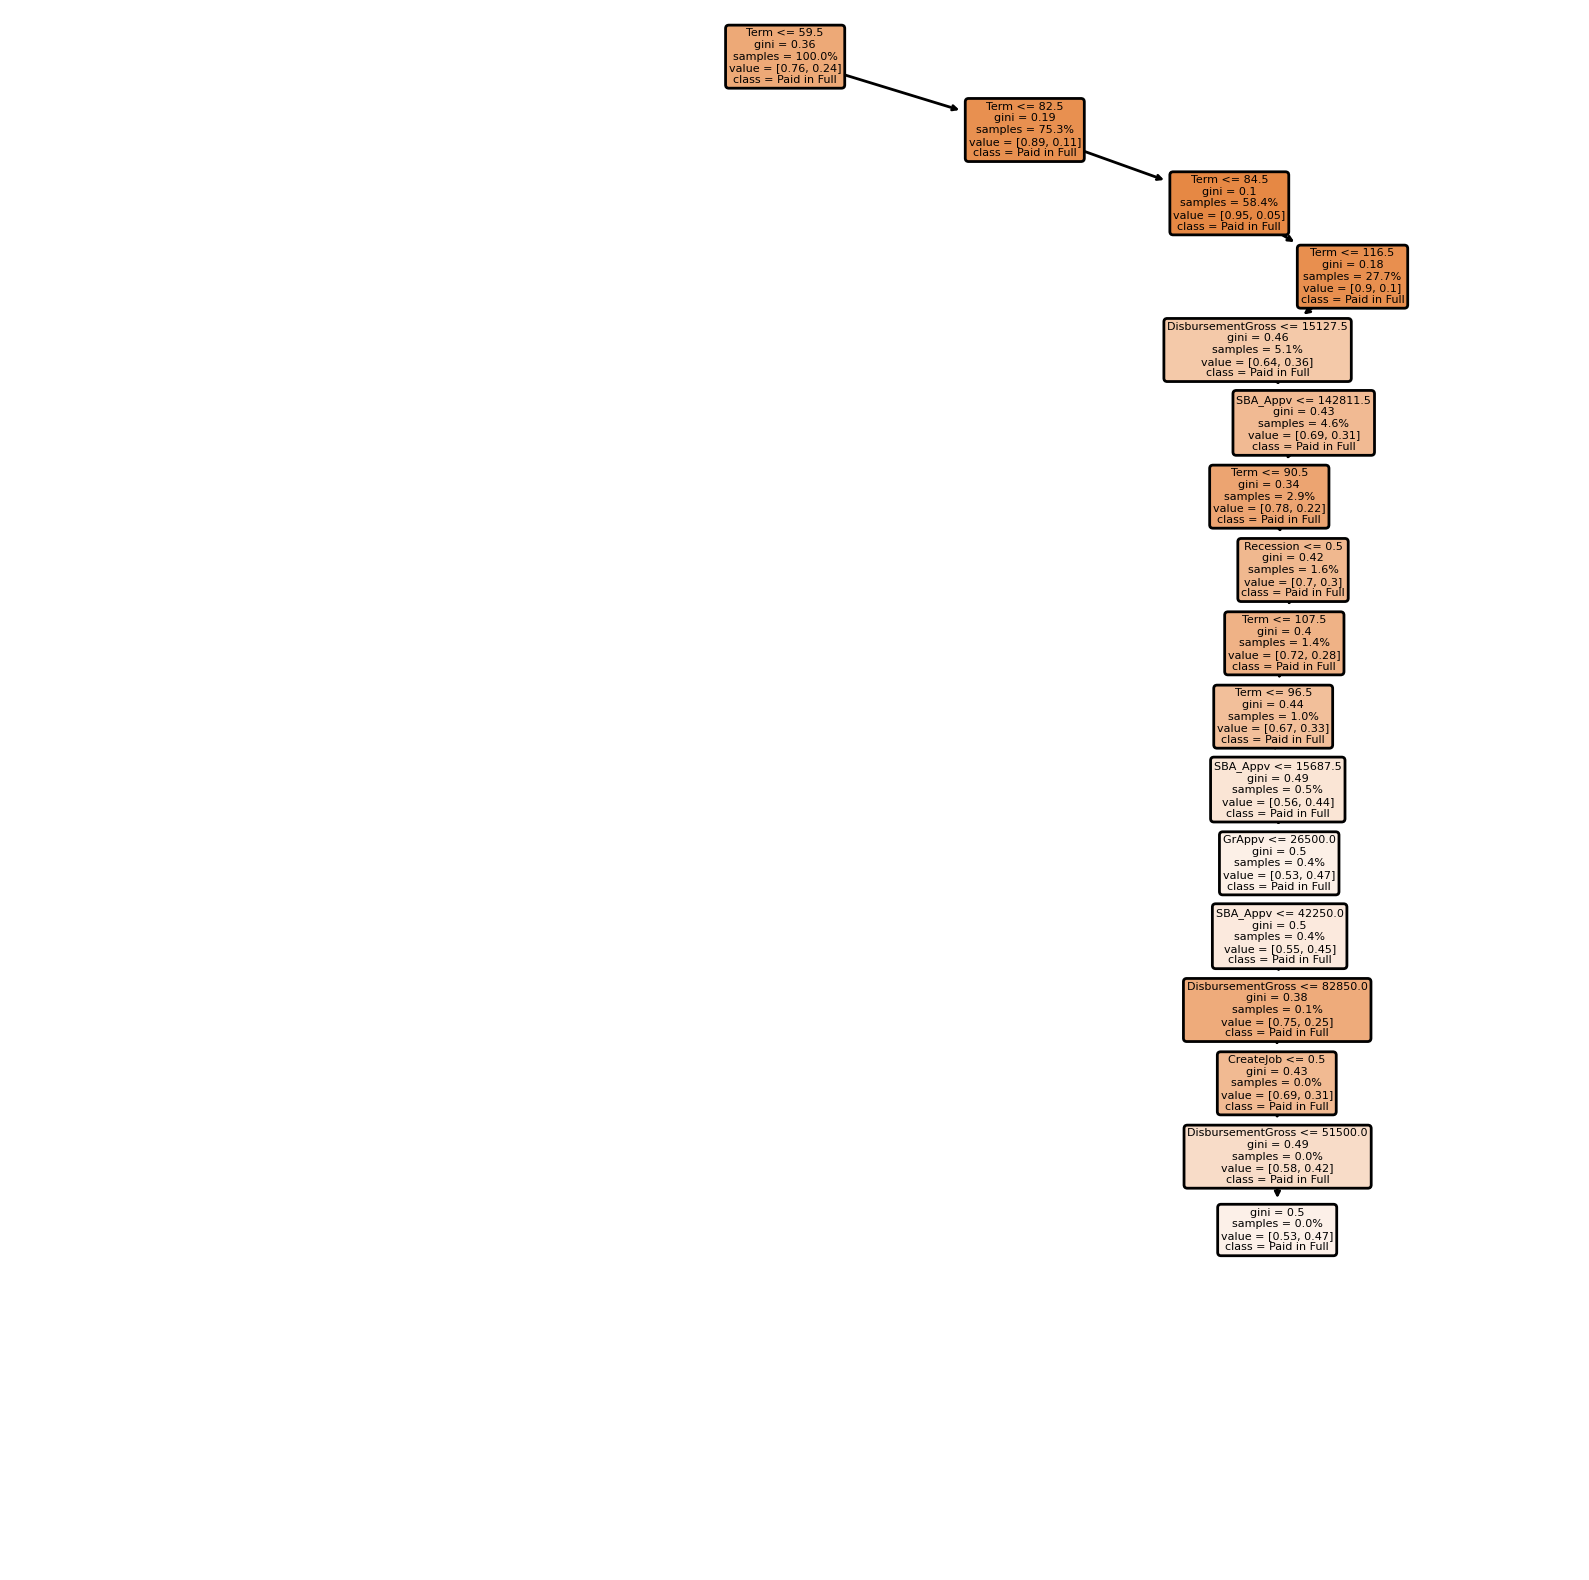

In [ ]:
# Made up Loan #7 - Large Term, Small Disbursement

loan7 = {
    'Term': [100],
    'NoEmp': [8],
    'CreateJob': [2],
    'RetainedJob': [6],
    'DisbursementGross': [34000],
    'BalanceGross': [5],
    'GrAppv': [34000],
    'SBA_Appv': [30000],
    'Recession': [0],
    'NewExist': [0],
    'Franchise': [0],
    'UrbanRural': [0],
    'RevLineCr': [0],
    'LowDoc': [0],
    'Accommodation and food services': [0],
    'Administrative and support and waste management and remediation services': [0],
    'Agriculture, forestry, fishing, and hunting': [0],
    'Arts, entertainment, and recreation': [0],
    'Construction': [0],
    'Educational services': [0],
    'Finance and insurance': [0],
    'Health care and social assistance': [0],
    'Information': [0],
    'Management of companies and enterprises': [0],
    'Manufacturing': [0],
    'Mining, quarrying, and oil and gas extraction': [0],
    'Other services': [0],
    'Professional, scientific, and technical services': [0],
    'Public administration': [0],
    'Real estate and rental and leasing': [0],
    'Retail trade': [1], # Business is in this sector
    'Transportation and warehousing': [0],
    'Utilities': [0],
    'Wholesale trade':[0]
}
predict_loan(loan7)

Term  NoEmp  CreateJob  RetainedJob  DisbursementGross  BalanceGross  \
0   100      8          2            6              80000           500   

   GrAppv  SBA_Appv  Recession  NewExist  Franchise  UrbanRural  RevLineCr  \
0   80000     70000          0         0          0           0          0   

   LowDoc  Accommodation and food services  \
0       0                                0   

   Administrative and support and waste management and remediation services  \
0                                                  0                          

   Agriculture, forestry, fishing, and hunting  \
0                                            0   

   Arts, entertainment, and recreation  Construction  Educational services  \
0                                    0             0                     0   

   Finance and insurance  Health care and social assistance  Information  \
0                      0                                  0            0   

   Management of companies and enterprises  Manufacturing  \
0                                        0              0   

   Mining, quarrying, and oil and gas extraction  Other services  \
0                                              0               0   

   Professional, scientific, and technical services  Public administration  \
0                                                 0                      0   

   Real estate and rental and leasing  Retail trade  \
0                                   0             1   

   Transportation and warehousing  Utilities  Wholesale trade  
0                               0          0                0

Predicted MIS_Status: 1
Probability of Paid in Full: 0.45588235294117646
Probability of Charge-off: 0.5441176470588235


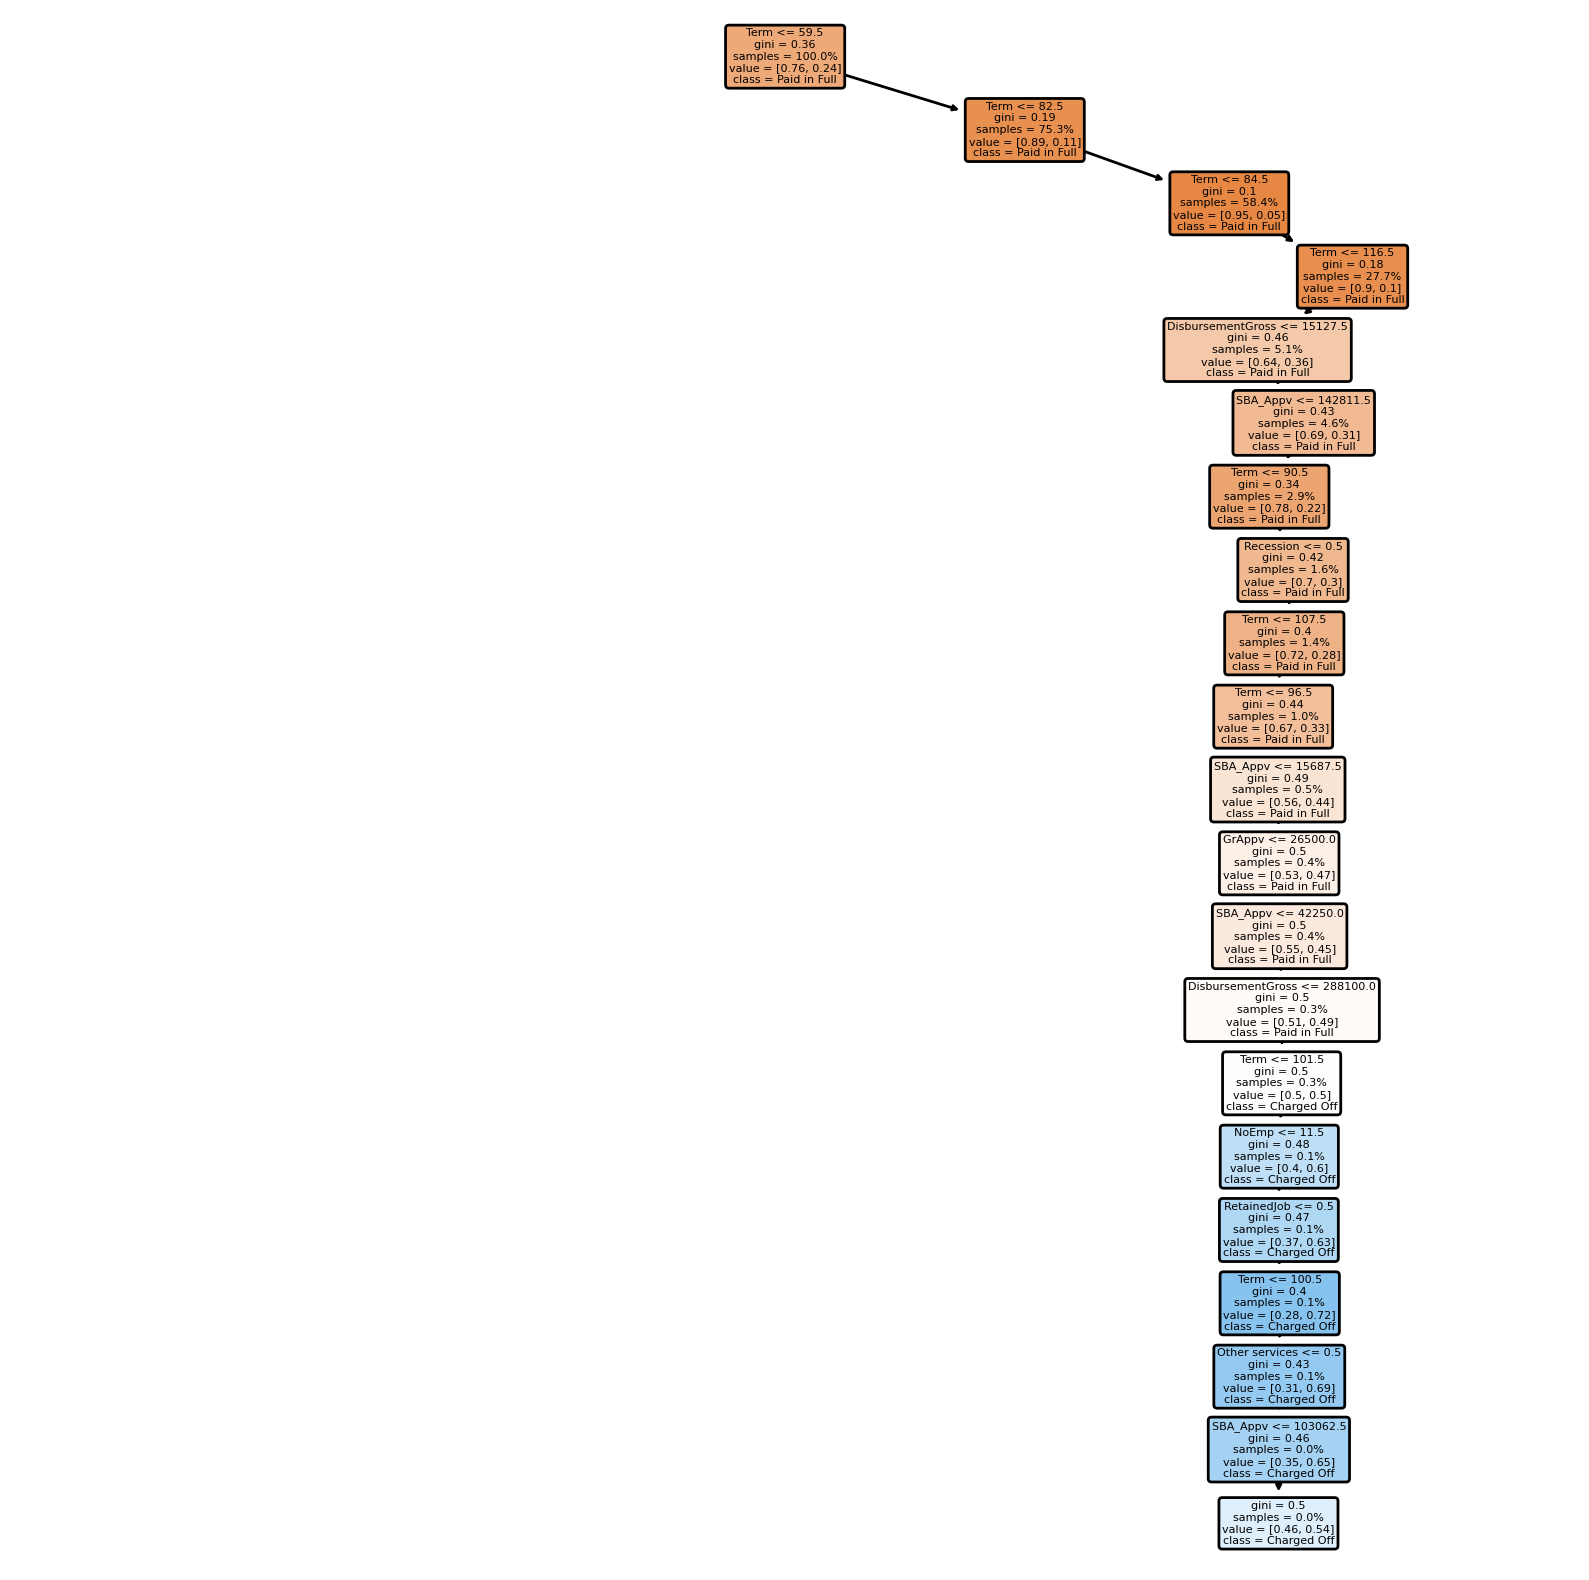

In [ ]:
# Made up Loan #8 - Large Term, Medium Disbursement

loan8 = {
    'Term': [100],
    'NoEmp': [8],
    'CreateJob': [2],
    'RetainedJob': [6],
    'DisbursementGross': [80000],
    'BalanceGross': [500],
    'GrAppv': [80000],
    'SBA_Appv': [70000],
    'Recession': [0],
    'NewExist': [0],
    'Franchise': [0],
    'UrbanRural': [0],
    'RevLineCr': [0],
    'LowDoc': [0],
    'Accommodation and food services': [0],
    'Administrative and support and waste management and remediation services': [0],
    'Agriculture, forestry, fishing, and hunting': [0],
    'Arts, entertainment, and recreation': [0],
    'Construction': [0],
    'Educational services': [0],
    'Finance and insurance': [0],
    'Health care and social assistance': [0],
    'Information': [0],
    'Management of companies and enterprises': [0],
    'Manufacturing': [0],
    'Mining, quarrying, and oil and gas extraction': [0],
    'Other services': [0],
    'Professional, scientific, and technical services': [0],
    'Public administration': [0],
    'Real estate and rental and leasing': [0],
    'Retail trade': [1], # Business is in this sector
    'Transportation and warehousing': [0],
    'Utilities': [0],
    'Wholesale trade':[0]
}
predict_loan(loan8)

Term  NoEmp  CreateJob  RetainedJob  DisbursementGross  BalanceGross  \
0   100      8          2            6             200000          5000   

   GrAppv  SBA_Appv  Recession  NewExist  Franchise  UrbanRural  RevLineCr  \
0  200000    180000          0         0          0           0          0   

   LowDoc  Accommodation and food services  \
0       0                                0   

   Administrative and support and waste management and remediation services  \
0                                                  0                          

   Agriculture, forestry, fishing, and hunting  \
0                                            0   

   Arts, entertainment, and recreation  Construction  Educational services  \
0                                    0             0                     0   

   Finance and insurance  Health care and social assistance  Information  \
0                      0                                  0            0   

   Management of companies and enterprises  Manufacturing  \
0                                        0              0   

   Mining, quarrying, and oil and gas extraction  Other services  \
0                                              0               0   

   Professional, scientific, and technical services  Public administration  \
0                                                 0                      0   

   Real estate and rental and leasing  Retail trade  \
0                                   0             1   

   Transportation and warehousing  Utilities  Wholesale trade  
0                               0          0                0

Predicted MIS_Status: 1
Probability of Paid in Full: 0.13333333333333333
Probability of Charge-off: 0.8666666666666667


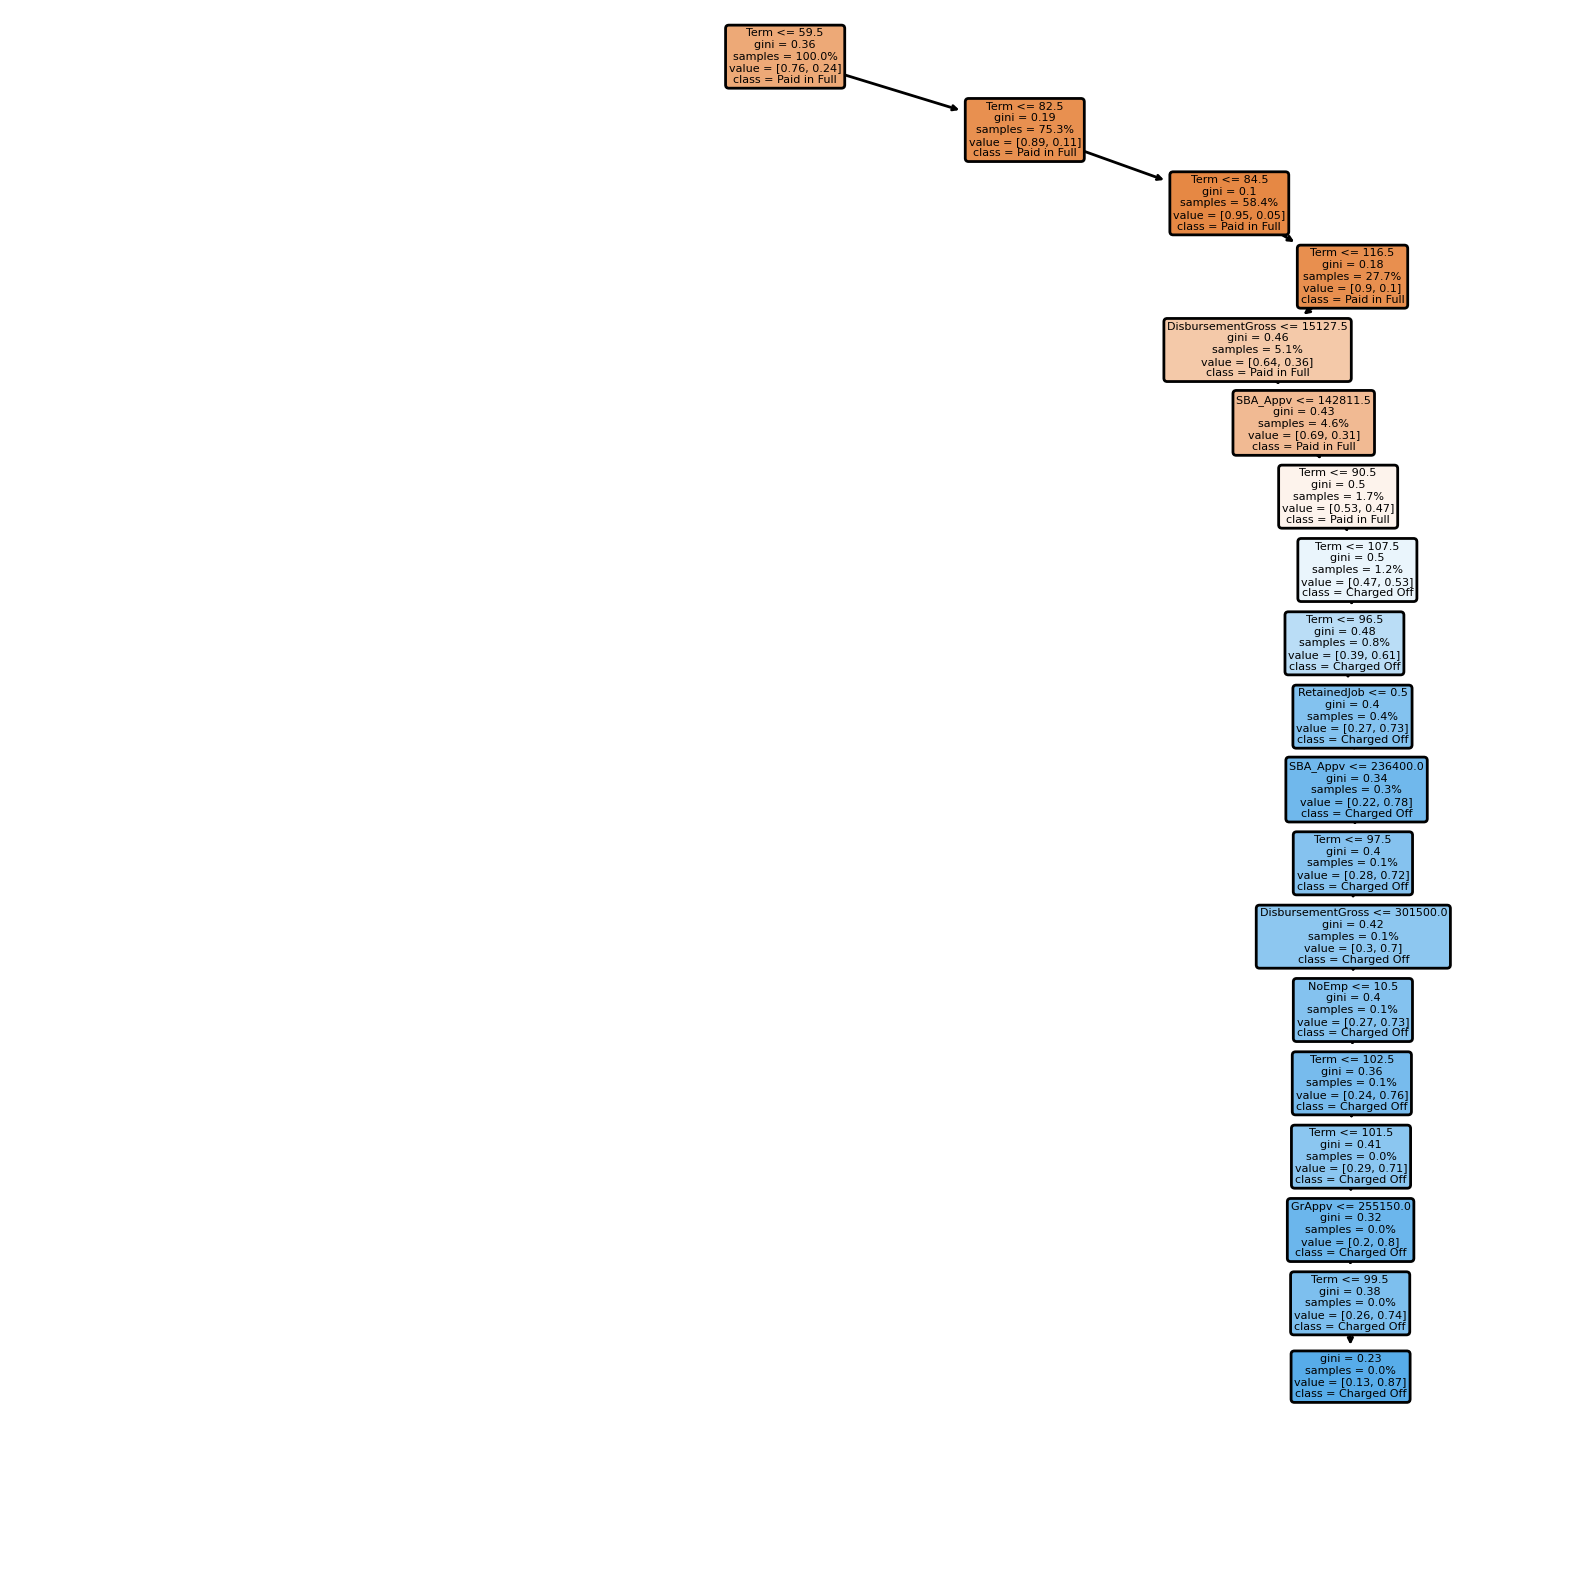

In [ ]:
# Made up Loan #9 - Large Term, Large Disbursement

loan9 = {
    'Term': [100],
    'NoEmp': [8],
    'CreateJob': [2],
    'RetainedJob': [6],
    'DisbursementGross': [200000],
    'BalanceGross': [5000],
    'GrAppv': [200000],
    'SBA_Appv': [180000],
    'Recession': [0],
    'NewExist': [0],
    'Franchise': [0],
    'UrbanRural': [0],
    'RevLineCr': [0],
    'LowDoc': [0],
    'Accommodation and food services': [0],
    'Administrative and support and waste management and remediation services': [0],
    'Agriculture, forestry, fishing, and hunting': [0],
    'Arts, entertainment, and recreation': [0],
    'Construction': [0],
    'Educational services': [0],
    'Finance and insurance': [0],
    'Health care and social assistance': [0],
    'Information': [0],
    'Management of companies and enterprises': [0],
    'Manufacturing': [0],
    'Mining, quarrying, and oil and gas extraction': [0],
    'Other services': [0],
    'Professional, scientific, and technical services': [0],
    'Public administration': [0],
    'Real estate and rental and leasing': [0],
    'Retail trade': [1], # Business is in this sector
    'Transportation and warehousing': [0],
    'Utilities': [0],
    'Wholesale trade':[0]
}
predict_loan(loan9)